# Data Science Capstone Project: Saudi Stock Exchange Market (Tadawul)
### Team Insight
#### <font color='#C70039'> Authors: Amal Almutairi, Nouf Aljohani, Rahaf Alzahrani, Rawan Alsudias & Salha Nasser

**Content**:
* [Installing fastai and ta for feature engineering](##FE)
* [Calling Libraries](##CL)
* [Read the data from the stored csv file](##RD)
* [Machine Learning Models](##ML)
    
  1. [Baseline Model](##BL)
  2. [Random Forest Classification](##RF)
  3. [XGBoost](##XG)
  4. [SVC](##SV)
  5. [Logistic Regression](##LR)
  6. [ROKET](##RO)

Data Sources:

https://www.investing.com/stock-screener/?sp=country::52|sector::13|industry::a|equityType::a|exchange::28%3Ceq_market_cap;1

https://finance.yahoo.com/

2. **ta** i.e. technical analysis library is used to for feature engineering, calculating various technical indicators.
>https://github.com/bukosabino/ta

## <a name="#FE">Installing fastai and ta for feature engineering</a>

In [ ]:
!git clone https://github.com/salohnana2018/Data-Science-Campus-Capstone-Project.git

In [ ]:
!pip install boruta

In [ ]:
#!pip install tsai

In [ ]:
!pip install ta
stable = True # Set to True for latest pip version or False for main branch in GitHub
!pip install {"tsai -U" if stable else "git+https://github.com/timeseriesAI/tsai.git"} 


##  <a name="#CL">**Calling Libraries**</a>

In [6]:
import pandas as pd
from ta.momentum import RSIIndicator,StochasticOscillator
import numpy as np

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
## to add new features 
from ta.momentum import RSIIndicator,StochasticOscillator


# ML Part

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from collections import Counter
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss


from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score


from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# Search CV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import RidgeClassifierCV
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import KFold


from boruta import BorutaPy
from scipy import stats
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
#time series classification
from tsai.all import *
computer_setup()

print('✔️ Libraries Loaded!')

os             : Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic
python         : 3.7.13
tsai           : 0.3.1
fastai         : 2.7.10
fastcore       : 1.5.22
torch          : 1.11.0+cu102
device         : cpu
cpu cores      : 2
RAM            : 12.68 GB
GPU memory     : N/A
✔️ Libraries Loaded!


##  <a name="#RD"> Read the data from the stored csv file </a>

In [7]:
df_cleaned = pd.read_csv('Data-Science-Campus-Capstone-Project/Data2/cleaned_data_frame.csv')

df_Aramco=df_cleaned[df_cleaned['Name']=='Saudi Aramco']
df_SARCO=df_cleaned[df_cleaned['Name']=='SARCO']
df_Rabigh=df_cleaned[df_cleaned['Name']=='Petro Rabigh']
df_Bahri=df_cleaned[df_cleaned['Name']=='Bahri']
df_Aldrees=df_cleaned[df_cleaned['Name']=='Aldrees']

# <a name="#ML"> Machine Learning Models</a>

### Split the data

In [ ]:
# function to split data.
def split_data(df, target):
    
    # split the dataset into Training and Testing sets
    # target is the name of the target column ==> 'Target'
    X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Tomorrow','Date','Symbol','Name','Change %','Open','Close','High','Low',target], axis=1),  # drop the target
    df[target], # choosing our target
    train_size = 0.8,
    test_size=0.2,
    #stratify=df[target],
    random_state=42)
    return X_train, X_test, y_train, y_test 

In [ ]:
# scale numeric data. 
def scale_data(X_train, X_test): 
    num_features = X_train.describe(include=[np.number]).columns
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train[num_features])
    X_test = scaler.transform(X_test[num_features])
    return X_train, X_test

### **Feature Selection Using  Boruta**

In [ ]:
X_train1, X_test1, y_train1, y_test1 = split_data(df_cleaned, 'Target')
X_train1_sc, X_test1_sc = scale_data(X_train1, X_test1)

#### Randomized Search to find the optimal hyper-paramters for the Random Forest which will be used with Boruta

In [ ]:
# Number of trees in random forest 
n_estimators = [200]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', None, 'log2']

# Maximum number of levels in tree
max_depth = [40]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [1, 10, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 14, 16 ,20]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200], 'max_features': ['auto', 'sqrt', None, 'log2'], 'max_depth': [40, None], 'min_samples_split': [1, 10, 20], 'min_samples_leaf': [1, 14, 16, 20], 'bootstrap': [True, False]}


In [ ]:
# New Random Forest Classifier to house optimal parameters
forest = RandomForestClassifier(class_weight='balanced')

# Specfiy the details of our Randomized Search
forest = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
forest.fit(X_train1_sc, y_train1)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [40, None],
                                        'max_features': ['auto', 'sqrt', None,
                                                         'log2'],
                                        'min_samples_leaf': [1, 14, 16, 20],
                                        'min_samples_split': [1, 10, 20],
                                        'n_estimators': [200]},
                   random_state=42, verbose=2)

In [ ]:
forest.best_params_

{'n_estimators': 200,
 'min_samples_split': 20,
 'min_samples_leaf': 20,
 'max_features': None,
 'max_depth': 40,
 'bootstrap': True}

#### Run Boruta to find the strongest featuures using the data of all the companies

In [ ]:

###initialize Boruta
# the hyper-bramters was selected using grid search 
forest = RandomForestClassifier(
   n_jobs = -1, 
   n_estimators = 200,
   min_samples_split= 20,
   min_samples_leaf=14,
   max_features='log2',
   max_depth = 40,
   bootstrap = False
)
boruta = BorutaPy(
   estimator = forest, 
   n_estimators = 200,
   max_iter = 1000 # number of trials to perform
)
### fit Boruta (it accepts np.array, not pd.DataFrame)
boruta.fit(np.array(X_train1_sc), np.array(y_train1))
### print results


BorutaPy(estimator=RandomForestClassifier(bootstrap=False, max_depth=40,
                                          max_features='log2',
                                          min_samples_leaf=14,
                                          min_samples_split=20,
                                          n_estimators=200, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x1D69E64B340),
         max_iter=1000, n_estimators=200,
         random_state=RandomState(MT19937) at 0x1D69E64B340)

In [ ]:
strong_features = X_train1.columns[boruta.support_].to_list()
cant_decide_features = X_train1.columns[boruta.support_weak_].to_list()
print('strongst_features:', strong_features)
print('features that boruta can not decide if its storng or weak :', cant_decide_features)

strongst_features: ['Volume', 'EMA_9', 'SMA_5', 'SMA_10', 'SMA_15', 'SMA_20', 'SMA_25', 'SMA_30', 'MACD', 'RSI', 'Stochastic', 'Open-Close', 'High-Low']
features that boruta can not decide if its storng or weak : []


##  <a name='#BL'>**Baseline Model**</a>

### 1. Aramco

In [ ]:
X_train_base, X_test_base, y_train_base, y_test_base = split_data(df_Aramco, 'Target')
X_train_sc,X_test_sc = scale_data(X_train_base, X_test_base)

In [ ]:
dummy_clf = DummyClassifier(strategy="prior",random_state=42)
dummy_clf.fit(X_train_sc, y_train_base)
preds = dummy_clf.predict(X_test_base)
score1 = dummy_clf.score(X_test_sc, y_test_base)*100
print("Baseline Score: {}".format(score1))
print(classification_report(y_test_base,preds))

Baseline Score: 59.70149253731343
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.60      1.00      0.75        80

    accuracy                           0.60       134
   macro avg       0.30      0.50      0.37       134
weighted avg       0.36      0.60      0.45       134



In [ ]:
plot_confusion_matrix(dummy_clf, X_test_base, y_test_base,cmap="YlGnBu"); 

In [ ]:
dummy_clf = DummyClassifier(strategy="uniform",random_state=42)
dummy_clf.fit(X_train_sc, y_train_base)
preds = dummy_clf.predict(X_test_base)
score = dummy_clf.score(X_test_sc, y_test_base)
print("Baseline Score: {}".format(score))
print(classification_report(y_test_base,preds))

Baseline Score: 0.44029850746268656
              precision    recall  f1-score   support

           0       0.32      0.33      0.32        54
           1       0.53      0.51      0.52        80

    accuracy                           0.44       134
   macro avg       0.42      0.42      0.42       134
weighted avg       0.45      0.44      0.44       134



In [ ]:
plot_confusion_matrix(dummy_clf, X_test_base, y_test_base,cmap="YlGnBu"); 

### 2. SARCO

In [ ]:
X_train_base, X_test_base, y_train_base, y_test_base = split_data(df_SARCO, 'Target')
X_train_sc,X_test_sc = scale_data(X_train_base, X_test_base)

In [ ]:
dummy_clf = DummyClassifier(strategy="prior",random_state=42)
dummy_clf.fit(X_train_sc, y_train_base)
preds = dummy_clf.predict(X_test_sc)
score2 = dummy_clf.score(X_test_sc, y_test_base)*100
print("Baseline Score: {}".format(score2))
print(classification_report(y_test_base,preds))

Baseline Score: 94.16498993963782
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       468
           1       0.00      0.00      0.00        29

    accuracy                           0.94       497
   macro avg       0.47      0.50      0.48       497
weighted avg       0.89      0.94      0.91       497



In [ ]:
plot_confusion_matrix(dummy_clf, X_test_base, y_test_base,cmap="YlGnBu"); 

In [ ]:
dummy_clf = DummyClassifier(strategy="uniform",random_state=42)
dummy_clf.fit(X_train_sc, y_train_base)
preds = dummy_clf.predict(X_test_base)
score = dummy_clf.score(X_test_sc, y_test_base)
print("Baseline Score: {}".format(score))
print(classification_report(y_test_base,preds))

Baseline Score: 0.4869215291750503
              precision    recall  f1-score   support

           0       0.94      0.49      0.64       468
           1       0.06      0.48      0.10        29

    accuracy                           0.49       497
   macro avg       0.50      0.48      0.37       497
weighted avg       0.89      0.49      0.61       497



In [ ]:
plot_confusion_matrix(dummy_clf, X_test_base, y_test_base,cmap="YlGnBu"); 

### 3. Rabigh

In [ ]:
X_train_base, X_test_base, y_train_base, y_test_base = split_data(df_Rabigh, 'Target')
X_train_sc,X_test_sc = scale_data(X_train_base, X_test_base)

In [ ]:
dummy_clf = DummyClassifier(strategy="prior",random_state=42)
dummy_clf.fit(X_train_sc, y_train_base)
preds = dummy_clf.predict(X_test_sc)
score3 = dummy_clf.score(X_test_sc, y_test_base)*100
print("Baseline Score: {}".format(score3))
print(classification_report(y_test_base,preds))

Baseline Score: 96.579476861167
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.97      1.00      0.98       480

    accuracy                           0.97       497
   macro avg       0.48      0.50      0.49       497
weighted avg       0.93      0.97      0.95       497



In [ ]:
plot_confusion_matrix(dummy_clf, X_test_base, y_test_base,cmap="YlGnBu"); 

In [ ]:
dummy_clf = DummyClassifier(strategy="uniform",random_state=42)
dummy_clf.fit(X_train_sc, y_train_base)
preds = dummy_clf.predict(X_test_base)
score = dummy_clf.score(X_test_sc, y_test_base)
print("Baseline Score: {}".format(score))
print(classification_report(y_test_base,preds))

Baseline Score: 0.5090543259557344
              precision    recall  f1-score   support

           0       0.03      0.47      0.06        17
           1       0.96      0.51      0.67       480

    accuracy                           0.51       497
   macro avg       0.50      0.49      0.36       497
weighted avg       0.93      0.51      0.65       497



In [ ]:
plot_confusion_matrix(dummy_clf, X_test_base, y_test_base,cmap="YlGnBu"); 

### 4. Bahri


In [ ]:
X_train_base, X_test_base, y_train_base, y_test_base = split_data(df_Bahri, 'Target')
X_train_sc,X_test_sc = scale_data(X_train_base, X_test_base)

In [ ]:
dummy_clf = DummyClassifier(strategy="prior",random_state=42)
dummy_clf.fit(X_train_sc, y_train_base)
preds = dummy_clf.predict(X_test_sc)
score4 = dummy_clf.score(X_test_sc, y_test_base)*100
print("Baseline Score: {}".format(score4))
print(classification_report(y_test_base,preds))

Baseline Score: 55.33199195171026
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       222
           1       0.55      1.00      0.71       275

    accuracy                           0.55       497
   macro avg       0.28      0.50      0.36       497
weighted avg       0.31      0.55      0.39       497



In [ ]:
plot_confusion_matrix(dummy_clf, X_test_base, y_test_base,cmap="YlGnBu"); 

In [ ]:
dummy_clf = DummyClassifier(strategy="uniform",random_state=42)
dummy_clf.fit(X_train_sc, y_train_base)
preds = dummy_clf.predict(X_test_base)
score = dummy_clf.score(X_test_sc, y_test_base)
print("Baseline Score: {}".format(score))
print(classification_report(y_test_base,preds))

Baseline Score: 0.5150905432595574
              precision    recall  f1-score   support

           0       0.46      0.50      0.48       222
           1       0.57      0.52      0.54       275

    accuracy                           0.52       497
   macro avg       0.51      0.51      0.51       497
weighted avg       0.52      0.52      0.52       497



In [ ]:
plot_confusion_matrix(dummy_clf, X_test_base, y_test_base,cmap="YlGnBu"); 

### 5. Aldrees

In [ ]:
X_train_base, X_test_base, y_train_base, y_test_base = split_data(df_Aldrees, 'Target')
X_train_sc,X_test_sc = scale_data(X_train_base, X_test_base)

In [ ]:
dummy_clf = DummyClassifier(strategy="prior",random_state=42)
dummy_clf.fit(X_train_sc, y_train_base)
preds = dummy_clf.predict(X_test_sc)
score5 = dummy_clf.score(X_test_sc, y_test_base)*100
print("Baseline Score: {}".format(score5))
print(classification_report(y_test_base,preds))

Baseline Score: 63.983903420523134
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       318
           1       0.00      0.00      0.00       179

    accuracy                           0.64       497
   macro avg       0.32      0.50      0.39       497
weighted avg       0.41      0.64      0.50       497



In [ ]:
plot_confusion_matrix(dummy_clf, X_test_base, y_test_base,cmap="YlGnBu"); 

In [ ]:
dummy_clf = DummyClassifier(strategy="uniform",random_state=42)
dummy_clf.fit(X_train_sc, y_train_base)
preds = dummy_clf.predict(X_test_base)
score = dummy_clf.score(X_test_sc, y_test_base)
print("Baseline Score: {}".format(score))
print(classification_report(y_test_base,preds))

Baseline Score: 0.5231388329979879
              precision    recall  f1-score   support

           0       0.67      0.51      0.58       318
           1       0.39      0.55      0.45       179

    accuracy                           0.52       497
   macro avg       0.53      0.53      0.52       497
weighted avg       0.57      0.52      0.53       497



In [ ]:
plot_confusion_matrix(dummy_clf, X_test_base, y_test_base,cmap="YlGnBu"); 

### Split the Data

In [ ]:
# split data
X_train1, X_test1, y_train1, y_test1 = split_data(df_Aramco, 'Target')
#scaling the data
X_train1, X_test1 = scale_data(X_train1, X_test1)

# split data
X_train2, X_test2, y_train2, y_test2 = split_data(df_SARCO, 'Target')
#scaling the data
X_train2, X_test2 = scale_data(X_train2, X_test2)

# split data
X_train3, X_test3, y_train3, y_test3 = split_data(df_Rabigh, 'Target')
#scaling the data
X_train3, X_test3 = scale_data(X_train3, X_test3)


X_train4, X_test4, y_train4, y_test4 = split_data(df_Bahri, 'Target')
#scaling the data
X_train4, X_test4 = scale_data(X_train4, X_test4)

X_train5, X_test5, y_train5, y_test5 = split_data(df_Aldrees, 'Target')
#scaling the data
X_train5, X_test5 = scale_data(X_train5, X_test5)

##   <a name='#RF'> **Random Forest Classification Model**</a>

### 1. Aramco

In [ ]:
Random_Forest_classifier = RandomForestClassifier(n_estimators=300, min_samples_split=100, criterion = 'gini', random_state=42,class_weight="balanced")
Random_Forest_classifier.fit(X_train1, y_train1)

RandomForestClassifier(class_weight='balanced', min_samples_split=100,
                       n_estimators=300, random_state=42)

In [ ]:
# training set
y_pred_RF_tr1 = Random_Forest_classifier.predict(X_train1)
accuracy_RF_tr1 = accuracy_score(y_train1, y_pred_RF_tr1)
print("Random Forest Classification Model Score (Training Set): %.2f%%" % (accuracy_RF_tr1 * 100.0)) 

# testing set
y_pred_RF_t1 = Random_Forest_classifier.predict(X_test1)
predictions_RF1 = [round(value) for value in y_pred_RF_t1]

# evaluate predictions
accuracy_RF_t1 = accuracy_score(y_test1, predictions_RF1)
print("Random Forest Classification Model Score (Testing Set): %.2f%%" % (accuracy_RF_t1 * 100.0)) 

Random Forest Classification Model Score (Training Set): 72.57%
Random Forest Classification Model Score (Testing Set): 64.93%


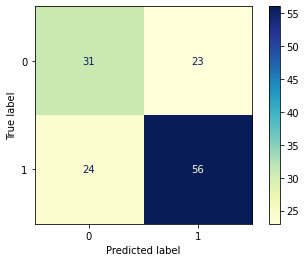

In [ ]:
plot_confusion_matrix(Random_Forest_classifier, X_test1, y_test1,cmap="YlGnBu"); 

In [ ]:
# Printing the classification report
print(classification_report(y_test1, y_pred_RF_t1))

              precision    recall  f1-score   support

           0       0.56      0.57      0.57        54
           1       0.71      0.70      0.70        80

    accuracy                           0.65       134
   macro avg       0.64      0.64      0.64       134
weighted avg       0.65      0.65      0.65       134



### 2. SARCO

In [ ]:
Random_Forest_classifier.fit(X_train2, y_train2)

RandomForestClassifier(class_weight='balanced', min_samples_split=100,
                       n_estimators=300, random_state=42)

In [ ]:
# training set
y_pred_RF_tr2 = Random_Forest_classifier.predict(X_train2)
accuracy_RF_tr2 = accuracy_score(y_train2, y_pred_RF_tr2)
print("Random Forest Classification Model Score (Training Set): %.2f%%" % (accuracy_RF_tr2 * 100.0)) 

# testing set
y_pred_RF_t2 = Random_Forest_classifier.predict(X_test2)
predictions_RF2 = [round(value) for value in y_pred_RF_t2]
# evaluate predictions
accuracy_RF_t2 = accuracy_score(y_test2, predictions_RF2)
print("Random Forest Classification Model Score (Testing Set): %.2f%%" % (accuracy_RF_t2 * 100.0)) 

Random Forest Classification Model Score (Training Set): 88.36%
Random Forest Classification Model Score (Testing Set): 86.12%


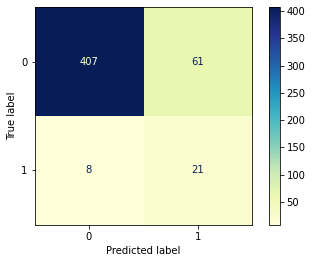

In [ ]:
plot_confusion_matrix(Random_Forest_classifier, X_test2, y_test2,cmap="YlGnBu"); 

In [ ]:
# Printing the classification report
print(classification_report(y_test2, y_pred_RF_t2))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       468
           1       0.26      0.72      0.38        29

    accuracy                           0.86       497
   macro avg       0.62      0.80      0.65       497
weighted avg       0.94      0.86      0.89       497



### 3. Rabigh

In [ ]:
Random_Forest_classifier.fit(X_train3, y_train3)

RandomForestClassifier(class_weight='balanced', min_samples_split=100,
                       n_estimators=300, random_state=42)

In [ ]:
# training set
y_pred_RF_tr3 = Random_Forest_classifier.predict(X_train3)
accuracy_RF_tr3 = accuracy_score(y_train3, y_pred_RF_tr3)
print("Random Forest Classification Model Score (Training Set): %.2f%%" % (accuracy_RF_tr3 * 100.0)) 

# testing set
y_pred_RF_t3 = Random_Forest_classifier.predict(X_test3)
predictions_RF3 = [round(value) for value in y_pred_RF_t3]
# evaluate predictions
accuracy_RF_t3 = accuracy_score(y_test3, predictions_RF3)
print("Random Forest Classification Model Score (Testing Set): %.2f%%" % (accuracy_RF_t3 * 100.0)) 

Random Forest Classification Model Score (Training Set): 97.43%
Random Forest Classification Model Score (Testing Set): 93.76%


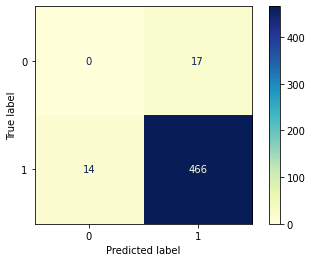

In [ ]:
plot_confusion_matrix(Random_Forest_classifier, X_test3, y_test3,cmap="YlGnBu");

In [ ]:
# Printing the classification report
print(classification_report(y_test3, y_pred_RF_t3))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.96      0.97      0.97       480

    accuracy                           0.94       497
   macro avg       0.48      0.49      0.48       497
weighted avg       0.93      0.94      0.93       497



### 4. Bahri

In [ ]:
Random_Forest_classifier.fit(X_train4, y_train4)

RandomForestClassifier(class_weight='balanced', min_samples_split=100,
                       n_estimators=300, random_state=42)

In [ ]:
# training set
y_pred_RF_tr4 = Random_Forest_classifier.predict(X_train4)
accuracy_RF_tr4 = accuracy_score(y_train4, y_pred_RF_tr4)
print("Random Forest Classification Model Score (Training Set): %.2f%%" % (accuracy_RF_tr4 * 100.0)) 

# testing set
y_pred_RF_t4 = Random_Forest_classifier.predict(X_test4)
predictions_RF4 = [round(value) for value in y_pred_RF_t4]
# evaluate predictions
accuracy_RF_t4 = accuracy_score(y_test4, predictions_RF4)
print("Random Forest Classification Model Score (Testing Set): %.2f%%" % (accuracy_RF_t4 * 100.0)) 

Random Forest Classification Model Score (Training Set): 74.40%
Random Forest Classification Model Score (Testing Set): 67.61%


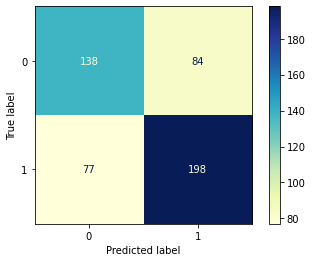

In [ ]:
plot_confusion_matrix(Random_Forest_classifier, X_test4, y_test4,cmap="YlGnBu");

In [ ]:
# Printing the classification report
print(classification_report(y_test4, y_pred_RF_t4))

              precision    recall  f1-score   support

           0       0.64      0.62      0.63       222
           1       0.70      0.72      0.71       275

    accuracy                           0.68       497
   macro avg       0.67      0.67      0.67       497
weighted avg       0.68      0.68      0.68       497



### 5. Aldrees

In [ ]:
Random_Forest_classifier.fit(X_train5, y_train5)

RandomForestClassifier(class_weight='balanced', min_samples_split=100,
                       n_estimators=300, random_state=42)

In [ ]:
# training set
y_pred_RF_tr5 = Random_Forest_classifier.predict(X_train5)
accuracy_RF_tr5 = accuracy_score(y_train5, y_pred_RF_tr5)
print("Random Forest Classification Model Score (Training Set): %.2f%%" % (accuracy_RF_tr5 * 100.0)) 

# testing set
y_pred_RF_t5 = Random_Forest_classifier.predict(X_test5)
predictions_RF5 = [round(value) for value in y_pred_RF_t5]
# evaluate predictions
accuracy_RF_t5 = accuracy_score(y_test5, predictions_RF5)
print("Random Forest Classification Model Score (Testing Set): %.2f%%" % (accuracy_RF_t5 * 100.0)) 

Random Forest Classification Model Score (Training Set): 76.27%
Random Forest Classification Model Score (Testing Set): 73.84%


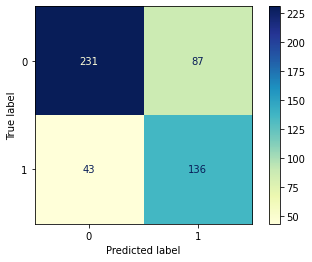

In [ ]:
plot_confusion_matrix(Random_Forest_classifier, X_test5, y_test5,cmap="YlGnBu");

In [ ]:
# Printing the classification report
print(classification_report(y_test5, y_pred_RF_t5))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78       318
           1       0.61      0.76      0.68       179

    accuracy                           0.74       497
   macro avg       0.73      0.74      0.73       497
weighted avg       0.76      0.74      0.74       497



### Random Forest Classification Overview

{'Aramco': 64.92537313432835, 'SARCO': 86.11670020120724, 'Rabigh': 93.7625754527163, 'Bahri': 67.6056338028169, 'Aldrees': 73.8430583501006}


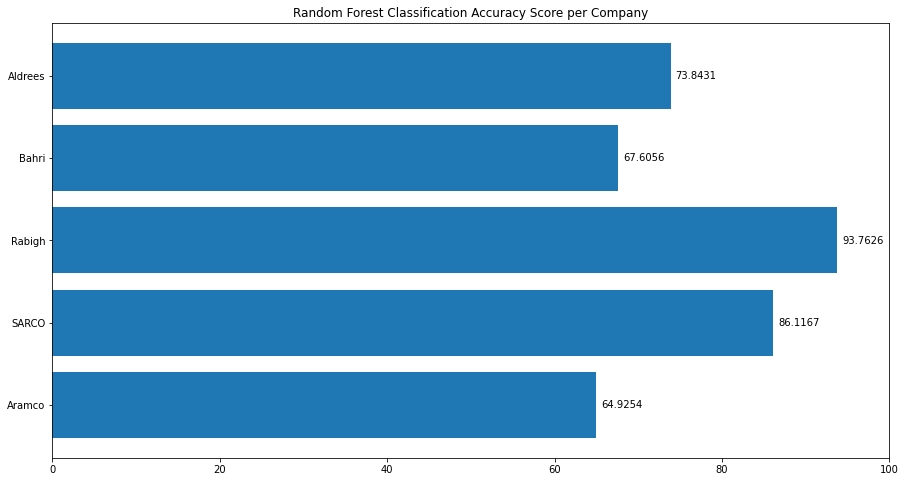

In [ ]:
# Accuracy Score for each company.
RF_accuracy = {'Aramco': accuracy_RF_t1*100, 'SARCO': accuracy_RF_t2*100, 'Rabigh': accuracy_RF_t3*100, 'Bahri':accuracy_RF_t4*100, 'Aldrees': accuracy_RF_t5*100}
print(RF_accuracy)
RF_names = list(RF_accuracy.keys())
RF_values = list(RF_accuracy.values())
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Random Forest Classification Accuracy Score per Company')
RF_bars = ax.barh(RF_names, RF_values)
ax.bar_label(RF_bars, padding=5)
plt.xlim([0,100])
plt.show()

--------------------------------------------------------------------------------

#### Random Forest Model using RandomSearch CV Classification

In [ ]:
# Number of trees in random forest 
n_estimators = [200]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', None, 'log2']

# Maximum number of levels in tree
max_depth = [40]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [1, 10, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 14, 16 ,20]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200], 'max_features': ['auto', 'sqrt', None, 'log2'], 'max_depth': [40, None], 'min_samples_split': [1, 10, 20], 'min_samples_leaf': [1, 14, 16, 20], 'bootstrap': [True, False]}


In [ ]:
# split the dataset into Training and Testing sets
X_trainRF1, X_testRF1, y_trainRF1, y_testRF1 = split_data(df_Aramco.drop('SMA_20', axis=1), 'Target')
X_trainRF2, X_testRF2, y_trainRF2, y_testRF2 = split_data(df_SARCO.drop('SMA_20', axis=1), 'Target')
X_trainRF3, X_testRF3, y_trainRF3, y_testRF3 = split_data(df_Rabigh.drop('SMA_20', axis=1), 'Target')
X_trainRF4, X_testRF4, y_trainRF4, y_testRF4 = split_data(df_Bahri.drop('SMA_20', axis=1), 'Target')
X_trainRF5, X_testRF5, y_trainRF5, y_testRF5 = split_data(df_Aldrees.drop('SMA_20', axis=1), 'Target')

### 1. Aramco

In [ ]:

# New Random Forest Classifier to house optimal parameters
Random_Forest_classifier2 = RandomForestClassifier(class_weight="balanced")

# Specfiy the details of our Randomized Search
Random_Forest_classifier2_random = RandomizedSearchCV(estimator = Random_Forest_classifier2, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
Random_Forest_classifier2_random.fit(X_trainRF1, y_trainRF1)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [40, None],
                                        'max_features': ['auto', 'sqrt', None,
                                                         'log2'],
                                        'min_samples_leaf': [1, 14, 16, 20],
                                        'min_samples_split': [1, 10, 20],
                                        'n_estimators': [200]},
                   random_state=42, verbose=2)

In [ ]:
print('\n Best estimator:')
print(Random_Forest_classifier2_random.best_estimator_)
print('\n Best score ')
print(Random_Forest_classifier2_random.best_score_ )
print('\n Best hyperparameters:')
print(Random_Forest_classifier2_random.best_params_)


 Best estimator:
RandomForestClassifier(class_weight='balanced', max_features=None,
                       min_samples_leaf=20, min_samples_split=10,
                       n_estimators=200)

 Best score 
0.6342068483577917

 Best hyperparameters:
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 20, 'max_features': None, 'max_depth': None, 'bootstrap': True}


In [ ]:
# training set
y_pred_RF_tr11 = Random_Forest_classifier2_random.predict(X_trainRF1)
accuracy_RF_tr11 = accuracy_score(y_trainRF1, y_pred_RF_tr11)
print("Random Forest Classification Model Score (Training Set): %.2f%%" % (accuracy_RF_tr11 * 100.0)) 

# testing set
y_pred_RF_t11 = Random_Forest_classifier2_random.predict(X_testRF1)
predictions_RF11 = [round(value) for value in y_pred_RF_t11]

# evaluate predictions
accuracy_RF_t11 = accuracy_score(y_testRF1, predictions_RF11)
print("Random Forest Classification Model Score (Testing Set): %.2f%%" % (accuracy_RF_t11 * 100.0)) 

Random Forest Classification Model Score (Training Set): 73.88%
Random Forest Classification Model Score (Testing Set): 67.91%


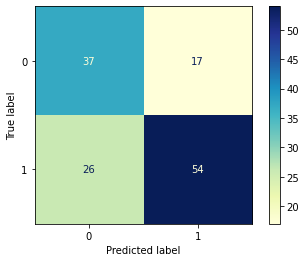

In [ ]:
plot_confusion_matrix(Random_Forest_classifier2_random, X_testRF1, y_testRF1,cmap="YlGnBu");

In [ ]:
# Printing the classification report
print(classification_report(y_testRF1, y_pred_RF_t11))

              precision    recall  f1-score   support

           0       0.59      0.69      0.63        54
           1       0.76      0.68      0.72        80

    accuracy                           0.68       134
   macro avg       0.67      0.68      0.67       134
weighted avg       0.69      0.68      0.68       134



### 2. SARCO

In [ ]:
Random_Forest_classifier2_random.fit(X_trainRF2, y_trainRF2)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [40, None],
                                        'max_features': ['auto', 'sqrt', None,
                                                         'log2'],
                                        'min_samples_leaf': [1, 14, 16, 20],
                                        'min_samples_split': [1, 10, 20],
                                        'n_estimators': [200]},
                   random_state=42, verbose=2)

In [ ]:
# training set
y_pred_RF_tr22 = Random_Forest_classifier2_random.predict(X_trainRF2)
accuracy_RF_tr22 = accuracy_score(y_trainRF2, y_pred_RF_tr22)
print("Random Forest Classification Model Score (Training Set): %.2f%%" % (accuracy_RF_tr22 * 100.0)) 

# testing set
y_pred_RF_t22 = Random_Forest_classifier2_random.predict(X_testRF2)
predictions_RF22 = [round(value) for value in y_pred_RF_t22]

# evaluate predictions
accuracy_RF_t22 = accuracy_score(y_testRF2, predictions_RF22)
print("Random Forest Classification Model Score (Testing Set): %.2f%%" % (accuracy_RF_t22 * 100.0)) 

Random Forest Classification Model Score (Training Set): 99.90%
Random Forest Classification Model Score (Testing Set): 93.76%


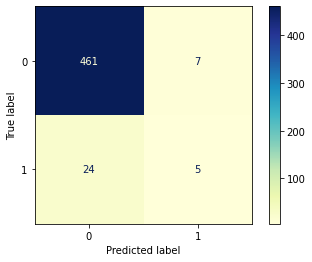

In [ ]:
plot_confusion_matrix(Random_Forest_classifier2_random, X_testRF2, y_testRF2,cmap="YlGnBu");

In [ ]:
# Printing the classification report
print(classification_report(y_testRF2, y_pred_RF_t22))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       468
           1       0.42      0.17      0.24        29

    accuracy                           0.94       497
   macro avg       0.68      0.58      0.61       497
weighted avg       0.92      0.94      0.93       497



### 3. Rabigh

In [ ]:
Random_Forest_classifier2_random.fit(X_trainRF3, y_trainRF3)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [40, None],
                                        'max_features': ['auto', 'sqrt', None,
                                                         'log2'],
                                        'min_samples_leaf': [1, 14, 16, 20],
                                        'min_samples_split': [1, 10, 20],
                                        'n_estimators': [200]},
                   random_state=42, verbose=2)

In [ ]:
# training set
y_pred_RF_tr33 = Random_Forest_classifier2_random.predict(X_trainRF3)
accuracy_RF_tr33 = accuracy_score(y_trainRF3, y_pred_RF_tr33)
print("Random Forest Classification Model Score (Training Set): %.2f%%" % (accuracy_RF_tr33 * 100.0)) 

# testing set
y_pred_RF_t33 = Random_Forest_classifier2_random.predict(X_testRF3)
predictions_RF33 = [round(value) for value in y_pred_RF_t33]

# evaluate predictions
accuracy_RF_t33 = accuracy_score(y_testRF3, predictions_RF33)
print("Random Forest Classification Model Score (Testing Set): %.2f%%" % (accuracy_RF_t33 * 100.0)) 

Random Forest Classification Model Score (Training Set): 100.00%
Random Forest Classification Model Score (Testing Set): 96.58%


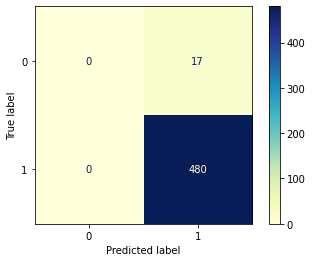

In [ ]:
plot_confusion_matrix(Random_Forest_classifier2_random, X_testRF3, y_testRF3,cmap="YlGnBu");

In [ ]:
# Printing the classification report
print(classification_report(y_testRF3, y_pred_RF_t33))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.97      1.00      0.98       480

    accuracy                           0.97       497
   macro avg       0.48      0.50      0.49       497
weighted avg       0.93      0.97      0.95       497



### 4. Bahri 

In [ ]:
Random_Forest_classifier2_random.fit(X_trainRF4, y_trainRF4)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [40, None],
                                        'max_features': ['auto', 'sqrt', None,
                                                         'log2'],
                                        'min_samples_leaf': [1, 14, 16, 20],
                                        'min_samples_split': [1, 10, 20],
                                        'n_estimators': [200]},
                   random_state=42, verbose=2)

In [ ]:
# training set
y_pred_RF_tr44 = Random_Forest_classifier2_random.predict(X_trainRF4)
accuracy_RF_tr44 = accuracy_score(y_trainRF4, y_pred_RF_tr44)
print("Random Forest Classification Model Score (Training Set): %.2f%%" % (accuracy_RF_tr44 * 100.0)) 

# testing set
y_pred_RF_t44 = Random_Forest_classifier2_random.predict(X_testRF4)
predictions_RF44 = [round(value) for value in y_pred_RF_t44]

# evaluate predictions
accuracy_RF_t44 = accuracy_score(y_testRF4, predictions_RF44)
print("Random Forest Classification Model Score (Testing Set): %.2f%%" % (accuracy_RF_t44 * 100.0)) 

Random Forest Classification Model Score (Training Set): 89.92%
Random Forest Classification Model Score (Testing Set): 68.61%


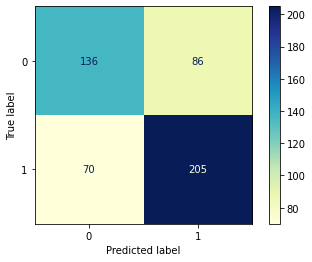

In [ ]:
plot_confusion_matrix(Random_Forest_classifier2_random, X_testRF4, y_testRF4,cmap="YlGnBu");

In [ ]:
# Printing the classification report
print(classification_report(y_testRF4, y_pred_RF_t44))

              precision    recall  f1-score   support

           0       0.66      0.61      0.64       222
           1       0.70      0.75      0.72       275

    accuracy                           0.69       497
   macro avg       0.68      0.68      0.68       497
weighted avg       0.68      0.69      0.68       497



### 5. Aldrees

In [ ]:
Random_Forest_classifier2_random.fit(X_trainRF5, y_trainRF5)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [40, None],
                                        'max_features': ['auto', 'sqrt', None,
                                                         'log2'],
                                        'min_samples_leaf': [1, 14, 16, 20],
                                        'min_samples_split': [1, 10, 20],
                                        'n_estimators': [200]},
                   random_state=42, verbose=2)

In [ ]:
# training set
y_pred_RF_tr55 = Random_Forest_classifier2_random.predict(X_trainRF5)
accuracy_RF_tr55 = accuracy_score(y_trainRF5, y_pred_RF_tr55)
print("Random Forest Classification Model Score (Training Set): %.2f%%" % (accuracy_RF_tr55 * 100.0)) 

# testing set
y_pred_RF_t55 = Random_Forest_classifier2_random.predict(X_testRF5)
predictions_RF55 = [round(value) for value in y_pred_RF_t55]

# evaluate predictions
accuracy_RF_t55 = accuracy_score(y_testRF5, predictions_RF55)
print("Random Forest Classification Model Score (Testing Set): %.2f%%" % (accuracy_RF_t55 * 100.0)) 

Random Forest Classification Model Score (Training Set): 97.18%
Random Forest Classification Model Score (Testing Set): 75.05%


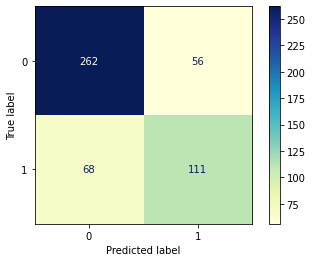

In [ ]:
plot_confusion_matrix(Random_Forest_classifier2_random, X_testRF5, y_testRF5,cmap="YlGnBu");

In [ ]:
# Printing the classification report
print(classification_report(y_testRF5, y_pred_RF_t55))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       318
           1       0.66      0.62      0.64       179

    accuracy                           0.75       497
   macro avg       0.73      0.72      0.73       497
weighted avg       0.75      0.75      0.75       497



### Random Forest Model using RandomSearch CV Classification Overview

{'Aramco': 67.91044776119402, 'SARCO': 93.7625754527163, 'Rabigh': 96.579476861167, 'Bahri': 68.61167002012073, 'Aldrees': 75.0503018108652}


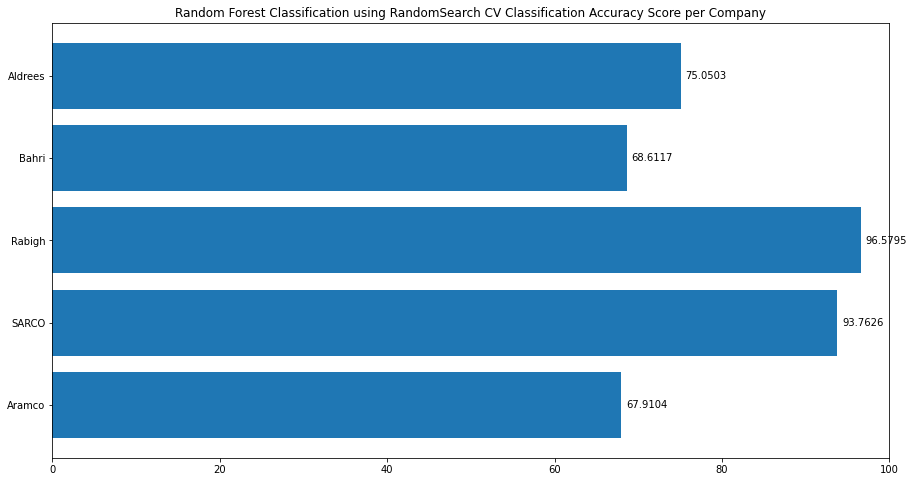

In [ ]:
# Accuracy Score for each company.
RF_accuracy2 = {'Aramco': accuracy_RF_t11*100, 'SARCO': accuracy_RF_t22*100, 'Rabigh': accuracy_RF_t33*100, 'Bahri':accuracy_RF_t44*100, 'Aldrees': accuracy_RF_t55*100}
RF_names2 = list(RF_accuracy2.keys())
RF_values2 = list(RF_accuracy2.values())
print(RF_accuracy2)

fig, ax = plt.subplots(figsize=(15,8))
plt.title('Random Forest Classification using RandomSearch CV Classification Accuracy Score per Company')
RF_bars2 = ax.barh(RF_names2, RF_values2)
ax.bar_label(RF_bars2, padding=5)
plt.xlim([0,100])

plt.show()

--------------------------------------------------------------------------------

#### Random Forest Model using GridSearch CV Classification

In [ ]:


param_grid = {
    'bootstrap': [True],
    'max_depth': [80],
    'max_features': [3],
    'min_samples_leaf': [5],
    'min_samples_split': [8],
    'n_estimators': [200]   
}

RF_grid = GridSearchCV(
    Random_Forest_classifier,
    param_grid,
    cv = 10,
    n_jobs=-1,
    verbose=2
)

### 1. Aramco

In [ ]:
# Fit the random search model
RF_grid.fit(X_trainRF1, y_trainRF1)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              min_samples_split=100,
                                              n_estimators=300,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80],
                         'max_features': [3], 'min_samples_leaf': [5],
                         'min_samples_split': [8], 'n_estimators': [200]},
             verbose=2)

In [ ]:
# training set
y_pred_RF_tr111 = RF_grid.predict(X_trainRF1)
accuracy_RF_tr111 = accuracy_score(y_trainRF1, y_pred_RF_tr111)
print("Random Forest Classification Model Score (Training Set): %.2f%%" % (accuracy_RF_tr111 * 100.0)) 

# testing set
y_pred_RF_t111 = RF_grid.predict(X_testRF1)
predictions_RF111 = [round(value) for value in y_pred_RF_t111]

# evaluate predictions
accuracy_RF_t111 = accuracy_score(y_testRF1, predictions_RF111)
print("Random Forest Classification Model Score (Testing Set): %.2f%%" % (accuracy_RF_t111 * 100.0)) 

Random Forest Classification Model Score (Training Set): 91.60%
Random Forest Classification Model Score (Testing Set): 68.66%


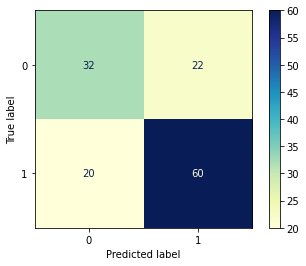

In [ ]:
plot_confusion_matrix(RF_grid, X_testRF1, y_testRF1,cmap="YlGnBu");

In [ ]:
# Printing the classification report
print(classification_report(y_testRF1, y_pred_RF_t111))

              precision    recall  f1-score   support

           0       0.62      0.59      0.60        54
           1       0.73      0.75      0.74        80

    accuracy                           0.69       134
   macro avg       0.67      0.67      0.67       134
weighted avg       0.68      0.69      0.69       134



### 2. SARCO

In [ ]:
RF_grid.fit(X_trainRF2, y_trainRF2)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              min_samples_split=100,
                                              n_estimators=300,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80],
                         'max_features': [3], 'min_samples_leaf': [5],
                         'min_samples_split': [8], 'n_estimators': [200]},
             verbose=2)

In [ ]:
# training set
y_pred_RF_tr222 = RF_grid.predict(X_trainRF2)
accuracy_RF_tr222 = accuracy_score(y_trainRF2, y_pred_RF_tr222)
print("Random Forest Classification Model Score (Training Set): %.2f%%" % (accuracy_RF_tr222 * 100.0)) 

# testing set
y_pred_RF_t222 = RF_grid.predict(X_testRF2)
predictions_RF222 = [round(value) for value in y_pred_RF_t222]

# evaluate predictions
accuracy_RF_t222 = accuracy_score(y_testRF2, predictions_RF222)
print("Random Forest Classification Model Score (Testing Set): %.2f%%" % (accuracy_RF_t222 * 100.0)) 

Random Forest Classification Model Score (Training Set): 98.34%
Random Forest Classification Model Score (Testing Set): 93.36%


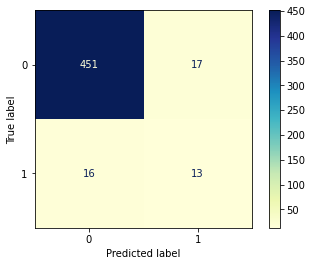

In [ ]:
plot_confusion_matrix(RF_grid, X_testRF2, y_testRF2,cmap="YlGnBu");

In [ ]:
# Printing the classification report
print(classification_report(y_testRF2, y_pred_RF_t222))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       468
           1       0.43      0.45      0.44        29

    accuracy                           0.93       497
   macro avg       0.70      0.71      0.70       497
weighted avg       0.93      0.93      0.93       497



### 3. Rabigh

In [ ]:
RF_grid.fit(X_trainRF3, y_trainRF3)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              min_samples_split=100,
                                              n_estimators=300,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80],
                         'max_features': [3], 'min_samples_leaf': [5],
                         'min_samples_split': [8], 'n_estimators': [200]},
             verbose=2)

In [ ]:
# training set
y_pred_RF_tr333 = RF_grid.predict(X_trainRF3)
accuracy_RF_tr333 = accuracy_score(y_trainRF3, y_pred_RF_tr333)
print("Random Forest Classification Model Score (Training Set): %.2f%%" % (accuracy_RF_tr333 * 100.0)) 

# testing set
y_pred_RF_t333 = RF_grid.predict(X_testRF3)
predictions_RF333 = [round(value) for value in y_pred_RF_t333]

# evaluate predictions
accuracy_RF_t333 = accuracy_score(y_testRF3, predictions_RF333)
print("Random Forest Classification Model Score (Testing Set): %.2f%%" % (accuracy_RF_t333 * 100.0)) 

Random Forest Classification Model Score (Training Set): 99.90%
Random Forest Classification Model Score (Testing Set): 96.58%


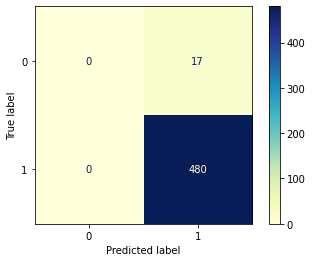

In [ ]:
plot_confusion_matrix(RF_grid, X_testRF3, y_testRF3,cmap="YlGnBu");

In [ ]:
# Printing the classification report
print(classification_report(y_testRF3, y_pred_RF_t333))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.97      1.00      0.98       480

    accuracy                           0.97       497
   macro avg       0.48      0.50      0.49       497
weighted avg       0.93      0.97      0.95       497



### 4. Bahri 

In [ ]:
RF_grid.fit(X_trainRF4, y_trainRF4)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              min_samples_split=100,
                                              n_estimators=300,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80],
                         'max_features': [3], 'min_samples_leaf': [5],
                         'min_samples_split': [8], 'n_estimators': [200]},
             verbose=2)

In [ ]:
# training set
y_pred_RF_tr444 = RF_grid.predict(X_trainRF4)
accuracy_RF_tr444 = accuracy_score(y_trainRF4, y_pred_RF_tr444)
print("Random Forest Classification Model Score (Training Set): %.2f%%" % (accuracy_RF_tr44 * 100.0)) 

# testing set
y_pred_RF_t444 = RF_grid.predict(X_testRF4)
predictions_RF444 = [round(value) for value in y_pred_RF_t444]

# evaluate predictions
accuracy_RF_t444 = accuracy_score(y_testRF4, predictions_RF444)
print("Random Forest Classification Model Score (Testing Set): %.2f%%" % (accuracy_RF_t444 * 100.0)) 

Random Forest Classification Model Score (Training Set): 89.92%
Random Forest Classification Model Score (Testing Set): 67.00%


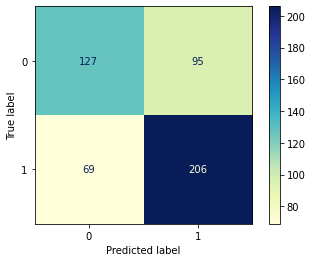

In [ ]:
plot_confusion_matrix(RF_grid, X_testRF4, y_testRF4,cmap="YlGnBu");

In [ ]:
# Printing the classification report
print(classification_report(y_testRF4, y_pred_RF_t444))

              precision    recall  f1-score   support

           0       0.65      0.57      0.61       222
           1       0.68      0.75      0.72       275

    accuracy                           0.67       497
   macro avg       0.67      0.66      0.66       497
weighted avg       0.67      0.67      0.67       497



### 5. Aldrees

In [ ]:
RF_grid.fit(X_trainRF5, y_trainRF5)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              min_samples_split=100,
                                              n_estimators=300,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80],
                         'max_features': [3], 'min_samples_leaf': [5],
                         'min_samples_split': [8], 'n_estimators': [200]},
             verbose=2)

In [ ]:
# training set
y_pred_RF_tr555 = RF_grid.predict(X_trainRF5)
accuracy_RF_tr555 = accuracy_score(y_trainRF5, y_pred_RF_tr555)
print("Random Forest Classification Model Score (Training Set): %.2f%%" % (accuracy_RF_tr555 * 100.0)) 

# testing set
y_pred_RF_t555 = RF_grid.predict(X_testRF5)
predictions_RF555 = [round(value) for value in y_pred_RF_t555]

# evaluate predictions
accuracy_RF_t555 = accuracy_score(y_testRF5, predictions_RF555)
print("Random Forest Classification Model Score (Testing Set): %.2f%%" % (accuracy_RF_t555 * 100.0)) 

Random Forest Classification Model Score (Training Set): 92.49%
Random Forest Classification Model Score (Testing Set): 74.45%


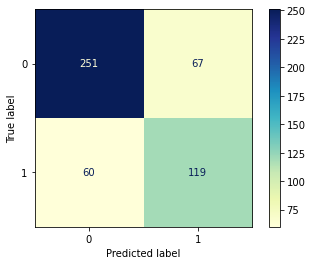

In [ ]:
plot_confusion_matrix(RF_grid, X_testRF5, y_testRF5,cmap="YlGnBu");

In [ ]:
# Printing the classification report
print(classification_report(y_testRF5, y_pred_RF_t555))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       318
           1       0.64      0.66      0.65       179

    accuracy                           0.74       497
   macro avg       0.72      0.73      0.73       497
weighted avg       0.75      0.74      0.75       497



### Random Forest Model using GridSearch CV Classification Overview

{'Aramco': 68.65671641791045, 'SARCO': 93.36016096579478, 'Rabigh': 96.579476861167, 'Bahri': 67.0020120724346, 'Aldrees': 74.44668008048289}


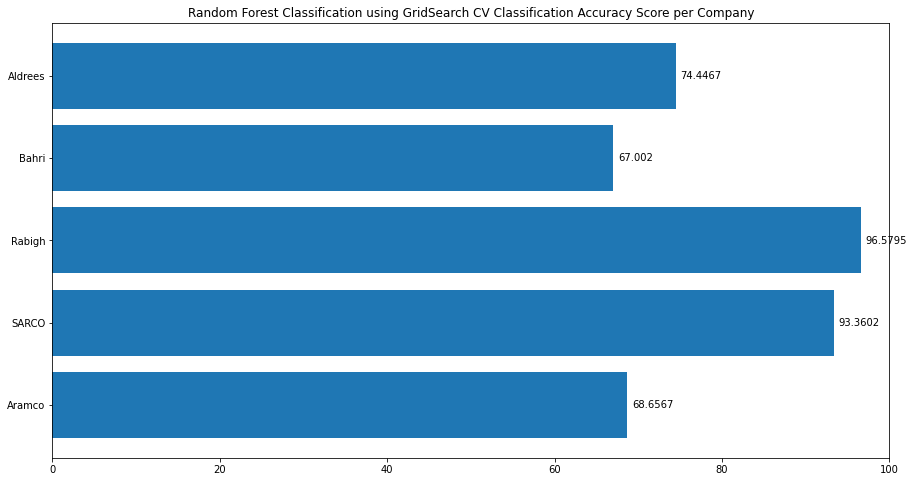

In [ ]:
# Accuracy Score for each company.
RF_accuracy3 = {'Aramco': accuracy_RF_t111*100, 'SARCO': accuracy_RF_t222*100, 'Rabigh': accuracy_RF_t333*100,\
                'Bahri':accuracy_RF_t444*100, 'Aldrees': accuracy_RF_t555*100}
RF_names3 = list(RF_accuracy3.keys())
RF_values3 = list(RF_accuracy3.values())
print(RF_accuracy3)
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Random Forest Classification using GridSearch CV Classification Accuracy Score per Company')
RF_bars3 = ax.barh(RF_names3, RF_values3)
ax.bar_label(RF_bars3, padding=5)
plt.xlim([0,100])

plt.show()

--------------------------------------------------------------------------------

### Random_Forest Models Accuracy

In [ ]:
df_RF = pd.DataFrame({
    'Company': RF_names,
    'Random_Forest': RF_values,
    'Random_Forest_GridSearch': RF_values2,
    'Random_Forest_RanomizedSearch': RF_values3
})
df_RF

,Company,Random_Forest,Random_Forest_GridSearch,Random_Forest_RanomizedSearch
0,Aramco,64.925373,67.910448,68.656716
1,SARCO,86.116700,93.762575,93.360161
2,Rabigh,93.762575,96.579477,96.579477
3,Bahri,67.605634,68.611670,67.002012
4,Aldrees,73.843058,75.050302,74.446680


In [ ]:
df_RF.to_csv('RF_Accuracy.csv')

### Calculate log loss (error) for all the Random_Forest Models

In [ ]:
# Calculate log loss (error) for all the Random_Forest Models


RF_log_loss = {
'Aramco': log_loss(y_true=y_test1, y_pred=y_pred_RF_t1, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'SARCO': log_loss(y_true=y_test2, y_pred=y_pred_RF_t2, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'Rabigh': log_loss(y_true=y_test3, y_pred=y_pred_RF_t3, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'Bahri': log_loss(y_true=y_test4, y_pred=y_pred_RF_t4, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'Aldrees': log_loss(y_true=y_test5, y_pred=y_pred_RF_t5, eps=1e-15, normalize=True, sample_weight=None, labels=None)    
}

RF_log_loss_values = list(RF_log_loss.values())

RF_gridsearch_log_loss = {
'Aramco': log_loss(y_true=y_test1, y_pred=y_pred_RF_t111, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'SARCO': log_loss(y_true=y_test2, y_pred=y_pred_RF_t222, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'Rabigh': log_loss(y_true=y_test3, y_pred=y_pred_RF_t333, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'Bahri': log_loss(y_true=y_test4, y_pred=y_pred_RF_t444, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'Aldrees': log_loss(y_true=y_test5, y_pred=y_pred_RF_t555, eps=1e-15, normalize=True, sample_weight=None, labels=None)    
}

RF_gridsearch_log_loss_values = list(RF_gridsearch_log_loss.values())

RF_randomsearch_log_loss = {
'Aramco': log_loss(y_true=y_test1, y_pred=y_pred_RF_t11, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'SARCO': log_loss(y_true=y_test2, y_pred=y_pred_RF_t22, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'Rabigh': log_loss(y_true=y_test3, y_pred=y_pred_RF_t33, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'Bahri': log_loss(y_true=y_test4, y_pred=y_pred_RF_t44, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'Aldrees': log_loss(y_true=y_test5, y_pred=y_pred_RF_t55, eps=1e-15, normalize=True, sample_weight=None, labels=None)    
}

RF_randomsearch_log_loss_values = list(RF_randomsearch_log_loss.values())

In [ ]:
df_RF_log_loss = pd.DataFrame({
    'Company': RF_names,
    'Random_Forest': RF_log_loss_values,
    'Random_Forest_GridSearch': RF_gridsearch_log_loss_values,
    'Random_Forest_RanomizedSearch': RF_randomsearch_log_loss_values
})
df_RF_log_loss

,Company,Random_Forest,Random_Forest_GridSearch,Random_Forest_RanomizedSearch
0,Aramco,12.114484,10.825718,11.083440
1,SARCO,4.795220,2.293347,2.154341
2,Rabigh,2.154357,1.181434,1.181434
3,Bahri,11.188753,11.397254,10.841283
4,Aldrees,9.034428,8.825912,8.617411


In [ ]:
df_RF_log_loss.to_csv('RF_errors.csv')

### Calculate f1 score for all the Random_Forest Models

In [ ]:


RF_f1 = {
'Aramco': f1_score(y_true=y_test1, y_pred=y_pred_RF_t1, average='macro'),
'SARCO': f1_score(y_true=y_test2, y_pred=y_pred_RF_t2, average='macro'),
'Rabigh': f1_score(y_true=y_test3, y_pred=y_pred_RF_t3, average='macro'),
'Bahri': f1_score(y_true=y_test4, y_pred=y_pred_RF_t4, average='macro'),
'Aldrees': f1_score(y_true=y_test5, y_pred=y_pred_RF_t5, average='macro')    
}

RF_f1_values = list(RF_f1.values())

RF_gridsearch_f1 = {
'Aramco': f1_score(y_true=y_testRF1, y_pred=y_pred_RF_t111, average='macro'),
'SARCO': f1_score(y_true=y_testRF2, y_pred=y_pred_RF_t222, average='macro'),
'Rabigh': f1_score(y_true=y_testRF3, y_pred=y_pred_RF_t333, average='macro'),
'Bahri': f1_score(y_true=y_testRF4, y_pred=y_pred_RF_t444, average='macro'),
'Aldrees': f1_score(y_true=y_testRF5, y_pred=y_pred_RF_t555, average='macro')    
}

RF_gridsearch_f1_values = list(RF_gridsearch_f1.values())

RF_randomsearch_f1 = {
'Aramco': f1_score(y_true=y_testRF1, y_pred=y_pred_RF_t11, average='macro'),
'SARCO': f1_score(y_true=y_testRF2, y_pred=y_pred_RF_t22, average='macro'),
'Rabigh': f1_score(y_true=y_testRF3, y_pred=y_pred_RF_t33, average='macro'),
'Bahri': f1_score(y_true=y_testRF4, y_pred=y_pred_RF_t44, average='macro'),
'Aldrees': f1_score(y_true=y_testRF5, y_pred=y_pred_RF_t55, average='macro')    
}

RF_randomsearch_f1_values = list(RF_randomsearch_f1.values())

In [ ]:
df_RF_f1 = pd.DataFrame({
    'Company': RF_names,
    'Random_Forest': RF_f1_values,
    'Random_Forest_GridSearch': RF_gridsearch_f1_values,
    'Random_Forest_RanomizedSearch': RF_randomsearch_f1_values
})
df_RF_f1

,Company,Random_Forest,Random_Forest_GridSearch,Random_Forest_RanomizedSearch
0,Aramco,0.636605,0.672257,0.673855
1,SARCO,0.650118,0.702692,0.605687
2,Rabigh,0.483904,0.491300,0.491300
3,Bahri,0.671265,0.661467,0.679948
4,Aldrees,0.728511,0.725074,0.725130


In [ ]:
df_RF_f1.to_csv('RF_f1_score.csv')

##  <a name='#GX'> **XGBoost Model**</a>

### 1. Aramco

In [ ]:
# split data
X_train1, X_test1, y_train1, y_test1 = split_data(df_Aramco, 'Target')
orig_feature_names = list(X_train1.columns)
#scaling the data
X_train1, X_test1 = scale_data(X_train1, X_test1)
X_train1 = pd.DataFrame(X_train1, columns=orig_feature_names)
X_test1 = pd.DataFrame(X_test1, columns=orig_feature_names)

In [ ]:
# count examples in each class

counter = Counter(df_Aramco['Target'])
# estimate scale_pos_weight value
estimate1 = counter[0] / counter[1]
print('Estimate: %.3f' % estimate1)


Estimate: 0.763


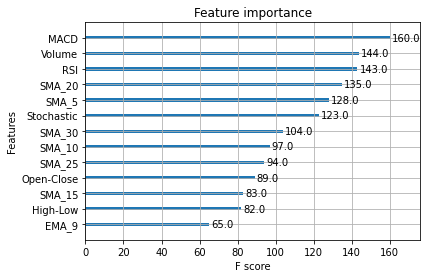

In [ ]:
xgb_classifier1 = XGBClassifier(random_state=42, scale_pos_weight=estimate1)
xgb_classifier1.fit(X_train1, y_train1)



xgb.plot_importance(xgb_classifier1)
plt.show()




In [ ]:
X_train1.shape

(536, 13)

In [ ]:
# training set
y_pred_xgb_tr1 = xgb_classifier1.predict(X_train1)
accuracy_xgb_tr1 = accuracy_score(y_train1, y_pred_xgb_tr1)
print("XGBoost Model Score (Training Set): %.2f%%" % (accuracy_xgb_tr1 * 100.0)) 

# testing set
y_pred_xgb_t1 = xgb_classifier1.predict(X_test1)
xgb_predictions1 = [round(value) for value in y_pred_xgb_t1]
# evaluate predictions
accuracy_xgb_t1 = accuracy_score(y_test1, xgb_predictions1)
print("XGBoost Model Score (Testing Set): %.2f%%" % (accuracy_xgb_t1 * 100.0)) 

XGBoost Model Score (Training Set): 100.00%
XGBoost Model Score (Testing Set): 66.42%


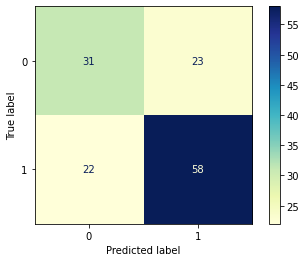

In [ ]:
plot_confusion_matrix(xgb_classifier1, X_test1, y_test1,cmap="YlGnBu"); # good improvement


In [ ]:
# Printing the classification report
print(classification_report(y_test1, y_pred_xgb_t1))

              precision    recall  f1-score   support

           0       0.58      0.57      0.58        54
           1       0.72      0.72      0.72        80

    accuracy                           0.66       134
   macro avg       0.65      0.65      0.65       134
weighted avg       0.66      0.66      0.66       134



### 2. SARCO

In [ ]:
counter = Counter(df_SARCO['Target'])
# estimate scale_pos_weight value
estimate2 = counter[0] / counter[1]
print('Estimate: %.3f' % estimate2)

Estimate: 16.110


In [ ]:
# split data
X_train2, X_test2, y_train2, y_test2 = split_data(df_SARCO, 'Target')
orig_feature_names = list(X_train1.columns)
#scaling the data
X_train2, X_test2 = scale_data(X_train2, X_test2)
X_train2 = pd.DataFrame(X_train2, columns=orig_feature_names)
X_test2 = pd.DataFrame(X_test2, columns=orig_feature_names)


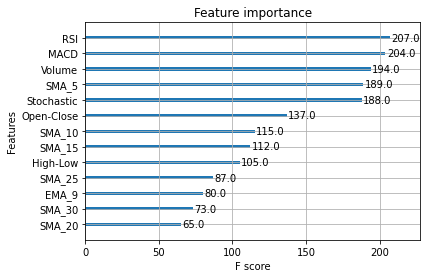

In [ ]:
xgb_classifier2 = XGBClassifier(random_state=42, scale_pos_weight=estimate2)
xgb_classifier2.fit(X_train2, y_train2)

xgb.plot_importance(xgb_classifier2)
plt.show()

In [ ]:
# training set
y_pred_xgb_tr2 = xgb_classifier2.predict(X_train2)
accuracy_xgb_tr2 = accuracy_score(y_train2, y_pred_xgb_tr2)
print("XGBoost Model Score (Training Set): %.2f%%" % (accuracy_xgb_tr2 * 100.0)) 

# testing set
y_pred_xgb_t2 = xgb_classifier2.predict(X_test2)
xgb_predictions2 = [round(value) for value in y_pred_xgb_t2]
# evaluate predictions
accuracy_xgb_t2 = accuracy_score(y_test2, xgb_predictions2)
print("XGBoost Model Score (Testing Set): %.2f%%" % (accuracy_xgb_t2 * 100.0)) 

XGBoost Model Score (Training Set): 100.00%
XGBoost Model Score (Testing Set): 93.56%


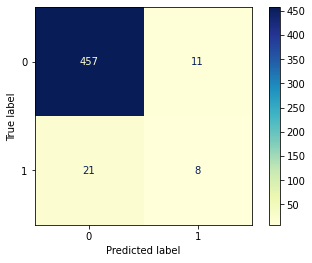

In [ ]:
plot_confusion_matrix(xgb_classifier2, X_test2, y_test2,cmap="YlGnBu"); # good improvement


In [ ]:
# Printing the classification report
print(classification_report(y_test2, y_pred_xgb_t2))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       468
           1       0.42      0.28      0.33        29

    accuracy                           0.94       497
   macro avg       0.69      0.63      0.65       497
weighted avg       0.92      0.94      0.93       497



### 3. Rabigh


In [ ]:
counter = Counter(df_Rabigh['Target'])
# estimate scale_pos_weight value
estimate3 = counter[0] / counter[1]
print('Estimate: %.3f' % estimate3)

Estimate: 0.032


In [ ]:
# split data
X_train3, X_test3, y_train3, y_test3 = split_data(df_Rabigh, 'Target')
orig_feature_names = list(X_train1.columns)
#scaling the data
X_train3, X_test3 = scale_data(X_train3, X_test3)
X_train3 = pd.DataFrame(X_train3, columns=orig_feature_names)
X_test3 = pd.DataFrame(X_test3, columns=orig_feature_names)

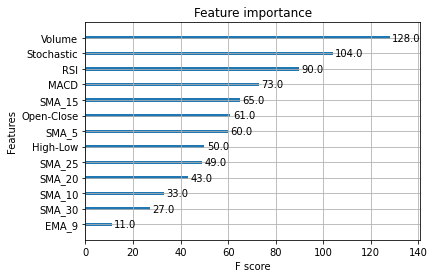

In [ ]:
xgb_classifier3 = XGBClassifier(random_state=42, scale_pos_weight=estimate3)
xgb_classifier3.fit(X_train3, y_train3)

xgb.plot_importance(xgb_classifier3)
plt.show()

In [ ]:
# training set
y_pred_xgb_tr3 = xgb_classifier3.predict(X_train3)
accuracy_xgb_tr3 = accuracy_score(y_train3, y_pred_xgb_tr3)
print("XGBoost Model Score (Training Set): %.2f%%" % (accuracy_xgb_tr3 * 100.0)) 

# testing set
y_pred_xgb_t3 = xgb_classifier3.predict(X_test3)
xgb_predictions3 = [round(value) for value in y_pred_xgb_t3]
# evaluate predictions
accuracy_xgb_t3 = accuracy_score(y_test3, xgb_predictions3)
print("XGBoost Model Score (Testing Set): %.2f%%" % (accuracy_xgb_t3 * 100.0)) 

XGBoost Model Score (Training Set): 98.59%
XGBoost Model Score (Testing Set): 93.96%


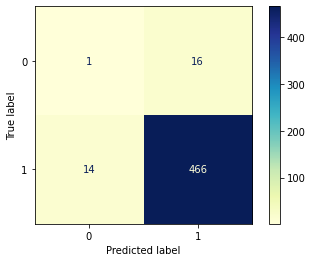

In [ ]:
plot_confusion_matrix(xgb_classifier3, X_test3, y_test3,cmap="YlGnBu"); # good improvement


In [ ]:
# Printing the classification report
print(classification_report(y_test3, y_pred_xgb_t3))

              precision    recall  f1-score   support

           0       0.07      0.06      0.06        17
           1       0.97      0.97      0.97       480

    accuracy                           0.94       497
   macro avg       0.52      0.51      0.52       497
weighted avg       0.94      0.94      0.94       497



### 4. Bahri 

In [ ]:
counter = Counter(df_Bahri['Target'])
# estimate scale_pos_weight value
estimate4 = counter[0] / counter[1]
print('Estimate: %.3f' % estimate4)

Estimate: 0.751


In [ ]:
X_train4, X_test4, y_train4, y_test4 = split_data(df_Bahri, 'Target')
orig_feature_names = list(X_train1.columns)

#scaling the data
X_train4, X_test4 = scale_data(X_train4, X_test4)

X_train4 = pd.DataFrame(X_train4, columns=orig_feature_names)
X_test4 = pd.DataFrame(X_test4, columns=orig_feature_names)

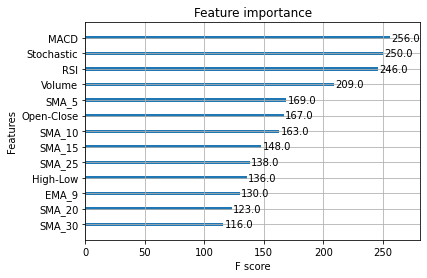

In [ ]:
xgb_classifier4 = XGBClassifier(random_state=42, scale_pos_weight=estimate4)
xgb_classifier4.fit(X_train4, y_train4)

xgb.plot_importance(xgb_classifier4)
plt.show()

In [ ]:
# training set
y_pred_xgb_tr4 = xgb_classifier4.predict(X_train4)
accuracy_xgb_tr4 = accuracy_score(y_train4, y_pred_xgb_tr4)
print("XGBoost Model Score (Training Set): %.2f%%" % (accuracy_xgb_tr4 * 100.0)) 

# testing set
y_pred_xgb_t4 = xgb_classifier4.predict(X_test4)
xgb_predictions4 = [round(value) for value in y_pred_xgb_t4]
# evaluate predictions
accuracy_xgb_t4 = accuracy_score(y_test4, xgb_predictions4)
print("XGBoost Model Score (Testing Set): %.2f%%" % (accuracy_xgb_t4 * 100.0)) 

XGBoost Model Score (Training Set): 99.95%
XGBoost Model Score (Testing Set): 64.99%


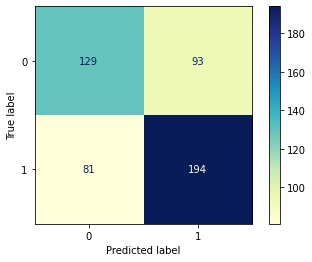

In [ ]:
plot_confusion_matrix(xgb_classifier4, X_test4, y_test4,cmap="YlGnBu"); # good improvement


In [ ]:
# Printing the classification report
print(classification_report(y_test4, y_pred_xgb_t4))

              precision    recall  f1-score   support

           0       0.61      0.58      0.60       222
           1       0.68      0.71      0.69       275

    accuracy                           0.65       497
   macro avg       0.65      0.64      0.64       497
weighted avg       0.65      0.65      0.65       497



### 5. Aldrees

In [ ]:
counter = Counter(df_Aldrees['Target'])
# estimate scale_pos_weight value
estimate5 = counter[0] / counter[1]
print('Estimate: %.3f' % estimate5)

Estimate: 1.749


In [ ]:
X_train5, X_test5, y_train5, y_test5 = split_data(df_Aldrees, 'Target')
orig_feature_names = list(X_train1.columns)
#scaling the data
X_train5, X_test5 = scale_data(X_train5, X_test5)
X_train5 = pd.DataFrame(X_train5, columns=orig_feature_names)
X_test5 = pd.DataFrame(X_test5, columns=orig_feature_names)

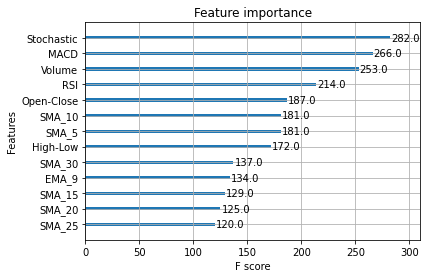

In [ ]:
xgb_classifier5 = XGBClassifier(random_state=42, scale_pos_weight=estimate5)
xgb_classifier5.fit(X_train5, y_train5)


xgb.plot_importance(xgb_classifier5)
plt.show()

In [ ]:
# training set
y_pred_xgb_tr5 = xgb_classifier5.predict(X_train5)
accuracy_xgb_tr5 = accuracy_score(y_train5, y_pred_xgb_tr5)
print("XGBoost Model Score (Training Set): %.2f%%" % (accuracy_xgb_tr5 * 100.0)) 

# testing set
y_pred_xgb_t5 = xgb_classifier5.predict(X_test5)
xgb_predictions5 = [round(value) for value in y_pred_xgb_t5]
# evaluate predictions
accuracy_xgb_t5 = accuracy_score(y_test5, xgb_predictions5)
print("XGBoost Model Score (Testing Set): %.2f%%" % (accuracy_xgb_t5 * 100.0)) 

XGBoost Model Score (Training Set): 100.00%
XGBoost Model Score (Testing Set): 72.84%


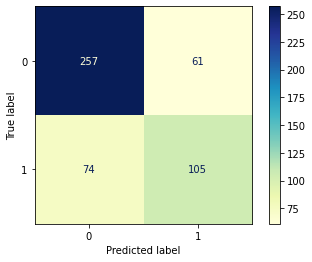

In [ ]:
plot_confusion_matrix(xgb_classifier5, X_test5, y_test5,cmap="YlGnBu"); # good improvement


In [ ]:
# Printing the classification report
print(classification_report(y_test5, y_pred_xgb_t5))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       318
           1       0.63      0.59      0.61       179

    accuracy                           0.73       497
   macro avg       0.70      0.70      0.70       497
weighted avg       0.72      0.73      0.73       497



### XGBoost Overview

{'Aramco': 66.4179104477612, 'SARCO': 93.56136820925553, 'Rabigh': 93.96378269617706, 'Bahri': 64.98993963782696, 'Aldrees': 72.83702213279678}


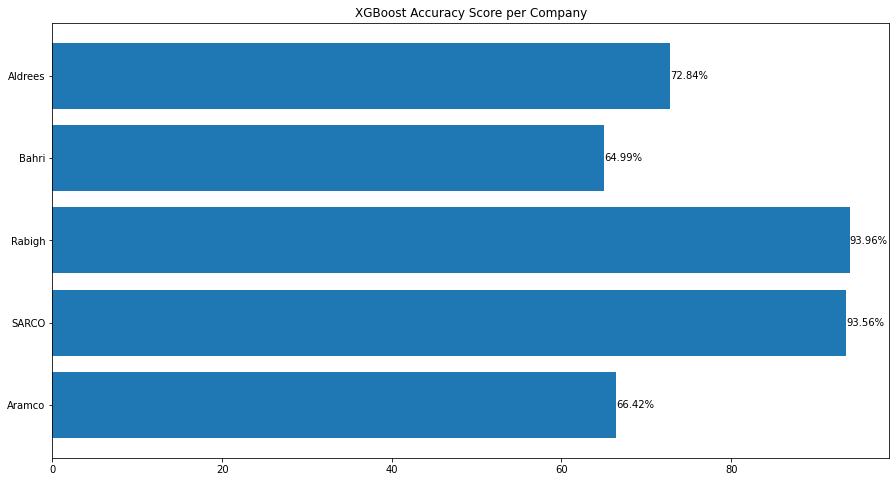

In [ ]:

# Accuracy Score for each company.
xgb_accuracy = {'Aramco': accuracy_xgb_t1*100, 'SARCO': accuracy_xgb_t2*100, 'Rabigh': accuracy_xgb_t3*100, 'Bahri':accuracy_xgb_t4*100, 'Aldrees': accuracy_xgb_t5*100}
print(xgb_accuracy)
xgb_names = list(xgb_accuracy.keys())
xgb_values = list(xgb_accuracy.values())
fig, ax = plt.subplots(figsize=(15,8))
plt.title('XGBoost Accuracy Score per Company')
bars = ax.barh(xgb_names, xgb_values)
ax.bar_label(bars, fmt='%.2f%%')
plt.show()


In [ ]:
#!python --version # update to latest version
# https://stackoverflow.com/questions/68657341/how-can-i-update-google-colabs-python-version#:~:text=Each%20runtime%20gives%20you%20a%20fresh%20google%20colab.&text=python%20version%20manually)-,!,and%20update%20the%20default%20python.


#### XGBoost Model using RandomSearch CV Classification

In [ ]:
# Define the search space
xgboost = xgb.XGBClassifier(objective= "binary:logistic", random_state=42)
param_grid = { 
    # Learning rate shrinks the weights to make the boosting process more conservative
    "learning_rate": [0.0001,0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1] ,
    # Percentage of columns to be randomly samples for each tree.
    'colsample_bytree': [0.3, 0.7, 1, 2, 3],
    'base_score':[0.5, 0.7],
    # Maximum depth of the tree, increasing it increases the model complexity.
    'max_depth': [2, 4, 5, 6, 8, 10, 12],
    'subsample': [0.2, 0.3, 0.5, 0.7, 0.8, 1],
    'n_estimators': [100], 
    'scale_pos_weight': [estimate1]}
# Set up score
scoring = ['accuracy']
# Set up the k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)



In [ ]:
# Define random search

xgb_random_search = RandomizedSearchCV(estimator=xgboost, 
                           param_distributions=param_grid, 
                           n_iter=32,
                           scoring=scoring, 
                           n_jobs=-1, 
                           cv=kfold, 
                           refit='accuracy',
                           verbose=0)
xgb_random_search

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=32, n_jobs=-1,
                   param_distributions={'base_score': [0.5, 0.7],
                                        'colsample_bytree': [0.3, 0.7, 1, 2, 3],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.02, 0.03, 0.04,
                                                          0.05, 0.1],
                                        'max_depth': [2, 4, 5, 6, 8, 10, 12],
                                        'n_estimators': [100],
                                        'scale_pos_weight': [0.7631578947368421],
                                        'subsample': [0.2, 0.3, 0.5, 0.7, 0.8,
                                                      1]},
                   refit='accuracy', scoring=['accuracy'])

### 1. Aramco

In [ ]:
# Fit grid search
# take only relevant columns to improve accuracy. 
X_train11, X_test11, y_train11, y_test11 = split_data(df_Aramco.drop(['EMA_9'], axis=1), 'Target')
random_result1 = xgb_random_search.fit(X_train11, y_train11)
# Print grid search summary
random_result1

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=32, n_jobs=-1,
                   param_distributions={'base_score': [0.5, 0.7],
                                        'colsample_bytree': [0.3, 0.7, 1, 2, 3],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.02, 0.03, 0.04,
                                                          0.05, 0.1],
                                        'max_depth': [2, 4, 5, 6, 8, 10, 12],
                                        'n_estimators': [100],
                                        'scale_pos_weight': [0.7631578947368421],
                                        'subsample': [0.2, 0.3, 0.5, 0.7, 0.8,
                                                      1]},
                   refit='accuracy', scoring=['accuracy'])

In [ ]:
print("\n\nBest score: %f using %s" % (random_result1.best_score_, random_result1.best_params_))
print("Best Estimator: ")
xgb_random_search.best_estimator_



Best score: 0.621184 using {'subsample': 0.2, 'scale_pos_weight': 0.7631578947368421, 'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.0001, 'colsample_bytree': 1, 'base_score': 0.5}
Best Estimator: 


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.0001, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
# training set
y_pred_xgb_tr111 = xgb_random_search.predict(X_train11)
accuracy_xgb_tr111 = accuracy_score(y_train11, y_pred_xgb_tr111)
print("XGBoost Model Score (Training Set): %.2f%%" % (accuracy_xgb_tr111 * 100.0)) 

# testing set
y_pred_xgb_t111 = xgb_random_search.predict(X_test11)
xgb_predictions111 = [round(value) for value in y_pred_xgb_t111]
# evaluate predictions
accuracy_xgb_t111 = accuracy_score(y_test11, xgb_predictions111)
print("XGBoost Model Score (Testing Set): %.2f%%" % (accuracy_xgb_t111 * 100.0)) 

XGBoost Model Score (Training Set): 67.16%
XGBoost Model Score (Testing Set): 67.91%


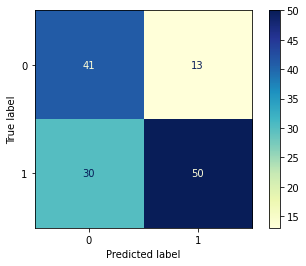

In [ ]:
plot_confusion_matrix(xgb_random_search, X_test11, y_test11,cmap="YlGnBu"); # good improvement


In [ ]:
# Printing the classification report
print(classification_report(y_test11, y_pred_xgb_t111))

              precision    recall  f1-score   support

           0       0.58      0.76      0.66        54
           1       0.79      0.62      0.70        80

    accuracy                           0.68       134
   macro avg       0.69      0.69      0.68       134
weighted avg       0.71      0.68      0.68       134



### 2. SARCO

In [ ]:
X_train22, X_test22, y_train22, y_test22 = split_data(df_SARCO.drop(['EMA_9'], axis=1), 'Target')
X_train22, X_test22 = scale_data(X_train22, X_test22)

In [ ]:
# fit random search
param_grid['scale_pos_weight'] = [estimate2]
xgb_random_search2 = RandomizedSearchCV(estimator=xgboost, 
                           param_distributions=param_grid, 
                           n_iter=32,
                           scoring=scoring, 
                           n_jobs=-1, 
                           cv=kfold, 
                           refit='accuracy',
                           verbose=0)
random_result2 = xgb_random_search2.fit(X_train22, y_train22)
random_result2

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=32, n_jobs=-1,
                   param_distributions={'base_score': [0.5, 0.7],
                                        'colsample_bytree': [0.3, 0.7, 1, 2, 3],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.02, 0.03, 0.04,
                                                          0.05, 0.1],
                                        'max_depth': [2, 4, 5, 6, 8, 10, 12],
                                        'n_estimators': [100],
                                        'scale_pos_weight': [16.110344827586207],
                                        'subsample': [0.2, 0.3, 0.5, 0.7, 0.8,
                                                      1]},
                   refit='accuracy', scoring=['accuracy'])

In [ ]:
print("\n\nBest score: %f using %s" % (random_result2.best_score_, random_result2.best_params_))
print("Best Estimator: ")
xgb_random_search2.best_estimator_



Best score: 0.931953 using {'subsample': 0.5, 'scale_pos_weight': 16.110344827586207, 'n_estimators': 100, 'max_depth': 12, 'learning_rate': 0.03, 'colsample_bytree': 0.3, 'base_score': 0.7}
Best Estimator: 


XGBClassifier(base_score=0.7, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.03, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
# training set
y_pred_xgb_tr222 = xgb_random_search2.predict(X_train22)
accuracy_xgb_tr222 = accuracy_score(y_train22, y_pred_xgb_tr222)
print("XGBoost Model Score (Training Set): %.2f%%" % (accuracy_xgb_tr222 * 100.0)) 

# testing set
y_pred_xgb_t222 = xgb_random_search2.predict(X_test22)
xgb_predictions222 = [round(value) for value in y_pred_xgb_t222]
# evaluate predictions
accuracy_xgb_t222 = accuracy_score(y_test22, xgb_predictions222)
print("XGBoost Model Score (Testing Set): %.2f%%" % (accuracy_xgb_t222 * 100.0)) 

XGBoost Model Score (Training Set): 99.70%
XGBoost Model Score (Testing Set): 94.57%


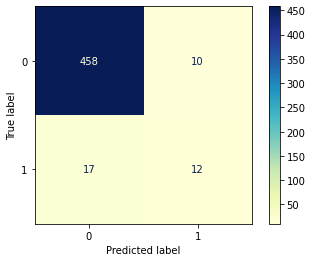

In [ ]:
plot_confusion_matrix(xgb_random_search2, X_test22, y_test22,cmap="YlGnBu"); # good improvement


In [ ]:
# Printing the classification report
print(classification_report(y_test22, y_pred_xgb_t222))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       468
           1       0.55      0.41      0.47        29

    accuracy                           0.95       497
   macro avg       0.75      0.70      0.72       497
weighted avg       0.94      0.95      0.94       497



### 3. Rabigh

In [ ]:
X_train33, X_test33, y_train33, y_test33 = split_data(df_Rabigh.drop(['EMA_9'], axis=1), 'Target')

X_train33, X_test33 = scale_data(X_train33, X_test33)

In [ ]:
param_grid['scale_pos_weight'] = [estimate3]
xgb_random_search3 = RandomizedSearchCV(estimator=xgboost, 
                           param_distributions=param_grid, 
                           n_iter=32,
                           scoring=scoring, 
                           n_jobs=-1, 
                           cv=kfold, 
                           refit='accuracy',
                           verbose=0)
random_result3 = xgb_random_search3.fit(X_train33, y_train33)
random_result3

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=32, n_jobs=-1,
                   param_distributions={'base_score': [0.5, 0.7],
                                        'colsample_bytree': [0.3, 0.7, 1, 2, 3],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.02, 0.03, 0.04,
                                                          0.05, 0.1],
                                        'max_depth': [2, 4, 5, 6, 8, 10, 12],
                                        'n_estimators': [100],
                                        'scale_pos_weight': [0.0324459234608985],
                                        'subsample': [0.2, 0.3, 0.5, 0.7, 0.8,
                                                      1]},
                   refit='accuracy', scoring=['accuracy'])

In [ ]:
print("\n\nBest score: %f using %s" % (random_result3.best_score_, random_result3.best_params_))
print("Best Estimator: ")
xgb_random_search3.best_estimator_



Best score: 0.969270 using {'subsample': 0.2, 'scale_pos_weight': 0.0324459234608985, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.001, 'colsample_bytree': 0.3, 'base_score': 0.7}
Best Estimator: 


XGBClassifier(base_score=0.7, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.001, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
# training set
y_pred_xgb_tr333 = xgb_random_search3.predict(X_train33)
accuracy_xgb_tr333 = accuracy_score(y_train33, y_pred_xgb_tr333)
print("XGBoost Model Score (Training Set): %.2f%%" % (accuracy_xgb_tr333 * 100.0)) 

# testing set
y_pred_xgb_t333 = xgb_random_search3.predict(X_test33)
xgb_predictions333 = [round(value) for value in y_pred_xgb_t333]
# evaluate predictions
accuracy_xgb_t333 = accuracy_score(y_test33, xgb_predictions333)
print("XGBoost Model Score (Testing Set): %.2f%%" % (accuracy_xgb_t333 * 100.0)) 

XGBoost Model Score (Training Set): 96.93%
XGBoost Model Score (Testing Set): 96.58%


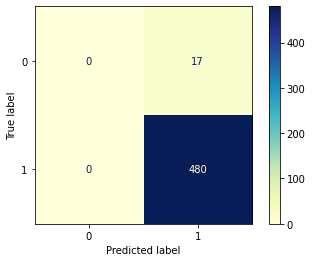

In [ ]:
plot_confusion_matrix(xgb_random_search3, X_test33, y_test33,cmap="YlGnBu"); # good improvement


In [ ]:
# Printing the classification report
print(classification_report(y_test33, y_pred_xgb_t333))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.97      1.00      0.98       480

    accuracy                           0.97       497
   macro avg       0.48      0.50      0.49       497
weighted avg       0.93      0.97      0.95       497



### 4. Bahri 

In [ ]:
X_train44, X_test44, y_train44, y_test44 = split_data(df_Bahri.drop(['EMA_9'], axis=1), 'Target')

X_train44, X_test44 = scale_data(X_train44, X_test44)

In [ ]:
param_grid['scale_pos_weight'] = [estimate4]
xgb_random_search4 = RandomizedSearchCV(estimator=xgboost, 
                           param_distributions=param_grid, 
                           n_iter=32,
                           scoring=scoring, 
                           n_jobs=-1, 
                           cv=kfold, 
                           refit='accuracy',
                           verbose=0)
random_result4 = xgb_random_search4.fit(X_train44, y_train44)
random_result4

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=32, n_jobs=-1,
                   param_distributions={'base_score': [0.5, 0.7],
                                        'colsample_bytree': [0.3, 0.7, 1, 2, 3],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.02, 0.03, 0.04,
                                                          0.05, 0.1],
                                        'max_depth': [2, 4, 5, 6, 8, 10, 12],
                                        'n_estimators': [100],
                                        'scale_pos_weight': [0.7508821453775583],
                                        'subsample': [0.2, 0.3, 0.5, 0.7, 0.8,
                                                      1]},
                   refit='accuracy', scoring=['accuracy'])

In [ ]:
print("\n\nBest score: %f using %s" % (random_result4.best_score_, random_result4.best_params_))
print("Best Estimator: ")
xgb_random_search4.best_estimator_



Best score: 0.695555 using {'subsample': 0.5, 'scale_pos_weight': 0.7508821453775583, 'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.03, 'colsample_bytree': 0.7, 'base_score': 0.7}
Best Estimator: 


XGBClassifier(base_score=0.7, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.03, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
# xgb_classifier4 = XGBClassifier(base_score=0.7, colsample_bytree=0.7,
#               learning_rate=0.1,max_depth=8, n_estimators=100,
#               random_state=42, subsample=0.5)
# training set
#xgb_class4 = xgb_random_search.fit(X_train4, y_train4)# training set
y_pred_xgb_tr444 = xgb_random_search4.predict(X_train44)
accuracy_xgb_tr444 = accuracy_score(y_train44, y_pred_xgb_tr444)
print("XGBoost Model Score (Training Set): %.2f%%" % (accuracy_xgb_tr444 * 100.0)) 

# testing set
y_pred_xgb_t444 = xgb_random_search4.predict(X_test44)
xgb_predictions444 = [round(value) for value in y_pred_xgb_t444]
# evaluate predictions
accuracy_xgb_t444 = accuracy_score(y_test44, xgb_predictions444)
print("XGBoost Model Score (Testing Set): %.2f%%" % (accuracy_xgb_t444 * 100.0)) 

XGBoost Model Score (Training Set): 71.02%
XGBoost Model Score (Testing Set): 67.20%


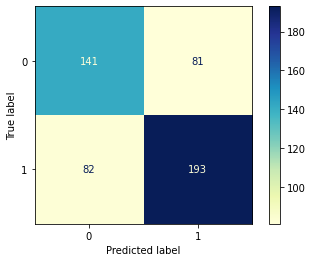

In [ ]:
plot_confusion_matrix(xgb_random_search4, X_test44, y_test44,cmap="YlGnBu"); # good improvement


In [ ]:
# Printing the classification report
print(classification_report(y_test44, y_pred_xgb_t444))

              precision    recall  f1-score   support

           0       0.63      0.64      0.63       222
           1       0.70      0.70      0.70       275

    accuracy                           0.67       497
   macro avg       0.67      0.67      0.67       497
weighted avg       0.67      0.67      0.67       497



### 5. Aldrees

In [ ]:
X_train55, X_test55, y_train55, y_test55 = split_data(df_Aldrees.drop(['EMA_9'], axis=1), 'Target')

X_train55, X_test55 = scale_data(X_train55, X_test55)

In [ ]:
param_grid['scale_pos_weight'] = [estimate5]
xgb_random_search5 = RandomizedSearchCV(estimator=xgboost, 
                           param_distributions=param_grid, 
                           n_iter=32,
                           scoring=scoring, 
                           n_jobs=-1, 
                           cv=kfold, 
                           refit='accuracy',
                           verbose=0)
random_result5 = xgb_random_search5.fit(X_train55, y_train55)
random_result5

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=32, n_jobs=-1,
                   param_distributions={'base_score': [0.5, 0.7],
                                        'colsample_bytree': [0.3, 0.7, 1, 2, 3],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.02, 0.03, 0.04,
                                                          0.05, 0.1],
                                        'max_depth': [2, 4, 5, 6, 8, 10, 12],
                                        'n_estimators': [100],
                                        'scale_pos_weight': [1.7486157253599115],
                                        'subsample': [0.2, 0.3, 0.5, 0.7, 0.8,
                                                      1]},
                   refit='accuracy', scoring=['accuracy'])

In [ ]:
print("\n\nBest score: %f using %s" % (random_result5.best_score_, random_result5.best_params_))
print("Best Estimator: ")
xgb_random_search5.best_estimator_



Best score: 0.703275 using {'subsample': 0.3, 'scale_pos_weight': 1.7486157253599115, 'n_estimators': 100, 'max_depth': 8, 'learning_rate': 0.001, 'colsample_bytree': 1, 'base_score': 0.5}
Best Estimator: 


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.001, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
#xgb_classifier5(xgb_grid.best_estimator_
# training set
y_pred_xgb_tr555 = xgb_random_search5.predict(X_train55)
accuracy_xgb_tr555 = accuracy_score(y_train55, y_pred_xgb_tr555)
print("XGBoost Model Score (Training Set): %.2f%%" % (accuracy_xgb_tr555 * 100.0)) 

# testing set
y_pred_xgb_t555 = xgb_random_search5.predict(X_test55)
xgb_predictions555 = [round(value) for value in y_pred_xgb_t555]
# evaluate predictions
accuracy_xgb_t555 = accuracy_score(y_test55, xgb_predictions555)
print("XGBoost Model Score (Testing Set): %.2f%%" % (accuracy_xgb_t555 * 100.0)) 

XGBoost Model Score (Training Set): 80.40%
XGBoost Model Score (Testing Set): 73.84%


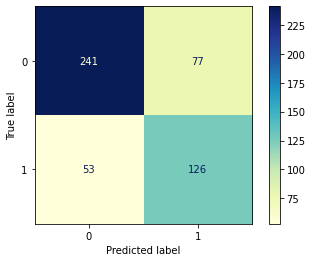

In [ ]:
plot_confusion_matrix(xgb_random_search5, X_test55, y_test55,cmap="YlGnBu"); # good improvement


In [ ]:
# Printing the classification report
print(classification_report(y_test55, y_pred_xgb_t555))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       318
           1       0.62      0.70      0.66       179

    accuracy                           0.74       497
   macro avg       0.72      0.73      0.72       497
weighted avg       0.75      0.74      0.74       497



#### Overview of XGBoost tuninng using RandomizedSearch CV

{'Aramco': 67.91044776119402, 'SARCO': 94.56740442655935, 'Rabigh': 96.579476861167, 'Bahri': 67.20321931589537, 'Aldrees': 73.8430583501006}


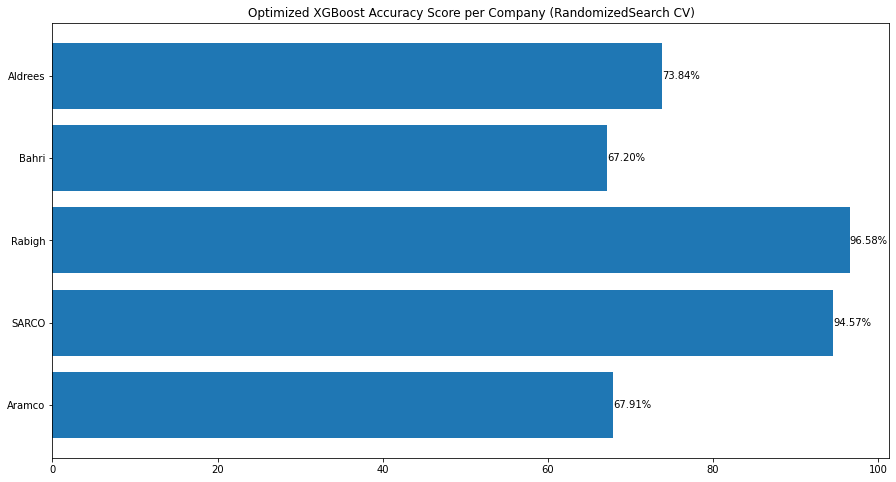

In [ ]:

# Accuracy Score for each company.
xgb_accuracy11 = {'Aramco': accuracy_xgb_t111*100, 'SARCO': accuracy_xgb_t222*100, 'Rabigh': accuracy_xgb_t333*100, 'Bahri':accuracy_xgb_t444*100, 'Aldrees': accuracy_xgb_t555*100}
print(xgb_accuracy11)
xgb_names11 = list(xgb_accuracy11.keys())
xgb_values11 = list(xgb_accuracy11.values())
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Optimized XGBoost Accuracy Score per Company (RandomizedSearch CV)')
bars = ax.barh(xgb_names11, xgb_values11)
ax.bar_label(bars, fmt='%.2f%%')
plt.show()



#### XGBoost Model using GridSearch CV Classification

In [ ]:
xgboost = xgb.XGBClassifier(objective= "binary:logistic", random_state=42)

#brute force scan for all parameters, here are the tricks
#usually max_depth is 6,7,8
#learning rate is around 0.05, but small changes may make big diff
#tuning min_child_weight subsample colsample_bytree can have 
#much fun of fighting against overfit 
#n_estimators is how many round of boosting
#finally, ensemble xgboost with multiple seeds may reduce variance
parameters = {'base_score':[0.5, 0.7],
              'learning_rate': [0.01, 0.02, 0.04, 0.05, 0.1],
              'max_depth': [2, 4, 5, 6, 8],
              'subsample': [0.2, 0.3, 0.5, 0.7, 0.8, 1],
              'colsample_bytree': [0.3, 0.7, 1, 2, 3],
              'n_estimators': [100],
              'scale_pos_weight': [estimate1]#, estimate2, estimate3, estimate4, estimate5]
             } #number of trees

xgb_grid = GridSearchCV(xgboost, parameters, n_jobs=-1, 
                   cv=KFold(n_splits=5, shuffle=True, random_state=42), # at least 5 splits
                   scoring='accuracy',
                   verbose=2)
xgb_grid

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraint...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'base_score': [0.5, 0.7],
                         'colsample_bytree': [0.3, 0.7, 1, 2, 3],
                         'learning_rate': [0.01, 0.02, 0.04, 0.05, 0.1],
                         'max_depth': [2, 4, 5, 6, 8], 'n_estimators': [100],
                         'scale_pos_weight': [0.7631578947368421],
                         'subsample': [0.2, 0.3, 0.5, 0.7, 0.8, 1]},
             scoring='accuracy', verbose=2)

### 1. Aramco

In [ ]:
X_train11, X_test11 = scale_data(X_train11, X_test11)
xgb_grid_result1 = xgb_grid.fit(X_train11, y_train11)
xgb_grid_result1

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraint...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'base_score': [0.5, 0.7],
                         'colsample_bytree': [0.3, 0.7, 1, 2, 3],
                         'learning_rate': [0.01, 0.02, 0.04, 0.05, 0.1],
                         'max_depth': [2, 4, 5, 6, 8], 'n_estimators': [100],
                         'scale_pos_weight': [0.7631578947368421],
                         'subsample': [0.2, 0.3, 0.5, 0.7, 0.8, 1]},
             scoring='accuracy', verbose=2)

In [ ]:
print("\n\nBest score: %f using %s" % (xgb_grid_result1.best_score_, xgb_grid_result1.best_params_))
print("Best Estimator: ")
xgb_grid.best_estimator_



Best score: 0.643683 using {'base_score': 0.5, 'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100, 'scale_pos_weight': 0.7631578947368421, 'subsample': 0.2}
Best Estimator: 


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
# training set
y_pred_xgb_tr11 = xgb_grid.predict(X_train11)
accuracy_xgb_tr11 = accuracy_score(y_train11, y_pred_xgb_tr11)
print("XGBoost Model Score (Training Set): %.2f%%" % (accuracy_xgb_tr11 * 100.0)) 

# testing set
y_pred_xgb_t11 = xgb_grid.predict(X_test11)
xgb_predictions11 = [round(value) for value in y_pred_xgb_t11]
# evaluate predictions
accuracy_xgb_t11 = accuracy_score(y_test11, xgb_predictions11)
print("XGBoost Model Score (Testing Set): %.2f%%" % (accuracy_xgb_t11 * 100.0)) 

XGBoost Model Score (Training Set): 72.39%
XGBoost Model Score (Testing Set): 62.69%


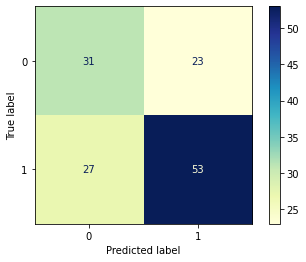

In [ ]:
plot_confusion_matrix(xgb_grid, X_test11, y_test11,cmap="YlGnBu"); # good improvement


In [ ]:
# Printing the classification report
print(classification_report(y_test11, y_pred_xgb_t11))

              precision    recall  f1-score   support

           0       0.53      0.57      0.55        54
           1       0.70      0.66      0.68        80

    accuracy                           0.63       134
   macro avg       0.62      0.62      0.62       134
weighted avg       0.63      0.63      0.63       134



### 2. SARCO

In [ ]:
parameters['scale_pos_weight'] = [estimate2]
xgb_grid2 = GridSearchCV(xgboost, parameters, n_jobs=-1, 
                   cv=KFold(n_splits=5, shuffle=True, random_state=42), # at least 5 splits
                   scoring='accuracy',
                   verbose=2)
xgb_grid_result2 = xgb_grid2.fit(X_train22, y_train22)
xgb_grid_result2

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraint...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'base_score': [0.5, 0.7],
                         'colsample_bytree': [0.3, 0.7, 1, 2, 3],
                         'learning_rate': [0.01, 0.02, 0.04, 0.05, 0.1],
                         'max_depth': [2, 4, 5, 6, 8], 'n_estimators': [100],
                         'scale_pos_weight': [16.110344827586207],
                         'subsample': [0.2, 0.3, 0.5, 0.7, 0.8, 1]},
             scoring='accuracy', verbose=2)

In [ ]:
print("\n\nBest score: %f using %s" % (xgb_grid_result2.best_score_, xgb_grid_result2.best_params_))
print("Best Estimator: ")
xgb_grid2.best_estimator_



Best score: 0.936487 using {'base_score': 0.7, 'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100, 'scale_pos_weight': 16.110344827586207, 'subsample': 1}
Best Estimator: 


XGBClassifier(base_score=0.7, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:

# training set
y_pred_xgb_tr22 = xgb_grid2.predict(X_train22)
accuracy_xgb_tr22 = accuracy_score(y_train22, y_pred_xgb_tr22)
print("XGBoost Model Score (Training Set): %.2f%%" % (accuracy_xgb_tr22 * 100.0)) 

# testing set
y_pred_xgb_t22 = xgb_grid2.predict(X_test22)
xgb_predictions22 = [round(value) for value in y_pred_xgb_t22]
# evaluate predictions
accuracy_xgb_t22 = accuracy_score(y_test2, xgb_predictions22)
print("XGBoost Model Score (Testing Set): %.2f%%" % (accuracy_xgb_t22 * 100.0)) 

XGBoost Model Score (Training Set): 100.00%
XGBoost Model Score (Testing Set): 94.16%


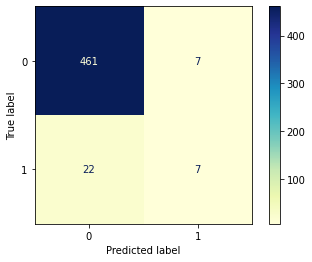

In [ ]:
plot_confusion_matrix(xgb_grid2, X_test22, y_test22,cmap="YlGnBu"); # good improvement


In [ ]:
# Printing the classification report
print(classification_report(y_test22, y_pred_xgb_t22))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       468
           1       0.50      0.24      0.33        29

    accuracy                           0.94       497
   macro avg       0.73      0.61      0.65       497
weighted avg       0.93      0.94      0.93       497



### 3. Rabigh

In [ ]:
parameters['scale_pos_weight'] = [estimate3]
xgb_grid3 = GridSearchCV(xgboost, parameters, n_jobs=-1, 
                   cv=KFold(n_splits=5, shuffle=True, random_state=42), # at least 5 splits
                   scoring='accuracy',
                   verbose=2)

In [ ]:
xgb_grid_result3 = xgb_grid3.fit(X_train33, y_train33)
xgb_grid_result3

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraint...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'base_score': [0.5, 0.7],
                         'colsample_bytree': [0.3, 0.7, 1, 2, 3],
                         'learning_rate': [0.01, 0.02, 0.04, 0.05, 0.1],
                         'max_depth': [2, 4, 5, 6, 8], 'n_estimators': [100],
                         'scale_pos_weight': [0.0324459234608985],
                         'subsample': [0.2, 0.3, 0.5, 0.7, 0.8, 1]},
             scoring='accuracy', verbose=2)

In [ ]:
print("\n\nBest score: %f using %s" % (xgb_grid_result3.best_score_, xgb_grid_result3.best_params_))
print("Best Estimator: ")
xgb_grid3.best_estimator_



Best score: 0.969270 using {'base_score': 0.7, 'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 100, 'scale_pos_weight': 0.0324459234608985, 'subsample': 0.2}
Best Estimator: 


XGBClassifier(base_score=0.7, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:

# training set
y_pred_xgb_tr33 = xgb_grid3.predict(X_train33)
accuracy_xgb_tr33 = accuracy_score(y_train33, y_pred_xgb_tr33)
print("XGBoost Model Score (Training Set): %.2f%%" % (accuracy_xgb_tr33 * 100.0)) 

# testing set
y_pred_xgb_t33 = xgb_grid3.predict(X_test33)
xgb_predictions33 = [round(value) for value in y_pred_xgb_t33]
# evaluate predictions
accuracy_xgb_t33 = accuracy_score(y_test33, xgb_predictions33)
print("XGBoost Model Score (Testing Set): %.2f%%" % (accuracy_xgb_t33 * 100.0)) 

XGBoost Model Score (Training Set): 96.93%
XGBoost Model Score (Testing Set): 96.58%


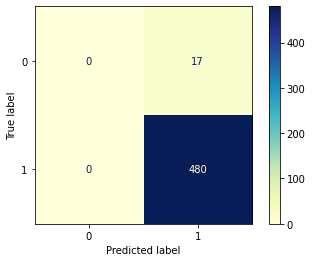

In [ ]:
plot_confusion_matrix(xgb_grid3, X_test33, y_test33,cmap="YlGnBu"); # good improvement


In [ ]:
# Printing the classification report
print(classification_report(y_test33, y_pred_xgb_t33))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.97      1.00      0.98       480

    accuracy                           0.97       497
   macro avg       0.48      0.50      0.49       497
weighted avg       0.93      0.97      0.95       497



### 4. Bahri

In [ ]:
parameters['scale_pos_weight'] = [estimate4]
xgb_grid4 = GridSearchCV(xgboost, parameters, n_jobs=-1, 
                   cv=KFold(n_splits=5, shuffle=True, random_state=42), # at least 5 splits
                   scoring='accuracy',
                   verbose=2)
xgb_grid_result4 = xgb_grid4.fit(X_train44, y_train44)
xgb_grid_result4

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraint...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'base_score': [0.5, 0.7],
                         'colsample_bytree': [0.3, 0.7, 1, 2, 3],
                         'learning_rate': [0.01, 0.02, 0.04, 0.05, 0.1],
                         'max_depth': [2, 4, 5, 6, 8], 'n_estimators': [100],
                         'scale_pos_weight': [0.7508821453775583],
                         'subsample': [0.2, 0.3, 0.5, 0.7, 0.8, 1]},
             scoring='accuracy', verbose=2)

In [ ]:
print("\n\nBest score: %f using %s" % (xgb_grid_result4.best_score_, xgb_grid_result4.best_params_))
print("Best Estimator: ")
xgb_grid4.best_estimator_



Best score: 0.705127 using {'base_score': 0.7, 'colsample_bytree': 0.7, 'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 100, 'scale_pos_weight': 0.7508821453775583, 'subsample': 0.3}
Best Estimator: 


XGBClassifier(base_score=0.7, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.02, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
# training set
y_pred_xgb_tr44 = xgb_grid4.predict(X_train44)
accuracy_xgb_tr44 = accuracy_score(y_train44, y_pred_xgb_tr44)
print("XGBoost Model Score (Training Set): %.2f%%" % (accuracy_xgb_tr44 * 100.0)) 

# testing set
y_pred_xgb_t44 = xgb_grid4.predict(X_test44)
xgb_predictions44 = [round(value) for value in y_pred_xgb_t44]
# evaluate predictions
accuracy_xgb_t44 = accuracy_score(y_test44, xgb_predictions44)
print("XGBoost Model Score (Testing Set): %.2f%%" % (accuracy_xgb_t44 * 100.0)) 

XGBoost Model Score (Training Set): 75.71%
XGBoost Model Score (Testing Set): 66.40%


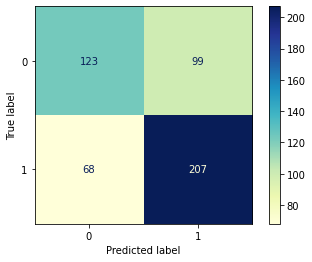

In [ ]:
plot_confusion_matrix(xgb_grid4, X_test44, y_test44,cmap="YlGnBu"); # good improvement


In [ ]:
# Printing the classification report
print(classification_report(y_test44, y_pred_xgb_t44))

              precision    recall  f1-score   support

           0       0.64      0.55      0.60       222
           1       0.68      0.75      0.71       275

    accuracy                           0.66       497
   macro avg       0.66      0.65      0.65       497
weighted avg       0.66      0.66      0.66       497



### 5. Aldrees

In [ ]:
parameters['scale_pos_weight'] = [estimate5]
xgb_grid5 = GridSearchCV(xgboost, parameters, n_jobs=-1, 
                   cv=KFold(n_splits=5, shuffle=True, random_state=42), # at least 5 splits
                   scoring='accuracy',
                   verbose=2)
xgb_grid_result5 = xgb_grid5.fit(X_train55, y_train55)
xgb_grid_result5

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraint...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'base_score': [0.5, 0.7],
                         'colsample_bytree': [0.3, 0.7, 1, 2, 3],
                         'learning_rate': [0.01, 0.02, 0.04, 0.05, 0.1],
                         'max_depth': [2, 4, 5, 6, 8], 'n_estimators': [100],
                         'scale_pos_weight': [1.7486157253599115],
                         'subsample': [0.2, 0.3, 0.5, 0.7, 0.8, 1]},
             scoring='accuracy', verbose=2)

In [ ]:
print("\n\nBest score: %f using %s" % (xgb_grid_result5.best_score_, xgb_grid_result5.best_params_))
print("Best Estimator: ")
xgb_grid5.best_estimator_



Best score: 0.714358 using {'base_score': 0.7, 'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 100, 'scale_pos_weight': 1.7486157253599115, 'subsample': 0.7}
Best Estimator: 


XGBClassifier(base_score=0.7, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
#xgb_classifier5(xgb_grid.best_estimator_
# training set
y_pred_xgb_tr55 = xgb_grid5.predict(X_train55)
accuracy_xgb_tr55 = accuracy_score(y_train55, y_pred_xgb_tr55)
print("XGBoost Model Score (Training Set): %.2f%%" % (accuracy_xgb_tr55 * 100.0)) 

# testing set
y_pred_xgb_t55 = xgb_grid5.predict(X_test55)
xgb_predictions55 = [round(value) for value in y_pred_xgb_t55]
# evaluate predictions
accuracy_xgb_t55 = accuracy_score(y_test55, xgb_predictions55)
print("XGBoost Model Score (Testing Set): %.2f%%" % (accuracy_xgb_t55 * 100.0)) 

XGBoost Model Score (Training Set): 88.31%
XGBoost Model Score (Testing Set): 73.44%


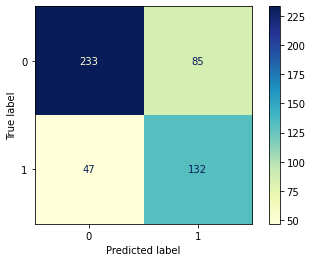

In [ ]:
plot_confusion_matrix(xgb_grid5, X_test55, y_test55,cmap="YlGnBu"); # good improvement


In [ ]:
# Printing the classification report
print(classification_report(y_test55, y_pred_xgb_t55))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78       318
           1       0.61      0.74      0.67       179

    accuracy                           0.73       497
   macro avg       0.72      0.74      0.72       497
weighted avg       0.75      0.73      0.74       497



#### Overview of XGBoost tuninng using GridSearch CV

{'Aramco': 62.68656716417911, 'SARCO': 94.16498993963782, 'Rabigh': 96.579476861167, 'Bahri': 66.39839034205231, 'Aldrees': 73.44064386317908}


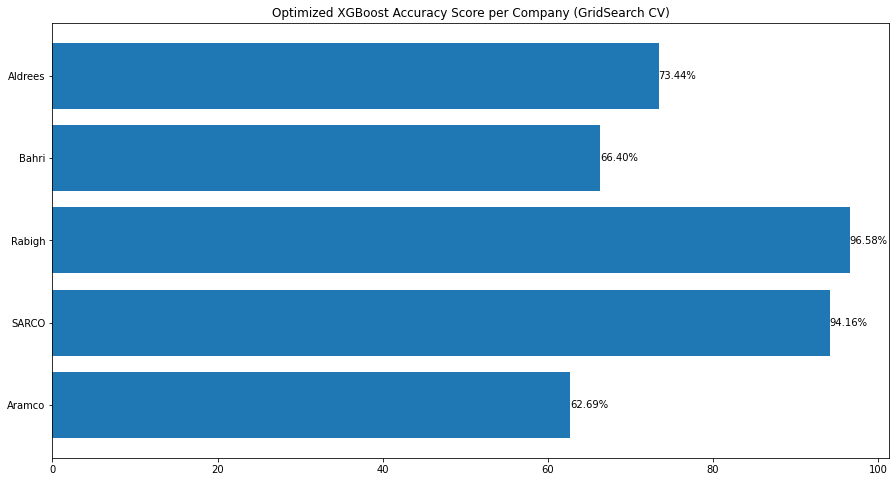

In [ ]:

# Accuracy Score for each company.
xgb_accuracy1 = {'Aramco': accuracy_xgb_t11*100, 'SARCO': accuracy_xgb_t22*100, 'Rabigh': accuracy_xgb_t33*100, 'Bahri':accuracy_xgb_t44*100, 'Aldrees': accuracy_xgb_t55*100}
print(xgb_accuracy1)
xgb_names1 = list(xgb_accuracy1.keys())
xgb_values1 = list(xgb_accuracy1.values())
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Optimized XGBoost Accuracy Score per Company (GridSearch CV)')
bars = ax.barh(xgb_names1, xgb_values1)
ax.bar_label(bars, fmt='%.2f%%')
plt.show()



### XGBoost Models Accuracy

In [ ]:

df_xgb = pd.DataFrame({
    'Company': xgb_names,
    'XGBoost': xgb_values,
    'XGBoost_GridSearch': xgb_values1,
    'XGBoost_RanomizedSearch': xgb_values11
})
df_xgb
#df_xgb.to_csv('xgb_accuracy_1.csv')

,Company,XGBoost,XGBoost_GridSearch,XGBoost_RanomizedSearch
0,Aramco,66.417910,62.686567,67.910448
1,SARCO,93.561368,94.164990,94.567404
2,Rabigh,93.963783,96.579477,96.579477
3,Bahri,64.989940,66.398390,67.203219
4,Aldrees,72.837022,73.440644,73.843058


In [ ]:
df_xgb.iloc[1,3]

In [ ]:

# plt.figure(figsize=(15,6))

# plt.subplot(1, 3, 1)
# bar = sns.barplot(x="Company", y="XGBoost",data=df_xgb)
# for i in ax.containers:
#     bar.bar_label(i, fmt='%.2f%%', label_type='center')
    
# plt.subplot(1, 3, 2)
# bar1 = sns.barplot (x="Company", y=df_xgb['XGBoost_GridSearch'].values, data=df_xgb);
# for i in ax.containers:
#     bar1.bar_label(i, fmt='%.2f%%', label_type='center')
    
# plt.subplot(1, 3, 3)
# bar11 = sns.barplot(x=df_xgb['Company'], y=df_xgb['XGBoost_RanomizedSearch'].values, data=df_xgb);
# for i in ax.containers:
#     bar11.bar_label(i, fmt='%.2f%%', label_type='center')
    
# plt.tight_layout()
# plt.suptitle('XGBoost Accuracy per Company', y=1.05) 
# sns.despine(left=True, bottom=True)
# plt.show()

### Calculate log loss (error) for all the XGBoost Models

In [ ]:
xgb_log_loss = {
'Aramco': log_loss(y_true=y_test1, y_pred=y_pred_xgb_t1, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'SARCO': log_loss(y_true=y_test2, y_pred=y_pred_xgb_t2, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'Rabigh': log_loss(y_true=y_test3, y_pred=y_pred_xgb_t3, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'Bahri': log_loss(y_true=y_test4, y_pred=y_pred_xgb_t4, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'Aldrees': log_loss(y_true=y_test5, y_pred=y_pred_xgb_t5, eps=1e-15, normalize=True, sample_weight=None, labels=None)    
}

xgb_log_loss_values = list(xgb_log_loss.values())

xgb_randomsearch_log_loss = {
'Aramco': log_loss(y_true=y_test11, y_pred=y_pred_xgb_t111, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'SARCO': log_loss(y_true=y_test22, y_pred=y_pred_xgb_t222, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'Rabigh': log_loss(y_true=y_test33, y_pred=y_pred_xgb_t333, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'Bahri': log_loss(y_true=y_test44, y_pred=y_pred_xgb_t444, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'Aldrees': log_loss(y_true=y_test55, y_pred=y_pred_xgb_t555, eps=1e-15, normalize=True, sample_weight=None, labels=None)    
}
xgb_randomsearch_log_loss_values = list(xgb_randomsearch_log_loss.values())


xgb_gridsearch_log_loss = {
'Aramco': log_loss(y_true=y_test11, y_pred=y_pred_xgb_t11, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'SARCO': log_loss(y_true=y_test22, y_pred=y_pred_xgb_t22, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'Rabigh': log_loss(y_true=y_test33, y_pred=y_pred_xgb_t33, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'Bahri': log_loss(y_true=y_test44, y_pred=y_pred_xgb_t44, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'Aldrees': log_loss(y_true=y_test55, y_pred=y_pred_xgb_t55, eps=1e-15, normalize=True, sample_weight=None, labels=None)    
}


xgb_gridsearch_log_loss_values = list(xgb_gridsearch_log_loss.values())




In [ ]:
df_xgb_log_loss = pd.DataFrame({
    'Company': xgb_names,
    'XGBoost': xgb_log_loss_values,
    'XGBoost_GridSearch': xgb_gridsearch_log_loss_values,
    'XGBoost_RanomizedSearch': xgb_randomsearch_log_loss_values
})
df_xgb_log_loss
#df_xgb_log_loss.to_csv('xgb_log_loss_1.csv')

,Company,XGBoost,XGBoost_GridSearch,XGBoost_RanomizedSearch
0,Aramco,11.598980,12.887740,11.083416
1,SARCO,2.223842,2.015352,1.876368
2,Rabigh,2.084861,1.181434,1.181434
3,Bahri,12.092196,11.605744,11.327737
4,Aldrees,9.381858,9.173413,9.034411


### Calculate F1 Score for all the XGBoost Models

In [ ]:

xgb_f1_score = {
'Aramco': f1_score(y_true=y_test1, y_pred=y_pred_xgb_t1),
'SARCO': f1_score(y_true=y_test2, y_pred=y_pred_xgb_t2),
'Rabigh': f1_score(y_true=y_test3, y_pred=y_pred_xgb_t3),
'Bahri': f1_score(y_true=y_test4, y_pred=y_pred_xgb_t4),
'Aldrees': f1_score(y_true=y_test5, y_pred=y_pred_xgb_t5,)    
}

xgb_f1_score_values = list(xgb_f1_score.values())

xgb_randomsearch_f1_score = {
'Aramco': f1_score(y_true=y_test11, y_pred=y_pred_xgb_t111),
'SARCO': f1_score(y_true=y_test22, y_pred=y_pred_xgb_t222),
'Rabigh': f1_score(y_true=y_test33, y_pred=y_pred_xgb_t333),
'Bahri': f1_score(y_true=y_test44, y_pred=y_pred_xgb_t444),
'Aldrees': f1_score(y_true=y_test55, y_pred=y_pred_xgb_t555)    
}
xgb_randomsearch_f1_score_values = list(xgb_randomsearch_f1_score.values())


xgb_gridsearch_f1_score = {
'Aramco': f1_score(y_true=y_test11, y_pred=y_pred_xgb_t11),
'SARCO': f1_score(y_true=y_test22, y_pred=y_pred_xgb_t22),
'Rabigh': f1_score(y_true=y_test33, y_pred=y_pred_xgb_t33),
'Bahri': f1_score(y_true=y_test44, y_pred=y_pred_xgb_t44),
'Aldrees': f1_score(y_true=y_test55, y_pred=y_pred_xgb_t55)    
}


xgb_gridsearch_f1_score_values = list(xgb_gridsearch_f1_score.values())

In [ ]:
df_xgb_f1_score = pd.DataFrame({
    'Company': xgb_names,
    'XGBoost': xgb_f1_score_values,
    'XGBoost_GridSearch': xgb_gridsearch_f1_score_values,
    'XGBoost_RanomizedSearch': xgb_randomsearch_f1_score_values
})
df_xgb_f1_score
#df_xgb_f1_score.to_csv('xgb_f1_score_1.csv')

,Company,XGBoost,XGBoost_GridSearch,XGBoost_RanomizedSearch
0,Aramco,0.720497,0.679487,0.699301
1,SARCO,0.333333,0.325581,0.470588
2,Rabigh,0.968815,0.982600,0.982600
3,Bahri,0.690391,0.712565,0.703097
4,Aldrees,0.608696,0.666667,0.659686


##  <a name='#SC'>**Support Vector Classification Model**</a>

In [ ]:
# split data
X_train1, X_test1, y_train1, y_test1 = split_data(df_Aramco, 'Target')
#scaling the data
X_train1, X_test1 = scale_data(X_train1, X_test1)

# split data
X_train2, X_test2, y_train2, y_test2 = split_data(df_SARCO, 'Target')
#scaling the data
X_train2, X_test2 = scale_data(X_train2, X_test2)

# split data
X_train3, X_test3, y_train3, y_test3 = split_data(df_Rabigh, 'Target')
#scaling the data
X_train3, X_test3 = scale_data(X_train3, X_test3)


X_train4, X_test4, y_train4, y_test4 = split_data(df_Bahri, 'Target')
#scaling the data
X_train4, X_test4 = scale_data(X_train4, X_test4)

X_train5, X_test5, y_train5, y_test5 = split_data(df_Aldrees, 'Target')
#scaling the data
X_train5, X_test5 = scale_data(X_train5, X_test5)

### 1. Aramco

In [ ]:
svc = SVC(kernel = 'linear', random_state=42,class_weight="balanced")
svc.fit(X_train1, y_train1)

SVC(class_weight='balanced', kernel='linear', random_state=42)

In [ ]:
# training set
y_pred_svc_tr1 = svc.predict(X_train1)
accuracy_svc_tr1 = accuracy_score(y_train1, y_pred_svc_tr1)
print("Support Vector Classification Model Score (Training Set): %.2f%%" % (accuracy_svc_tr1 * 100.0)) 

# testing set
y_pred_svc_t1 = svc.predict(X_test1)
predictions_svc1 = [round(value) for value in y_pred_svc_t1]
# evaluate predictions
accuracy_svc_t1 = accuracy_score(y_test1, predictions_svc1)
print("Support Vector Classification Model Score (Testing Set): %.2f%%" % (accuracy_svc_t1 * 100.0)) 

Support Vector Classification Model Score (Training Set): 64.18%
Support Vector Classification Model Score (Testing Set): 67.91%


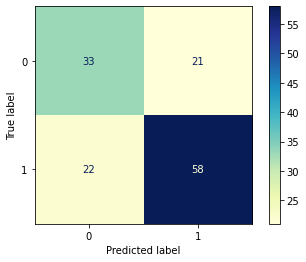

In [ ]:
plot_confusion_matrix(svc, X_test1, y_test1,cmap="YlGnBu"); 


In [ ]:
# Printing the classification report
print(classification_report(y_test1, y_pred_svc_t1))

              precision    recall  f1-score   support

           0       0.60      0.61      0.61        54
           1       0.73      0.72      0.73        80

    accuracy                           0.68       134
   macro avg       0.67      0.67      0.67       134
weighted avg       0.68      0.68      0.68       134



### 2. SARCO

In [ ]:
svc.fit(X_train2, y_train2)

SVC(class_weight='balanced', kernel='linear', random_state=42)

In [ ]:
# training set
y_pred_svc_tr2 = svc.predict(X_train2)
accuracy_svc_tr2 = accuracy_score(y_train2, y_pred_svc_tr2)
print("Support Vector Classification Model Score (Training Set): %.2f%%" % (accuracy_svc_tr2 * 100.0)) 

# testing set
y_pred_svc_t2 = svc.predict(X_test2)
predictions_svc2 = [round(value) for value in y_pred_svc_t2]
# evaluate predictions
accuracy_svc_t2 = accuracy_score(y_test2, predictions_svc2)
print("Support Vector Classification Model Score (Testing Set): %.2f%%" % (accuracy_svc_t2 * 100.0)) 

Support Vector Classification Model Score (Training Set): 70.51%
Support Vector Classification Model Score (Testing Set): 71.43%


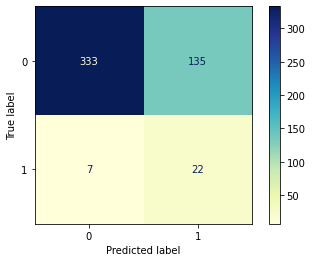

In [ ]:
plot_confusion_matrix(svc, X_test2, y_test2,cmap="YlGnBu");

In [ ]:
# Printing the classification report
print(classification_report(y_test2, y_pred_svc_t2))

              precision    recall  f1-score   support

           0       0.98      0.71      0.82       468
           1       0.14      0.76      0.24        29

    accuracy                           0.71       497
   macro avg       0.56      0.74      0.53       497
weighted avg       0.93      0.71      0.79       497



### 3. Rabigh

In [ ]:
svc.fit(X_train3, y_train3)

SVC(class_weight='balanced', kernel='linear', random_state=42)

In [ ]:
# training set
y_pred_svc_tr3 = svc.predict(X_train3)
accuracy_svc_tr3 = accuracy_score(y_train3, y_pred_svc_tr3)
print("Support Vector Classification Model Score (Training Set): %.2f%%" % (accuracy_svc_tr3 * 100.0)) 

# testing set
y_pred_svc_t3 = svc.predict(X_test3)
predictions_svc3 = [round(value) for value in y_pred_svc_t3]
# evaluate predictions
accuracy_svc_t3 = accuracy_score(y_test3, predictions_svc3)
print("Support Vector Classification Model Score (Testing Set): %.2f%%" % (accuracy_svc_t3 * 100.0)) 

Support Vector Classification Model Score (Training Set): 59.14%
Support Vector Classification Model Score (Testing Set): 56.74%


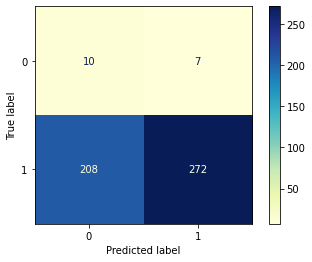

In [ ]:
plot_confusion_matrix(svc, X_test3, y_test3,cmap="YlGnBu")

In [ ]:
# Printing the classification report
print(classification_report(y_test3, y_pred_svc_t3))

              precision    recall  f1-score   support

           0       0.05      0.59      0.09        17
           1       0.97      0.57      0.72       480

    accuracy                           0.57       497
   macro avg       0.51      0.58      0.40       497
weighted avg       0.94      0.57      0.70       497



### 4. Bahri 

In [ ]:
svc.fit(X_train4, y_train4)

SVC(class_weight='balanced', kernel='linear', random_state=42)

In [ ]:
# training set
y_pred_svc_tr4 = svc.predict(X_train4)
accuracy_svc_tr4 = accuracy_score(y_train4, y_pred_svc_tr4)
print("Support Vector Classification Model Score (Training Set): %.2f%%" % (accuracy_svc_tr4 * 100.0)) 

# testing set
y_pred_svc_t4 = svc.predict(X_test4)
predictions_svc4 = [round(value) for value in y_pred_svc_t4]
# evaluate predictions
accuracy_svc_t4 = accuracy_score(y_test4, predictions_svc4)
print("Support Vector Classification Model Score (Testing Set): %.2f%%" % (accuracy_svc_t4 * 100.0)) 

Support Vector Classification Model Score (Training Set): 65.62%
Support Vector Classification Model Score (Testing Set): 62.37%


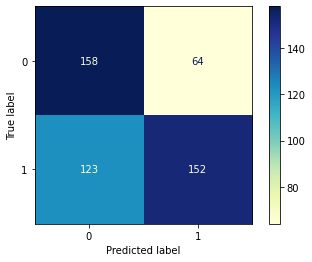

In [ ]:
plot_confusion_matrix(svc, X_test4, y_test4,cmap="YlGnBu")

In [ ]:
# Printing the classification report
print(classification_report(y_test4, y_pred_svc_t4))

              precision    recall  f1-score   support

           0       0.56      0.71      0.63       222
           1       0.70      0.55      0.62       275

    accuracy                           0.62       497
   macro avg       0.63      0.63      0.62       497
weighted avg       0.64      0.62      0.62       497



### 5. Aldrees

In [ ]:
svc.fit(X_train5, y_train5)

SVC(class_weight='balanced', kernel='linear', random_state=42)

In [ ]:
# training set
y_pred_svc_tr5 = svc.predict(X_train5)
accuracy_svc_tr5 = accuracy_score(y_train5, y_pred_svc_tr5)
print("Support Vector Classification Model Score (Training Set): %.2f%%" % (accuracy_svc_tr5 * 100.0)) 

# testing set
y_pred_svc_t5 = svc.predict(X_test5)
predictions_svc5 = [round(value) for value in y_pred_svc_t5]
# evaluate predictions
accuracy_svc_t5 = accuracy_score(y_test5, predictions_svc5)
print("Support Vector Classification Model Score (Testing Set): %.2f%%" % (accuracy_svc_t5 * 100.0)) 

Support Vector Classification Model Score (Training Set): 64.94%
Support Vector Classification Model Score (Testing Set): 66.00%


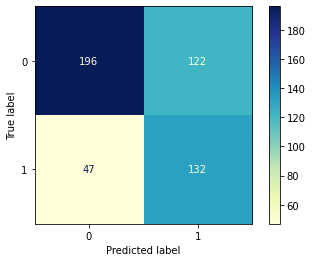

In [ ]:
plot_confusion_matrix(svc, X_test5, y_test5,cmap="YlGnBu");

In [ ]:
# Printing the classification report
print(classification_report(y_test5, y_pred_svc_t5))

              precision    recall  f1-score   support

           0       0.81      0.62      0.70       318
           1       0.52      0.74      0.61       179

    accuracy                           0.66       497
   macro avg       0.66      0.68      0.65       497
weighted avg       0.70      0.66      0.67       497



### Support Vector Classification Overview

{'Aramco': 67.91044776119402, 'SARCO': 71.42857142857143, 'Rabigh': 56.74044265593562, 'Bahri': 62.37424547283702, 'Aldrees': 65.99597585513078}


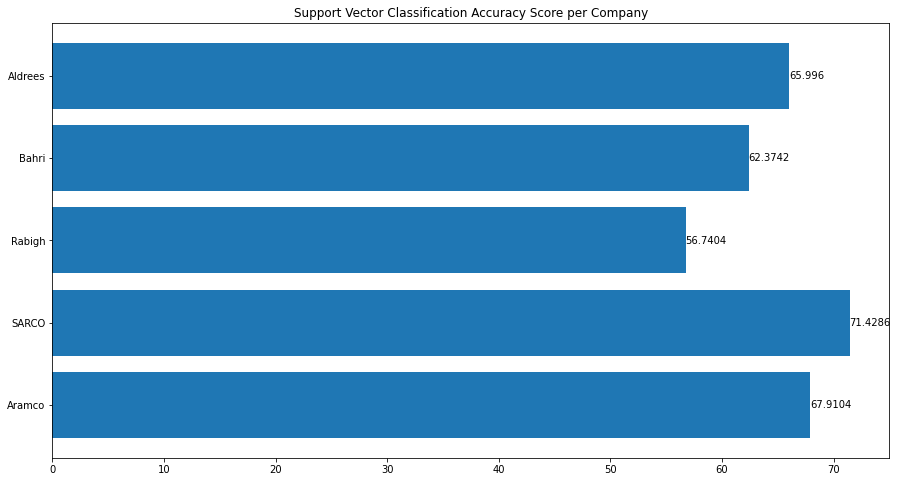

In [ ]:

# Accuracy Score for each company.
svc_accuracy = {'Aramco': accuracy_svc_t1*100, 'SARCO': accuracy_svc_t2*100, 'Rabigh': accuracy_svc_t3*100, 'Bahri':accuracy_svc_t4*100, 'Aldrees': accuracy_svc_t5*100}
print(svc_accuracy)
svc_names = list(svc_accuracy.keys())
svc_values = list(svc_accuracy.values())
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Support Vector Classification Accuracy Score per Company')
svc_bars = ax.barh(svc_names, svc_values)
ax.bar_label(svc_bars)
plt.show()


### Support Vector Classification Model using RandomSearch CV Classification

In [ ]:

auc = make_scorer(roc_auc_score)
rand_list = {"C": stats.uniform(2, 10),
             "gamma": stats.uniform(0.1, 1)}
svc_random_search = RandomizedSearchCV(svc, param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 3, random_state = 2017, scoring = auc) 

In [ ]:
# split data
X_train1, X_test1, y_train1, y_test1 = split_data(df_Aramco.drop('SMA_30', axis=1), 'Target')

#scaling the data
X_train1, X_test1 = scale_data(X_train1, X_test1)

# split data
X_train2, X_test2, y_train2, y_test2 = split_data(df_SARCO.drop('SMA_30', axis=1), 'Target')
#scaling the data
X_train2, X_test2 = scale_data(X_train2, X_test2)

# split data
X_train3, X_test3, y_train3, y_test3 = split_data(df_Rabigh.drop('SMA_30', axis=1), 'Target')
#scaling the data
X_train3, X_test3 = scale_data(X_train3, X_test3)


X_train4, X_test4, y_train4, y_test4 = split_data(df_Bahri.drop('SMA_30', axis=1), 'Target')
#scaling the data
X_train4, X_test4 = scale_data(X_train4, X_test4)

X_train5, X_test5, y_train5, y_test5 = split_data(df_Aldrees.drop('SMA_30', axis=1), 'Target')
#scaling the data
X_train5, X_test5 = scale_data(X_train5, X_test5)

### 1. Aramco

In [ ]:
# Fit the random search model
svc_random_search.fit(X_train1, y_train1)

RandomizedSearchCV(cv=3,
                   estimator=SVC(class_weight='balanced', kernel='linear',
                                 random_state=42),
                   n_iter=20, n_jobs=4,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D6B24E1F40>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D6B2566340>},
                   random_state=2017, scoring=make_scorer(roc_auc_score))

In [ ]:
# training set
y_pred_svc_tr11 = svc_random_search.predict(X_train1)
accuracy_svc_tr11 = accuracy_score(y_train1, y_pred_svc_tr11)
print("Support Vector Classification Model Score (Training Set): %.2f%%" % (accuracy_svc_tr11 * 100.0)) 

# testing set
y_pred_svc_t11 = svc_random_search.predict(X_test1)
predictions_svc11 = [round(value) for value in y_pred_svc_t11]

# evaluate predictions
accuracy_svc_t11 = accuracy_score(y_test1, predictions_svc11)
print("Support Vector Classification Model Score (Testing Set): %.2f%%" % (accuracy_svc_t11 * 100.0)) 

Support Vector Classification Model Score (Training Set): 64.37%
Support Vector Classification Model Score (Testing Set): 64.93%


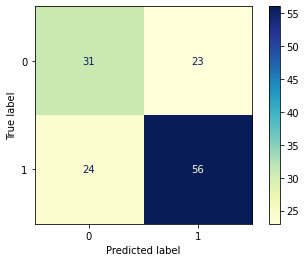

In [ ]:
plot_confusion_matrix(svc_random_search, X_test1, y_test1,cmap="YlGnBu");

In [ ]:
# Printing the classification report
print(classification_report(y_test1, y_pred_svc_t11))

              precision    recall  f1-score   support

           0       0.56      0.57      0.57        54
           1       0.71      0.70      0.70        80

    accuracy                           0.65       134
   macro avg       0.64      0.64      0.64       134
weighted avg       0.65      0.65      0.65       134



### 2. SARCO

In [ ]:
svc_random_search.fit(X_train2, y_train2)

RandomizedSearchCV(cv=3,
                   estimator=SVC(class_weight='balanced', kernel='linear',
                                 random_state=42),
                   n_iter=20, n_jobs=4,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D6B24E1F40>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D6B2566340>},
                   random_state=2017, scoring=make_scorer(roc_auc_score))

In [ ]:
# training set
y_pred_svc_tr22 = svc_random_search.predict(X_train2)
accuracy_svc_tr22 = accuracy_score(y_train2, y_pred_svc_tr22)
print("Support Vector Classification Model Score (Training Set): %.2f%%" % (accuracy_svc_tr22 * 100.0)) 

# testing set
y_pred_svc_t22 = svc_random_search.predict(X_test2)
predictions_svc22 = [round(value) for value in y_pred_svc_t22]

# evaluate predictions
accuracy_svc_t22 = accuracy_score(y_test2, predictions_svc22)
print("Support Vector Classification Model Score (Testing Set): %.2f%%" % (accuracy_svc_t22 * 100.0)) 

Support Vector Classification Model Score (Training Set): 70.56%
Support Vector Classification Model Score (Testing Set): 71.83%


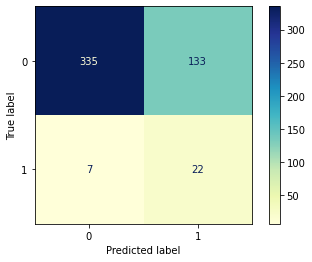

In [ ]:
plot_confusion_matrix(svc_random_search, X_test2, y_test2,cmap="YlGnBu");

In [ ]:
# Printing the classification report
print(classification_report(y_test2, y_pred_svc_t22))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83       468
           1       0.14      0.76      0.24        29

    accuracy                           0.72       497
   macro avg       0.56      0.74      0.53       497
weighted avg       0.93      0.72      0.79       497



### 3. Rabigh

In [ ]:
svc_random_search.fit(X_train3, y_train3)

RandomizedSearchCV(cv=3,
                   estimator=SVC(class_weight='balanced', kernel='linear',
                                 random_state=42),
                   n_iter=20, n_jobs=4,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D6B24E1F40>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D6B2566340>},
                   random_state=2017, scoring=make_scorer(roc_auc_score))

In [ ]:
# training set
y_pred_svc_tr33 = svc_random_search.predict(X_train3)
accuracy_svc_tr33 = accuracy_score(y_train3, y_pred_svc_tr33)
print("Support Vector Classification Model Score (Training Set): %.2f%%" % (accuracy_svc_tr33 * 100.0)) 

# testing set
y_pred_svc_t33 = svc_random_search.predict(X_test3)
predictions_svc33 = [round(value) for value in y_pred_svc_t33]

# evaluate predictions
accuracy_svc_t33 = accuracy_score(y_test3, predictions_svc33)
print("Support Vector Classification Model Score (Testing Set): %.2f%%" % (accuracy_svc_t33 * 100.0)) 

Support Vector Classification Model Score (Training Set): 58.39%
Support Vector Classification Model Score (Testing Set): 56.14%


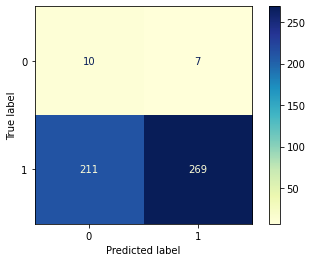

In [ ]:
plot_confusion_matrix(svc_random_search, X_test3, y_test3,cmap="YlGnBu");

In [ ]:
# Printing the classification report
print(classification_report(y_test3, y_pred_svc_t33))

              precision    recall  f1-score   support

           0       0.05      0.59      0.08        17
           1       0.97      0.56      0.71       480

    accuracy                           0.56       497
   macro avg       0.51      0.57      0.40       497
weighted avg       0.94      0.56      0.69       497



### 4. Bahri 

In [ ]:
svc_random_search.fit(X_train4, y_train4)

RandomizedSearchCV(cv=3,
                   estimator=SVC(class_weight='balanced', kernel='linear',
                                 random_state=42),
                   n_iter=20, n_jobs=4,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D6B24E1F40>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D6B2566340>},
                   random_state=2017, scoring=make_scorer(roc_auc_score))

In [ ]:
# training set
y_pred_svc_tr44 = svc_random_search.predict(X_train4)
accuracy_svc_tr44 = accuracy_score(y_train4, y_pred_svc_tr44)
print("Support Vector Classification Model Score (Training Set): %.2f%%" % (accuracy_svc_tr44 * 100.0)) 

# testing set
y_pred_svc_t44 = svc_random_search.predict(X_test4)
predictions_svc44 = [round(value) for value in y_pred_svc_t44]

# evaluate predictions
accuracy_svc_t44 = accuracy_score(y_test4, predictions_svc44)
print("Support Vector Classification Model Score (Testing Set): %.2f%%" % (accuracy_svc_t44 * 100.0)) 

Support Vector Classification Model Score (Training Set): 65.78%
Support Vector Classification Model Score (Testing Set): 62.37%


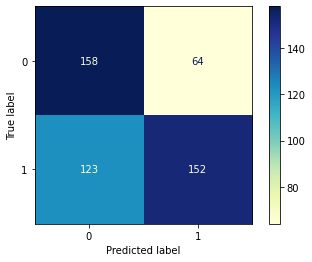

In [ ]:
plot_confusion_matrix(svc_random_search, X_test4, y_test4,cmap="YlGnBu");

In [ ]:
# Printing the classification report
print(classification_report(y_test4, y_pred_svc_t44))

              precision    recall  f1-score   support

           0       0.56      0.71      0.63       222
           1       0.70      0.55      0.62       275

    accuracy                           0.62       497
   macro avg       0.63      0.63      0.62       497
weighted avg       0.64      0.62      0.62       497



### 5. Aldrees

In [ ]:
svc_random_search.fit(X_train5, y_train5)

RandomizedSearchCV(cv=3,
                   estimator=SVC(class_weight='balanced', kernel='linear',
                                 random_state=42),
                   n_iter=20, n_jobs=4,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D6B24E1F40>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D6B2566340>},
                   random_state=2017, scoring=make_scorer(roc_auc_score))

In [ ]:
# training set
y_pred_svc_tr55 = svc_random_search.predict(X_train5)
accuracy_svc_tr55 = accuracy_score(y_train5, y_pred_svc_tr55)
print("Support Vector Classification Model Score (Training Set): %.2f%%" % (accuracy_svc_tr55 * 100.0)) 

# testing set
y_pred_svc_t55 = svc_random_search.predict(X_test5)
predictions_svc55 = [round(value) for value in y_pred_svc_t55]

# evaluate predictions
accuracy_svc_t55 = accuracy_score(y_test5, predictions_svc55)
print("Support Vector Classification Model Score (Testing Set): %.2f%%" % (accuracy_svc_t55 * 100.0)) 

Support Vector Classification Model Score (Training Set): 64.63%
Support Vector Classification Model Score (Testing Set): 66.80%


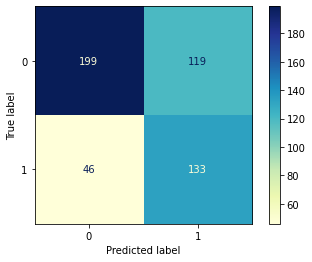

In [ ]:
plot_confusion_matrix(svc_random_search, X_test5, y_test5,cmap="YlGnBu")

In [ ]:
# Printing the classification report
print(classification_report(y_test5, y_pred_svc_t55))

              precision    recall  f1-score   support

           0       0.81      0.63      0.71       318
           1       0.53      0.74      0.62       179

    accuracy                           0.67       497
   macro avg       0.67      0.68      0.66       497
weighted avg       0.71      0.67      0.67       497



#### Support Vector Classification  Model using RandomSearch CV Classification Overview

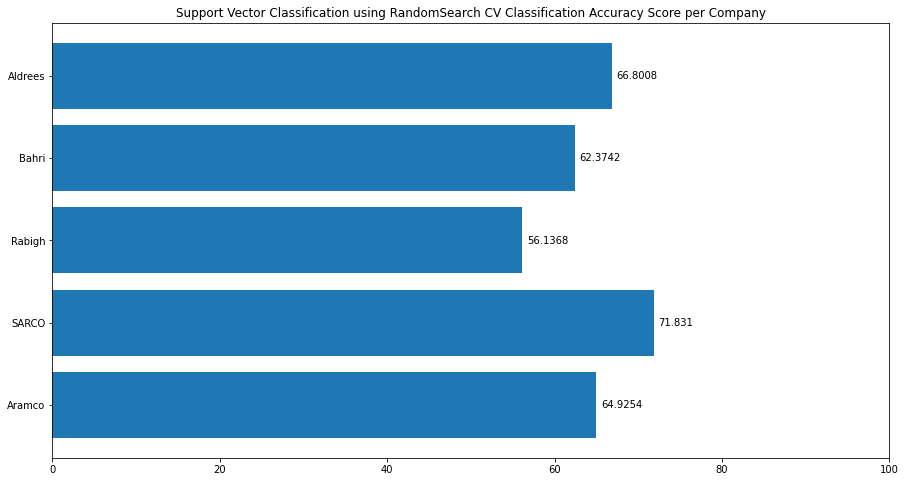

In [ ]:

# Accuracy Score for each company.
svc_accuracy2 = {'Aramco': accuracy_svc_t11*100, 'SARCO': accuracy_svc_t22*100, 'Rabigh': accuracy_svc_t33*100, 'Bahri':accuracy_svc_t44*100, 'Aldrees': accuracy_svc_t55*100}
svc_names2 = list(svc_accuracy2.keys())
svc_values2 = list(svc_accuracy2.values())

fig, ax = plt.subplots(figsize=(15,8))
plt.title('Support Vector Classification using RandomSearch CV Classification Accuracy Score per Company')
svc_bars2 = ax.barh(svc_names2, svc_values2)
ax.bar_label(svc_bars2, padding=5)
plt.xlim([0,100])

plt.show()


#### Support Vector Classification Model using GridSearch CV Classification

In [ ]:

  
# defining parameter range
param_grid = {'C': [0.1,1, 10, 100],
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'sigmoid']}
 
SVC_grid = GridSearchCV(SVC(class_weight="balanced"), param_grid, refit = True, verbose = 3)

### 1. Aramco

In [ ]:
SVC_grid.fit(X_train1, y_train1)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.537 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.570 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.551 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.570 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.551 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.611 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.542 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.430 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.551 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.505 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.630 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

[CV 4/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.495 total time=   0.0s
[CV 5/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.617 total time=   0.0s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.694 total time=   0.0s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.636 total time=   0.0s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.636 total time=   0.0s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.551 total time=   0.0s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.617 total time=   0.0s
[CV 1/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.685 total time=   0.0s
[CV 2/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.636 total time=   0.0s
[CV 3/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.617 total time=   0.0s
[CV 4/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.570 total time=   0.0s
[CV 5/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.579 total time=   0.0s
[CV 1/5] END ........C=100, 

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=3)

In [ ]:
# training set
y_pred_svc_tr111 = SVC_grid.predict(X_train1)
accuracy_svc_tr111 = accuracy_score(y_train1, y_pred_svc_tr111)
print("Support Vector Classification Model Score (Training Set): %.2f%%" % (accuracy_svc_tr111 * 100.0)) 

# testing set
y_pred_svc_t111 = SVC_grid.predict(X_test1)
predictions_svc111 = [round(value) for value in y_pred_svc_t111]

# evaluate predictions
accuracy_svc_t111 = accuracy_score(y_test1, predictions_svc111)
print("Support Vector Classification Model Score (Testing Set): %.2f%%" % (accuracy_svc_t111 * 100.0)) 

Support Vector Classification Model Score (Training Set): 63.81%
Support Vector Classification Model Score (Testing Set): 63.43%


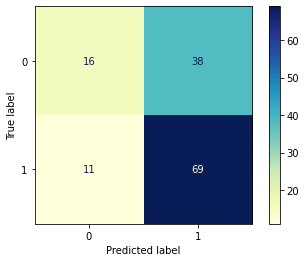

In [ ]:
plot_confusion_matrix(SVC_grid, X_test1, y_test1,cmap="YlGnBu");

In [ ]:
# Printing the classification report
print(classification_report(y_test1, y_pred_svc_t111))

              precision    recall  f1-score   support

           0       0.59      0.30      0.40        54
           1       0.64      0.86      0.74        80

    accuracy                           0.63       134
   macro avg       0.62      0.58      0.57       134
weighted avg       0.62      0.63      0.60       134



### 2. SARCO

In [ ]:
SVC_grid.fit(X_train2, y_train2)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.869 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.872 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.879 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.851 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.874 total time=   0.1s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.577 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.569 total time=   0.1s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.577 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.615 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.682 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.798 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.743 total time=   0.0s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.771 total time=   0.0s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.728 total time=   0.1s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.730 total time=   0.0s
[CV 1/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.743 total time=   0.0s
[CV 2/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.723 total time=   0.0s
[CV 3/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.738 total time=   0.0s
[CV 4/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.688 total time=   0.0s
[CV 5/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.692 total time=   0.0s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.748 total time=   0.0s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.678 total time=   0.0s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.738 total time=   0.0s
[CV 4/5] END .....C=10, gamm

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=3)

In [ ]:
# training set
y_pred_svc_tr222 = SVC_grid.predict(X_train2)
accuracy_svc_tr222 = accuracy_score(y_train2, y_pred_svc_tr222)
print("Support Vector Classification Model Score (Training Set): %.2f%%" % (accuracy_svc_tr222 * 100.0)) 

# testing set
y_pred_svc_t222 = SVC_grid.predict(X_test2)
predictions_svc222 = [round(value) for value in y_pred_svc_t222]

# evaluate predictions
accuracy_svc_t222 = accuracy_score(y_test2, predictions_svc222)
print("Support Vector Classification Model Score (Testing Set): %.2f%%" % (accuracy_svc_t222 * 100.0)) 

Support Vector Classification Model Score (Training Set): 99.55%
Support Vector Classification Model Score (Testing Set): 90.34%


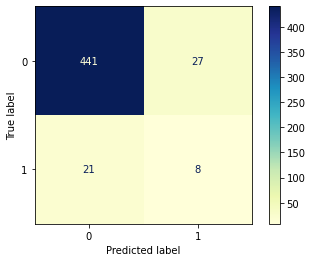

In [ ]:
plot_confusion_matrix(SVC_grid, X_test2, y_test2,cmap="YlGnBu");

In [ ]:
# Printing the classification report
print(classification_report(y_test2, y_pred_svc_t222))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       468
           1       0.23      0.28      0.25        29

    accuracy                           0.90       497
   macro avg       0.59      0.61      0.60       497
weighted avg       0.91      0.90      0.91       497



### 3. Rabigh

In [ ]:
SVC_grid.fit(X_train3, y_train3)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.889 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.864 total time=   0.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.904 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.854 total time=   0.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.854 total time=   0.2s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.531 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.479 total time=   0.1s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.481 total time=   0.1s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.448 total time=   0.2s
[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.491 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.678 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.592 total time=   0.1s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.630 total time=   0.1s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.645 total time=   0.1s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.605 total time=   0.1s
[CV 1/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.481 total time=   0.1s
[CV 2/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.559 total time=   0.1s
[CV 3/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.549 total time=   0.1s
[CV 4/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.496 total time=   0.1s
[CV 5/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.463 total time=   0.1s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.610 total time=   0.1s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.509 total time=   0.1s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.564 total time=   0.1s
[CV 4/5] END .....C=10, gamm

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=3)

In [ ]:
# training set
y_pred_svc_tr333 = SVC_grid.predict(X_train3)
accuracy_svc_tr333 = accuracy_score(y_train3, y_pred_svc_tr333)
print("Support Vector Classification Model Score (Training Set): %.2f%%" % (accuracy_svc_tr333 * 100.0)) 

# testing set
y_pred_svc_t333 = SVC_grid.predict(X_test3)
predictions_svc333 = [round(value) for value in y_pred_svc_t333]

# evaluate predictions
accuracy_svc_t333 = accuracy_score(y_test3, predictions_svc333)
print("Support Vector Classification Model Score (Testing Set): %.2f%%" % (accuracy_svc_t333 * 100.0)) 

Support Vector Classification Model Score (Training Set): 100.00%
Support Vector Classification Model Score (Testing Set): 93.36%


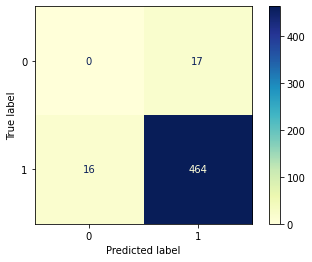

In [ ]:
plot_confusion_matrix(SVC_grid, X_test3, y_test3,cmap="YlGnBu");

In [ ]:
# Printing the classification report
print(classification_report(y_test3, y_pred_svc_t333))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.96      0.97      0.97       480

    accuracy                           0.93       497
   macro avg       0.48      0.48      0.48       497
weighted avg       0.93      0.93      0.93       497



### 4. Bahri 

In [ ]:
SVC_grid.fit(X_train4, y_train4)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.645 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.668 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.675 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.632 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.657 total time=   0.1s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.501 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.504 total time=   0.1s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.526 total time=   0.1s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.514 total time=   0.1s
[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.523 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.670 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.710 total time=   0.1s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.693 total time=   0.1s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.632 total time=   0.1s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.684 total time=   0.2s
[CV 1/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.673 total time=   0.1s
[CV 2/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.650 total time=   0.2s
[CV 3/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.620 total time=   0.1s
[CV 4/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.587 total time=   0.1s
[CV 5/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.639 total time=   0.2s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.647 total time=   0.1s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.685 total time=   0.1s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.650 total time=   0.1s
[CV 4/5] END .....C=10, gamm

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=3)

In [ ]:
# training set
y_pred_svc_tr444 = SVC_grid.predict(X_train4)
accuracy_svc_tr444 = accuracy_score(y_train4, y_pred_svc_tr444)
print("Support Vector Classification Model Score (Training Set): %.2f%%" % (accuracy_svc_tr44 * 100.0)) 

# testing set
y_pred_svc_t444 = SVC_grid.predict(X_test4)
predictions_svc444 = [round(value) for value in y_pred_svc_t444]

# evaluate predictions
accuracy_svc_t444 = accuracy_score(y_test4, predictions_svc444)
print("Support Vector Classification Model Score (Testing Set): %.2f%%" % (accuracy_svc_t444 * 100.0)) 

Support Vector Classification Model Score (Training Set): 65.78%
Support Vector Classification Model Score (Testing Set): 66.00%


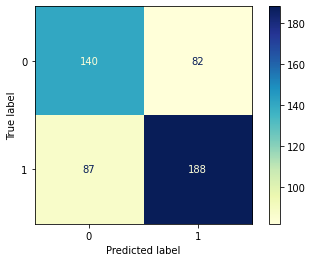

In [ ]:
plot_confusion_matrix(SVC_grid, X_test4, y_test4,cmap="YlGnBu");

In [ ]:
# Printing the classification report
print(classification_report(y_test4, y_pred_svc_t444))

              precision    recall  f1-score   support

           0       0.62      0.63      0.62       222
           1       0.70      0.68      0.69       275

    accuracy                           0.66       497
   macro avg       0.66      0.66      0.66       497
weighted avg       0.66      0.66      0.66       497



### 5. Aldrees

In [ ]:
SVC_grid.fit(X_train5, y_train5)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.683 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.690 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.708 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.728 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.678 total time=   0.1s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.516 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.491 total time=   0.1s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.489 total time=   0.1s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.491 total time=   0.1s
[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.451 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.673 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.675 total time=   0.1s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.668 total time=   0.2s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.668 total time=   0.1s
[CV 1/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.642 total time=   0.0s
[CV 2/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.655 total time=   0.1s
[CV 3/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.652 total time=   0.2s
[CV 4/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.627 total time=   0.0s
[CV 5/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.635 total time=   0.0s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.645 total time=   0.1s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.647 total time=   0.1s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.627 total time=   0.1s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.652 total time=   0.2s
[CV 5/5] END .....C=10, gamm

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=3)

In [ ]:
# training set
y_pred_svc_tr555 = SVC_grid.predict(X_train5)
accuracy_svc_tr555 = accuracy_score(y_train5, y_pred_svc_tr555)
print("Support Vector Classification Model Score (Training Set): %.2f%%" % (accuracy_svc_tr555 * 100.0)) 

# testing set
y_pred_svc_t555 = SVC_grid.predict(X_test5)
predictions_svc555 = [round(value) for value in y_pred_svc_t555]

# evaluate predictions
accuracy_svc_t555 = accuracy_score(y_test5, predictions_svc555)
print("Support Vector Classification Model Score (Testing Set): %.2f%%" % (accuracy_svc_t555 * 100.0)) 

Support Vector Classification Model Score (Training Set): 71.89%
Support Vector Classification Model Score (Testing Set): 74.65%


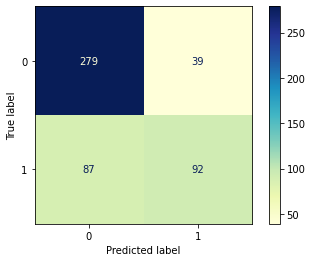

In [ ]:
plot_confusion_matrix(SVC_grid, X_test5, y_test5,cmap="YlGnBu");

In [ ]:
# Printing the classification report
print(classification_report(y_test5, y_pred_svc_t555))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       318
           1       0.70      0.51      0.59       179

    accuracy                           0.75       497
   macro avg       0.73      0.70      0.70       497
weighted avg       0.74      0.75      0.74       497



#### Support Vector Classification Model using GridSearch CV Classification Overview

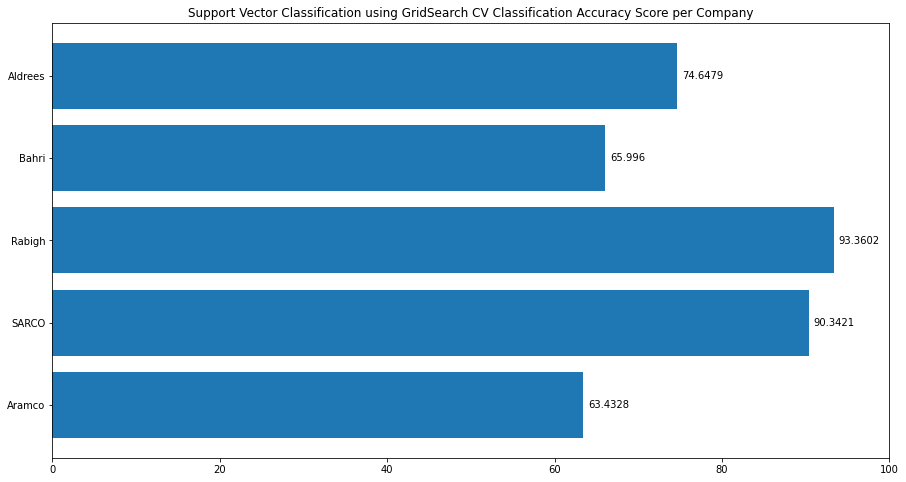

In [ ]:
# Accuracy Score for each company.
SVC_accuracy3 = {'Aramco': accuracy_svc_t111*100, 'SARCO': accuracy_svc_t222*100, 'Rabigh': accuracy_svc_t333*100,\
                'Bahri':accuracy_svc_t444*100, 'Aldrees': accuracy_svc_t555*100}
SVC_names3 = list(SVC_accuracy3.keys())
SVC_values3 = list(SVC_accuracy3.values())

fig, ax = plt.subplots(figsize=(15,8))
plt.title('Support Vector Classification using GridSearch CV Classification Accuracy Score per Company')
SVC_bars3 = ax.barh(SVC_names3, SVC_values3)
ax.bar_label(SVC_bars3, padding=5)
plt.xlim([0,100])

plt.show()

### Support Vector Classification Models Accuracy


In [ ]:
df_SVC = pd.DataFrame({
    'Company': svc_names,
    'SVC': svc_values,
    'SVC_GridSearch': SVC_values3,
    'SVC_RanomizedSearch':svc_values2 
})
df_SVC

,Company,SVC,SVC_GridSearch,SVC_RanomizedSearch
0,Aramco,67.910448,63.432836,64.925373
1,SARCO,71.428571,90.342052,71.830986
2,Rabigh,56.740443,93.360161,56.136821
3,Bahri,62.374245,65.995976,62.374245
4,Aldrees,65.995976,74.647887,66.800805


In [ ]:
df_SVC.to_csv('accuracy_SVC.csv',index = False)

### Calculate log loss (error) for all the Support Vector Classification Models

In [ ]:
# Calculate log loss (error) for all the Support Vector Classification  Models


svc_log_loss = {
'Aramco': log_loss(y_true=y_test1, y_pred=y_pred_svc_t1, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'SARCO': log_loss(y_true=y_test2, y_pred=y_pred_svc_t2, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'Rabigh': log_loss(y_true=y_test3, y_pred=y_pred_svc_t3, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'Bahri': log_loss(y_true=y_test4, y_pred=y_pred_svc_t4, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'Aldrees': log_loss(y_true=y_test5, y_pred=y_pred_svc_t5, eps=1e-15, normalize=True, sample_weight=None, labels=None)    
}

svc_log_loss_values = list(svc_log_loss.values())

svc_gridsearch_log_loss = {
'Aramco': log_loss(y_true=y_test1, y_pred=y_pred_svc_t111, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'SARCO': log_loss(y_true=y_test2, y_pred=y_pred_svc_t222, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'Rabigh': log_loss(y_true=y_test3, y_pred=y_pred_svc_t333, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'Bahri': log_loss(y_true=y_test4, y_pred=y_pred_svc_t444, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'Aldrees': log_loss(y_true=y_test5, y_pred=y_pred_svc_t555, eps=1e-15, normalize=True, sample_weight=None, labels=None)    
}

svc_gridsearch_log_loss_values = list(svc_gridsearch_log_loss.values())

svc_randomsearch_log_loss = {
'Aramco': log_loss(y_true=y_test1, y_pred=y_pred_svc_t11, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'SARCO': log_loss(y_true=y_test2, y_pred=y_pred_svc_t22, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'Rabigh': log_loss(y_true=y_test3, y_pred=y_pred_svc_t33, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'Bahri': log_loss(y_true=y_test4, y_pred=y_pred_svc_t44, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'Aldrees': log_loss(y_true=y_test5, y_pred=y_pred_svc_t55, eps=1e-15, normalize=True, sample_weight=None, labels=None)    
}

svc_randomsearch_log_loss_values = list(svc_randomsearch_log_loss.values())

In [ ]:
df_svc_log_loss = pd.DataFrame({
    'Company': svc_names,
    'SVC': svc_log_loss_values,
    'SVC_GridSearch': svc_gridsearch_log_loss_values,
    'SVC_RanomizedSearch': svc_randomsearch_log_loss_values
})
df_svc_log_loss

,Company,SVC,SVC_GridSearch,SVC_RanomizedSearch
0,Aramco,11.083464,12.630078,12.114484
1,SARCO,9.868439,3.335780,9.729447
2,Rabigh,14.941333,2.293347,15.149817
3,Bahri,12.995578,11.744706,12.995578
4,Aldrees,11.744770,8.756372,11.466787


In [ ]:
df_svc_log_loss.to_csv('error_SVC.csv',index = False)

### Calculate f1 score for all the Support Vector Models

In [ ]:


svc_f1 = {
'Aramco': f1_score(y_true=y_test1, y_pred=y_pred_svc_t1, average='macro'),
'SARCO': f1_score(y_true=y_test2, y_pred=y_pred_svc_t2, average='macro'),
'Rabigh': f1_score(y_true=y_test3, y_pred=y_pred_svc_t3, average='macro'),
'Bahri': f1_score(y_true=y_test4, y_pred=y_pred_svc_t4, average='macro'),
'Aldrees': f1_score(y_true=y_test5, y_pred=y_pred_svc_t5, average='macro')    
}

svc_f1_values = list(svc_f1.values())

svc_gridsearch_f1 = {
'Aramco': f1_score(y_true=y_test1, y_pred=y_pred_svc_t111, average='macro'),
'SARCO': f1_score(y_true=y_test2, y_pred=y_pred_svc_t222, average='macro'),
'Rabigh': f1_score(y_true=y_test3, y_pred=y_pred_svc_t333, average='macro'),
'Bahri': f1_score(y_true=y_test4, y_pred=y_pred_svc_t444, average='macro'),
'Aldrees': f1_score(y_true=y_test5, y_pred=y_pred_svc_t555, average='macro')    
}

svc_gridsearch_f1_values = list(svc_gridsearch_f1.values())

svc_randomsearch_f1 = {
'Aramco': f1_score(y_true=y_test1, y_pred=y_pred_svc_t11, average='macro'),
'SARCO': f1_score(y_true=y_test2, y_pred=y_pred_svc_t22, average='macro'),
'Rabigh': f1_score(y_true=y_test3, y_pred=y_pred_svc_t33, average='macro'),
'Bahri': f1_score(y_true=y_test4, y_pred=y_pred_svc_t44, average='macro'),
'Aldrees': f1_score(y_true=y_test5, y_pred=y_pred_svc_t55, average='macro')    
}

svc_randomsearch_f1_values = list(svc_randomsearch_f1.values())

In [ ]:
df_svc_f1 = pd.DataFrame({
    'Company': svc_names,
    'SVC': svc_f1_values,
    'SVC_GridSearch': svc_gridsearch_f1_values,
    'SVC_RanomizedSearch': svc_randomsearch_f1_values
})
df_svc_f1

,Company,SVC,SVC_GridSearch,SVC_RanomizedSearch
0,Aramco,0.667532,0.566515,0.636605
1,SARCO,0.530408,0.599194,0.533145
2,Rabigh,0.400919,0.482830,0.397837
3,Bahri,0.623688,0.656758,0.623688
4,Aldrees,0.654226,0.704669,0.662048


In [ ]:
df_svc_f1.to_csv('f1_SVC.csv',index = False)

##  <a name='#LR'> **Logistic Regression Model** </a>

### 1. Aramco

              precision    recall  f1-score   support

           0       0.53      0.57      0.55        54
           1       0.70      0.66      0.68        80

    accuracy                           0.63       134
   macro avg       0.62      0.62      0.62       134
weighted avg       0.63      0.63      0.63       134

Logistic Regression Model Score (Testing Set): 62.69%


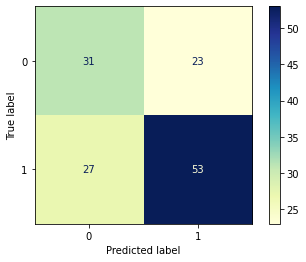

In [ ]:
# split the dataset into Training and Testing sets
X_trainlr1, X_testlr1, y_trainlr1, y_testlr1 = split_data(df_Aramco.drop('Volume', axis=1), 'Target')

#model
logre_aramco = LogisticRegression(class_weight="balanced").fit(X_trainlr1, y_trainlr1)

 
# predction:
logre_aramco_pred = logre_aramco.predict(X_testlr1)

#evalute
plot_confusion_matrix(logre_aramco, X_testlr1, y_testlr1,cmap="YlGnBu")
print(classification_report(y_testlr1,logre_aramco_pred))
accuracy_logre_t1 = accuracy_score(y_testlr1, logre_aramco_pred)
print("Logistic Regression Model Score (Testing Set): %.2f%%" % (accuracy_logre_t1 * 100.0))
 
 

### 2. SARCO

              precision    recall  f1-score   support

           0       0.98      0.73      0.84       468
           1       0.14      0.72      0.24        29

    accuracy                           0.73       497
   macro avg       0.56      0.73      0.54       497
weighted avg       0.93      0.73      0.80       497

Logistic Regression Model Score (Testing Set): 73.04%


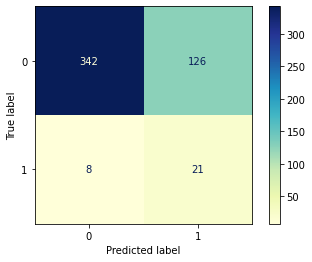

In [ ]:
# split the dataset into Training and Testing sets
X_trainlr2, X_testlr2, y_trainlr2, y_testlr2 = split_data(df_SARCO.drop('Volume', axis=1), 'Target')

#model
logre_sarco = LogisticRegression(class_weight="balanced").fit(X_trainlr2, y_trainlr2)



# predction:
logre_sarco_pred = logre_sarco.predict(X_testlr2)

#evalute
plot_confusion_matrix(logre_sarco, X_testlr2, y_testlr2,cmap="YlGnBu")
print(classification_report(y_testlr2,logre_sarco_pred))
accuracy_logre_t2 = accuracy_score(y_testlr2, logre_sarco_pred)
print("Logistic Regression Model Score (Testing Set): %.2f%%" % (accuracy_logre_t2 * 100.0))

### 3. Rabigh

              precision    recall  f1-score   support

           0       0.07      0.76      0.12        17
           1       0.99      0.61      0.76       480

    accuracy                           0.62       497
   macro avg       0.53      0.69      0.44       497
weighted avg       0.96      0.62      0.74       497

Logistic Regression Model Score (Testing Set): 61.97%


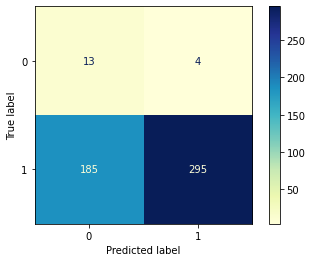

In [ ]:
# split the dataset into Training and Testing sets
X_trainlr3, X_testlr3, y_trainlr3, y_testlr3 = split_data(df_Rabigh.drop('Volume', axis=1), 'Target')

#model
logre_Rabigh=LogisticRegression(class_weight="balanced").fit(X_trainlr3, y_trainlr3)

# predction:
logre_Rabigh_pred = logre_Rabigh.predict(X_testlr3)

#evalute
plot_confusion_matrix(logre_Rabigh, X_testlr3, y_testlr3,cmap="YlGnBu")
print(classification_report(y_testlr3,logre_Rabigh_pred))
accuracy_logre_t3 = accuracy_score(y_testlr3, logre_Rabigh_pred)
print("Logistic Regression Model Score (Testing Set): %.2f%%" % (accuracy_logre_t3 * 100.0))

### 4. Bahri

              precision    recall  f1-score   support

           0       0.57      0.69      0.62       222
           1       0.70      0.58      0.63       275

    accuracy                           0.63       497
   macro avg       0.63      0.64      0.63       497
weighted avg       0.64      0.63      0.63       497

Logistic Regression Model Score (Testing Set): 62.98%


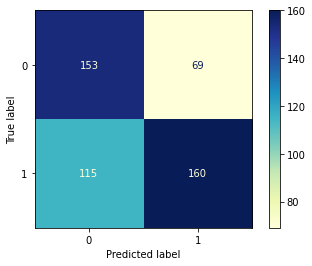

In [ ]:
# split the dataset into Training and Testing sets
X_trainlr4, X_testlr4, y_trainlr4, y_testlr4 = split_data(df_Bahri.drop('Volume', axis=1), 'Target')

#model
logre_bahri=  LogisticRegression(class_weight="balanced").fit(X_trainlr4, y_trainlr4)

# predction:
logre_bahri_pred = logre_bahri.predict(X_testlr4)

#evalute
plot_confusion_matrix(logre_bahri, X_testlr4, y_testlr4,cmap="YlGnBu")
print(classification_report(y_testlr4,logre_bahri_pred))
accuracy_logre_t4 = accuracy_score(y_testlr4, logre_bahri_pred )
print("Logistic Regression Model Score (Testing Set): %.2f%%" % (accuracy_logre_t4 * 100.0))

### 5. Aldrees

              precision    recall  f1-score   support

           0       0.80      0.66      0.72       318
           1       0.54      0.70      0.61       179

    accuracy                           0.68       497
   macro avg       0.67      0.68      0.67       497
weighted avg       0.70      0.68      0.68       497

Logistic Regression Model Score (Testing Set): 67.61%


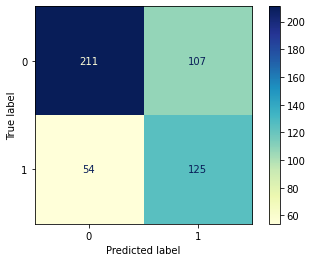

In [ ]:
# split the dataset into Training and Testing sets
X_trainlr5, X_testlr5, y_trainlr5, y_testlr5 = split_data(df_Aldrees.drop('Volume', axis=1), 'Target')

#model
logre_Aldrees= LogisticRegression(class_weight="balanced").fit(X_trainlr5, y_trainlr5)
 
# predction:
logre_Aldrees_pred = logre_Aldrees.predict(X_testlr5)

#evalute
plot_confusion_matrix(logre_Aldrees, X_testlr5, y_testlr5,cmap="YlGnBu")
print(classification_report(y_testlr5,logre_Aldrees_pred))
accuracy_logre_t5 = accuracy_score(y_testlr5, logre_Aldrees_pred)
print("Logistic Regression Model Score (Testing Set): %.2f%%" % (accuracy_logre_t5 * 100.0))

Logistic Regression Overview (Accuracy,log_loss, F1 score)

{'Aramco': 62.68656716417911, 'SARCO': 73.03822937625755, 'Rabigh': 61.97183098591549, 'Bahri': 62.97786720321932, 'Aldrees': 67.6056338028169}


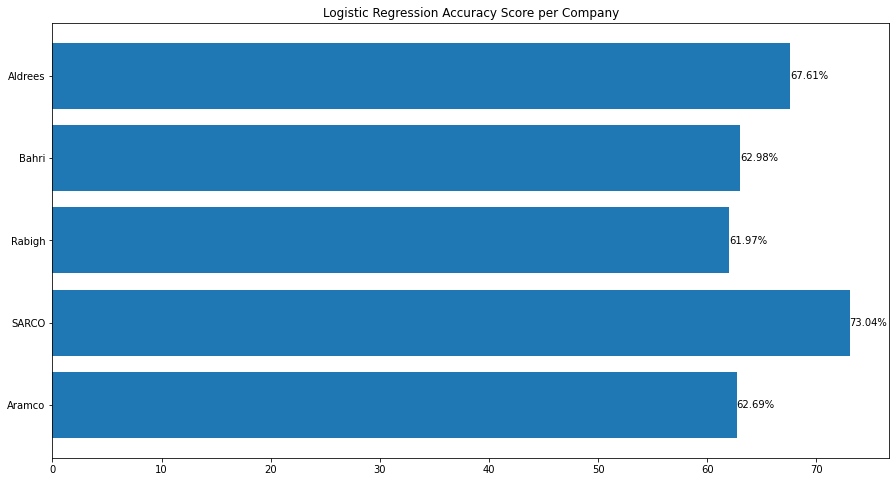

In [ ]:
# Accuracy Score for each company.
logre_accuracy = {'Aramco': accuracy_logre_t1*100, 'SARCO': accuracy_logre_t2*100, 'Rabigh': accuracy_logre_t3*100, 'Bahri':accuracy_logre_t4*100, 'Aldrees': accuracy_logre_t5*100}
print(logre_accuracy)
logre_names = list(logre_accuracy.keys())
logre_values = list(logre_accuracy.values())

#create accuracy plot for each company
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Logistic Regression Accuracy Score per Company')
bars = ax.barh(logre_names,logre_values)
ax.bar_label(bars, fmt='%.2f%%')
plt.show()

In [ ]:
#use function to create accuracy Datafarme for each company
df_logre = pd.DataFrame({
    'Company': logre_names,
    'Logistic Regression':logre_values,
     
})
#call function
df_logre
#save dataframe in csv
#df_logre.to_csv('accuracy_logre.csv',index = False)


,Company,Logistic Regression
0,Aramco,62.686567
1,SARCO,73.038229
2,Rabigh,61.971831
3,Bahri,62.977867
4,Aldrees,67.605634


In [ ]:
# Calculate log loss (error)
logre_log_loss = {
'Aramco': log_loss(y_true=y_testlr1, y_pred=logre_aramco_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'SARCO': log_loss(y_true=y_testlr2, y_pred=logre_sarco_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'Rabigh': log_loss(y_true=y_testlr3, y_pred=logre_Rabigh_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'Bahri': log_loss(y_true=y_testlr4, y_pred=logre_bahri_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None),
'Aldrees': log_loss(y_true=y_testlr5, y_pred=logre_Aldrees_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)     
}
#store value in list
logre_log_loss_values= list(logre_log_loss.values())

#use function to create loss error Datafarme for each company
df_logre_log_loss = pd.DataFrame({
    'Company': logre_names,
    'Logistic Regression': logre_log_loss_values,
  
})
#call function
df_logre_log_loss

#save dataframe in csv
df_logre_log_loss.to_csv('logre_log_loss.csv')


In [ ]:


# Calculate f1 score
logre_f1_score = {
'Aramco': f1_score(y_true=y_testlr1, y_pred=logre_aramco_pred),
'SARCO': f1_score(y_true=y_testlr2, y_pred=logre_sarco_pred),
'Rabigh': f1_score(y_true=y_testlr3, y_pred=logre_Rabigh_pred),
'Bahri': f1_score(y_true=y_testlr4, y_pred=logre_bahri_pred),
'Aldrees': f1_score(y_true=y_testlr5, y_pred=logre_Aldrees_pred,)    
}
#store value in list
logre_f1_score_values = list(logre_f1_score.values())

#use function to create f1 score Datafarme for each company
df_logre_f1_score = pd.DataFrame({
    'Company': logre_names,
    'Logistic Regression': logre_f1_score_values,
  })

#call function
df_logre_f1_score
#save dataframe in csv
df_logre_f1_score.to_csv('logre_f1_score.csv')


##   <a name='#RO'> **Time Series Classifcation using [ROCKET](https://github.com/angus924/rocket)**</a>

In [9]:
full_data_with_allFeatures = pd.read_csv('Data-Science-Campus-Capstone-Project/Data2/cleaned_data_frame.csv')

In [10]:
df_Aramco=full_data_with_allFeatures[full_data_with_allFeatures['Name']=='Saudi Aramco']
df_SARCO=full_data_with_allFeatures[full_data_with_allFeatures['Name']=='SARCO']
df_Rabigh=full_data_with_allFeatures[full_data_with_allFeatures['Name']=='Petro Rabigh']
df_Bahri=full_data_with_allFeatures[full_data_with_allFeatures['Name']=='Bahri']
df_Aldrees=full_data_with_allFeatures[full_data_with_allFeatures['Name']=='Aldrees']

In [11]:
column_names = [
 'Volume','EMA_9',
 'SMA_5',
 'SMA_10',
 'SMA_15',
 'SMA_20',
 'SMA_25',
 'SMA_30',
 'MACD',
 'RSI',
 'Stochastic',
 'Open-Close',
 'High-Low']
column_names.append('Target')

In [12]:
# here we use  Burta as intial and modfy it to get the best result
Burta_column_names = ['SMA_5', 'MACD', 'RSI']

Burta_column_names.append('Target')

### 1. **Aramco**

In [13]:
data_Aramco = df_Aramco[Burta_column_names]

In [15]:
window_length = 7 # window_length is usually selected based on prior domain knowledge or by trial and error
stride = None                # None for non-overlapping (stride = window_length) (default = 1). This depends on how often you want to predict once the model is trained
start = 0                    # use all data since the first time stamp (default = 0)
get_x = data_Aramco.columns[:-1]   # Indicates which are the columns that contain the x data.
get_y = 'Target'         # In multivariate time series, you must indicate which is/are the y columns
horizon = 0                  # 0 means y is taken from the last time stamp of the time sequence (default = 0)
seq_first = True

In [16]:
X, y = SlidingWindow(window_length, get_x=get_x, get_y=get_y)(data_Aramco)


In [ ]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

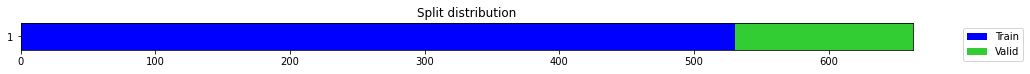

In [18]:
splits = get_splits(y, valid_size=.2, stratify=True, random_state=42, shuffle=False)


In [20]:
#3d tensor of shape (samples, vars, len),
tfms  = [None, [Categorize()]]
batch_tfms = [TSStandardize(by_sample=True)]
dls_Aramco = get_ts_dls(X, y, splits=splits, tfms=tfms, drop_last=False, shuffle_train=False, batch_tfms=batch_tfms, bs=128)

In [21]:
model_Aramco = build_ts_model(ROCKET,kss=np.array([6, 9, 11]), dls=dls) # n_kernels=10_000, kss=[7, 9, 11] set by default, but you can pass other values as kwargs

In [23]:
X_train_Aramco, y_train_Aramco = create_rocket_features(dls_Aramco.train, model_Aramco)
X_test_Aramco, y_test_Aramco = create_rocket_features(dls_Aramco.valid, model_Aramco)
X_train_Aramco.shape, X_test_Aramco.shape

((531, 20000), (132, 20000))

**Ridge Classifer**

In [99]:
ridge_Aramco = RidgeClassifierCV(alphas=np.logspace(-2, 2, 100), normalize=True,class_weight='balanced')
ridge_Aramco.fit(X_train_Aramco, y_train_Aramco)
print(f'alpha: {ridge_Aramco.alpha_:.2E}  train: {ridge_Aramco.score(X_train_Aramco, y_train_Aramco):.5f}   test: {ridge_Aramco.score(X_test_Aramco, y_test_Aramco):.5f}')

alpha: 1.00E+02  train: 0.70810   test: 0.56061


In [100]:
y_pred_Aramco = ridge_Aramco.predict(X_test_Aramco)

In [26]:
log_loss(y_test_Aramco,y_pred_Aramco)

15.17631680625118

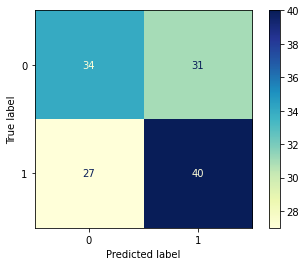

In [101]:
plot_confusion_matrix(ridge_Aramco, X_test_Aramco, y_test_Aramco,cmap="YlGnBu");

In [102]:
# Printing the classification report
print(classification_report(y_test_Aramco, y_pred_Aramco))

              precision    recall  f1-score   support

           0       0.56      0.52      0.54        65
           1       0.56      0.60      0.58        67

    accuracy                           0.56       132
   macro avg       0.56      0.56      0.56       132
weighted avg       0.56      0.56      0.56       132



### 2. SARCO

In [32]:
data_SARCO_Burta = df_SARCO[Burta_column_names]
data_SARCO = df_SARCO[column_names]


In [33]:
window_length = 7 # window_length is usually selected based on prior domain knowledge or by trial and error
stride = None                # None for non-overlapping (stride = window_length) (default = 1). This depends on how often you want to predict once the model is trained
start = 0                    # use all data since the first time stamp (default = 0)
get_x = data_SARCO_Burta.columns[:-1]   # Indicates which are the columns that contain the x data.
get_y = 'Target'         # In multivariate time series, you must indicate which is/are the y columns
horizon = 0                  # 0 means y is taken from the last time stamp of the time sequence (default = 0)
seq_first = True

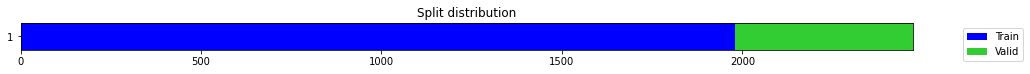

In [37]:
X, y = SlidingWindow(window_length, get_x=get_x, get_y=get_y)(data_SARCO_Burta)
splits = get_splits(y, valid_size=.2, stratify=True, random_state=42, shuffle=False)
#3d tensor of shape (samples, vars, len),
tfms  = [None, [Categorize()]]
batch_tfms = [TSStandardize(by_sample=True)]
dls_SARCO = get_ts_dls(X, y, splits=splits, tfms=tfms, drop_last=False, shuffle_train=False, batch_tfms=batch_tfms, bs=64)


In [38]:
model_SARCO = build_ts_model(ROCKET,kss=np.array([6, 9, 11]), dls=dls_SARCO) # n_kernels=10_000, kss=[7, 9, 11] set by default, but you can pass other values as kwargs

In [39]:
X_train_SARCO, y_train_SARCO = create_rocket_features(dls_SARCO.train, model_SARCO)
X_test_SARCO, y_test_SARCO = create_rocket_features(dls_SARCO.valid, model_SARCO)
X_train_SARCO.shape, X_test_SARCO.shape

((1980, 20000), (494, 20000))

**Ridge Classifer**

In [94]:
ridge_SARCO = RidgeClassifierCV(alphas=np.logspace(-2, 2, 100), normalize=True,class_weight='balanced')
ridge_SARCO.fit(X_train_SARCO, y_train_SARCO)
print(f'alpha: {ridge_SARCO.alpha_:.2E}  train: {ridge_SARCO.score(X_train_SARCO, y_train_SARCO):.5f}   test: {ridge_SARCO.score(X_test_SARCO, y_test_SARCO):.5f}')

alpha: 4.75E+01  train: 0.76414   test: 0.96964


In [95]:
y_pred_SARCO = ridge_SARCO.predict(X_test_SARCO)

In [96]:
log_loss(y_test_SARCO,y_pred_SARCO)

1.048759601428486

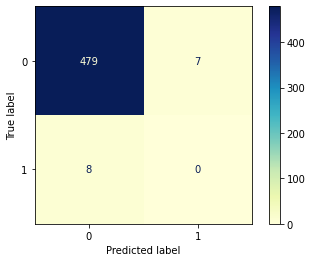

In [97]:
plot_confusion_matrix(ridge_SARCO, X_test_SARCO, y_test_SARCO,cmap="YlGnBu"); 

In [98]:
print(classification_report(y_test_SARCO, y_pred_SARCO))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       486
           1       0.00      0.00      0.00         8

    accuracy                           0.97       494
   macro avg       0.49      0.49      0.49       494
weighted avg       0.97      0.97      0.97       494



### 3. Rabigh

In [45]:
df_Rabigh_Burta = df_Rabigh[Burta_column_names]
data_Rabigh = df_Rabigh[column_names]


In [46]:
window_length = 7 # window_length is usually selected based on prior domain knowledge or by trial and error
stride = None                # None for non-overlapping (stride = window_length) (default = 1). This depends on how often you want to predict once the model is trained
start = 0                    # use all data since the first time stamp (default = 0)
get_x = df_Rabigh_Burta.columns[:-1]   # Indicates which are the columns that contain the x data.
get_y = 'Target'         # In multivariate time series, you must indicate which is/are the y columns
horizon = 0                  # 0 means y is taken from the last time stamp of the time sequence (default = 0)
seq_first = True

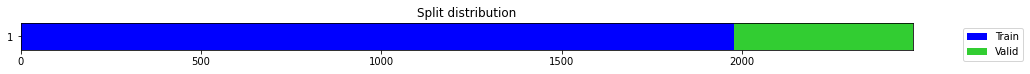

In [47]:
X, y = SlidingWindow(window_length, get_x=get_x, get_y=get_y)(df_Rabigh_Burta)
splits = get_splits(y, valid_size=.2, stratify=True, random_state=42, shuffle=False)
#3d tensor of shape (samples, vars, len),
tfms  = [None, [Categorize()]]
batch_tfms = [TSStandardize(by_sample=True)]
dls_Rabigh = get_ts_dls(X, y, splits=splits, tfms=tfms, drop_last=False, shuffle_train=False, batch_tfms=batch_tfms, bs=128)


In [48]:
model_Rabigh = build_ts_model(ROCKET,kss=np.array([6, 9, 11]), dls=dls_Rabigh) # n_kernels=10_000, kss=[7, 9, 11] set by default, but you can pass other values as kwargs

In [49]:
X_train_Rabigh, y_train_Rabigh = create_rocket_features(dls_Rabigh.train, model_Rabigh)
X_test_Rabigh, y_test_Rabigh = create_rocket_features(dls_Rabigh.valid, model_Rabigh)
X_train_Rabigh.shape, X_test_Rabigh.shape

((1980, 20000), (495, 20000))

**Ridge Classifer**

In [90]:
ridge_Rabigh = RidgeClassifierCV(alphas=np.logspace(-2, 2, 100), normalize=True,class_weight='balanced')
ridge_Rabigh.fit(X_train_Rabigh, y_train_Rabigh)
print(f'alpha: {ridge_Rabigh.alpha_:.2E}  train: {ridge_Rabigh.score(X_train_Rabigh, y_train_Rabigh):.5f}   test: {ridge_Rabigh.score(X_test_Rabigh, y_test_Rabigh):.5f}')

alpha: 1.00E+02  train: 0.75758   test: 0.87677


In [91]:
y_pred_Rabigh = ridge_Rabigh.predict(X_test_Rabigh)

In [92]:
log_loss(y_test_Rabigh,y_pred_Rabigh)

4.256309810230007

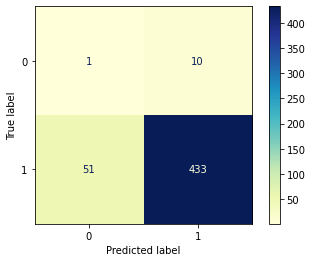

In [93]:
plot_confusion_matrix(ridge_Rabigh, X_test_Rabigh, y_test_Rabigh,cmap="YlGnBu"); 

In [89]:
print(classification_report(y_test_Rabigh, y_pred_Rabigh))

              precision    recall  f1-score   support

           0       0.02      0.09      0.03        11
           1       0.98      0.89      0.93       484

    accuracy                           0.88       495
   macro avg       0.50      0.49      0.48       495
weighted avg       0.96      0.88      0.91       495



### 4. Bahri 

In [55]:
#df_Bahri
df_Bahri_Burta = df_Bahri[Burta_column_names]
data_Bahri = df_Bahri[column_names]


In [56]:
window_length = 7 # window_length is usually selected based on prior domain knowledge or by trial and error
stride = None                # None for non-overlapping (stride = window_length) (default = 1). This depends on how often you want to predict once the model is trained
start = 0                    # use all data since the first time stamp (default = 0)
get_x = df_Bahri_Burta.columns[:-1]   # Indicates which are the columns that contain the x data.
get_y = 'Target'         # In multivariate time series, you must indicate which is/are the y columns
horizon = 0                  # 0 means y is taken from the last time stamp of the time sequence (default = 0)
seq_first = True

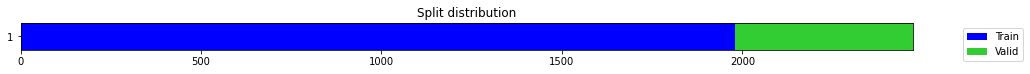

In [57]:
X, y = SlidingWindow(window_length, get_x=get_x, get_y=get_y)(df_Bahri_Burta)
splits = get_splits(y, valid_size=.2, stratify=True, random_state=42, shuffle=False)
#3d tensor of shape (samples, vars, len),
tfms  = [None, [Categorize()]]
batch_tfms = [TSStandardize(by_sample=True)]
dls_Bahri = get_ts_dls(X, y, splits=splits, tfms=tfms, drop_last=False, shuffle_train=False, batch_tfms=batch_tfms, bs=64)


In [58]:
model_Bahri = build_ts_model(ROCKET,kss=np.array([6, 9, 11]), dls=dls_Bahri) # n_kernels=10_000, kss=[7, 9, 11] set by default, but you can pass other values as kwargs

In [61]:
X_train_Bahri, y_train_Bahri = create_rocket_features(dls_Bahri.train, model_Bahri)
X_test_Bahri, y_test_Bahri = create_rocket_features(dls_Bahri.valid, model_Bahri)
X_train_Bahri.shape, X_test_Bahri.shape

((1980, 20000), (494, 20000))

**Ridge classifer**

In [81]:
ridge_Bahri = RidgeClassifierCV(alphas=np.logspace(-1, 1, 100), normalize=True,class_weight='balanced')
ridge_Bahri.fit(X_train_Bahri, y_train_Bahri)
print(f'alpha: {ridge_Bahri.alpha_:.2E}  train: {ridge_Bahri.score(X_train_Bahri, y_train_Bahri):.5f}   test: {ridge_Bahri.score(X_test_Bahri, y_test_Bahri):.5f}')

alpha: 1.00E+01  train: 0.71111   test: 0.71255


In [82]:
y_pred_Bahri = ridge_Bahri.predict(X_test_Bahri)

In [83]:
log_loss(y_test_Bahri,y_pred_Bahri)

9.928352627036624

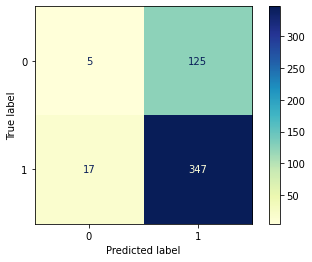

In [84]:
plot_confusion_matrix(ridge_Bahri, X_test_Bahri, y_test_Bahri,cmap="YlGnBu"); 

In [85]:
print(classification_report(y_test_Bahri, y_pred_Bahri))

              precision    recall  f1-score   support

           0       0.23      0.04      0.07       130
           1       0.74      0.95      0.83       364

    accuracy                           0.71       494
   macro avg       0.48      0.50      0.45       494
weighted avg       0.60      0.71      0.63       494



### 5. Aldrees

In [67]:
df_Aldrees_Burta = df_Aldrees[Burta_column_names]
data_Aldrees = df_Aldrees[column_names]


In [68]:
window_length = 7 # window_length is usually selected based on prior domain knowledge or by trial and error
stride = None                # None for non-overlapping (stride = window_length) (default = 1). This depends on how often you want to predict once the model is trained
start = 0                    # use all data since the first time stamp (default = 0)
get_x = df_Aldrees_Burta.columns[:-1]   # Indicates which are the columns that contain the x data.
get_y = 'Target'         # In multivariate time series, you must indicate which is/are the y columns
horizon = 0                  # 0 means y is taken from the last time stamp of the time sequence (default = 0)
seq_first = True

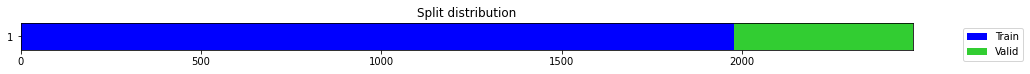

In [69]:
X, y = SlidingWindow(window_length, get_x=get_x, get_y=get_y)(df_Aldrees_Burta)
splits = get_splits(y, valid_size=.2, stratify=True, random_state=42, shuffle=False)
#3d tensor of shape (samples, vars, len),
tfms  = [None, [Categorize()]]
batch_tfms = [TSStandardize(by_sample=True)]
dls_Aldrees = get_ts_dls(X, y, splits=splits, tfms=tfms, drop_last=False, shuffle_train=False, batch_tfms=batch_tfms, bs=64)


In [70]:
model_Aldrees = build_ts_model(ROCKET,kss=np.array([6, 9, 11]), dls=dls_Aldrees) # n_kernels=10_000, kss=[7, 9, 11] set by default, but you can pass other values as kwargs

In [75]:
X_train_Aldrees, y_train_Aldrees = create_rocket_features(dls_Aldrees.train, model_Aldrees)
X_test_Aldrees, y_test_Aldrees = create_rocket_features(dls_Aldrees.valid, model_Aldrees)
X_train_Aldrees.shape, X_test_Aldrees.shape

((1980, 20000), (495, 20000))

**RidgeCV**

In [76]:

ridge_Aldrees = RidgeClassifierCV(alphas=np.logspace(-2, 2, 100), normalize=True,class_weight='balanced')
ridge_Aldrees.fit(X_train_Aldrees, y_train_Aldrees)
print(f'alpha: {ridge_Aldrees.alpha_:.2E}  train: {ridge_Aldrees.score(X_train_Aldrees, y_train_Aldrees):.5f}   test: {ridge_Aldrees.score(X_test_Aldrees, y_test_Aldrees):.5f}')

alpha: 8.30E+01  train: 0.63990   test: 0.62222


In [77]:
y_pred_Aldrees = ridge_Aldrees.predict(X_test_Aldrees)

In [78]:

log_loss(y_test_Aldrees,y_pred_Aldrees)

13.048150189860683

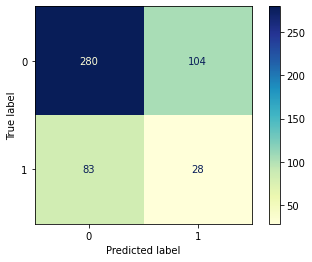

In [79]:
plot_confusion_matrix(ridge_Aldrees, X_test_Aldrees, y_test_Aldrees,cmap="YlGnBu"); 

In [80]:
print(classification_report(y_test_Aldrees, y_pred_Aldrees))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       384
           1       0.21      0.25      0.23       111

    accuracy                           0.62       495
   macro avg       0.49      0.49      0.49       495
weighted avg       0.65      0.62      0.63       495



### Store the accuracies ,f1 and errors in dataframe

In [103]:
compNames = ['Aramco','SARCO','Rabigh','Bahri','Aldrees']

In [116]:
#Acc
#y_test_Aramco, y_pred_Aramco
#log_loss(y_true=y_test_Aramco, y_pred=y_pred_Aramco, normalize=True)
#accuracy_score(y_true=y_test_Aramco, y_pred=y_pred_Aramco)
#_Aldrees
results_dic  = {'Aramco':[{'ROCKET + RidgeClassifierCV':accuracy_score(y_true=y_test_Aramco, y_pred=y_pred_Aramco)}],
                'SARCO':[{'ROCKET + RidgeClassifierCV':accuracy_score(y_true=y_test_SARCO, y_pred=y_pred_SARCO)}],
                'Rabigh':[{'ROCKET + RidgeClassifierCV':accuracy_score(y_true=y_test_Rabigh, y_pred=y_pred_Rabigh)}],
                'Bahri':[{'ROCKET + RidgeClassifierCV':accuracy_score(y_true=y_test_Bahri, y_pred=y_pred_Bahri)}],
                'Aldrees':[{'ROCKET + RidgeClassifierCV':accuracy_score(y_true=y_test_Aldrees, y_pred=y_pred_Aldrees)}]}
#f1 
results_dic_f1  = {'Aramco':[{'ROCKET + RidgeClassifierCV':f1_score(y_true=y_test_Aramco, y_pred=y_pred_Aramco, average='macro')}],
                   'SARCO':[{'ROCKET + RidgeClassifierCV':f1_score(y_true=y_test_SARCO, y_pred=y_pred_SARCO, average='macro')}],
                   'Rabigh':[{'ROCKET + RidgeClassifierCV':f1_score(y_true=y_test_Rabigh, y_pred=y_pred_Rabigh, average='macro')}],
                   'Bahri':[{'ROCKET + RidgeClassifierCV':f1_score(y_true=y_test_Bahri, y_pred=y_pred_Bahri, average='macro')}],
                   'Aldrees':[{'ROCKET + RidgeClassifierCV':f1_score(y_true=y_test_Aramco, y_pred=y_pred_Aramco, average='macro')}]}

#loss 
errors_dic  = {'Aramco':[{'ROCKET + RidgeClassifierCV':log_loss(y_true=y_test_Aramco, y_pred=y_pred_Aramco, normalize=True)}],
               'SARCO':[{'ROCKET + RidgeClassifierCV':log_loss(y_true=y_test_SARCO, y_pred=y_pred_SARCO, normalize=True)}],
               'Rabigh':[{'ROCKET + RidgeClassifierCV':log_loss(y_true=y_test_Rabigh, y_pred=y_pred_Rabigh, normalize=True)}],
               'Bahri':[{'ROCKET + RidgeClassifierCV':log_loss(y_true=y_test_Bahri, y_pred=y_pred_Bahri, normalize=True)}],
               'Aldrees':[{'ROCKET + RidgeClassifierCV':log_loss(y_true=y_test_Aramco, y_pred=y_pred_Aramco, normalize=True)}]}

In [124]:
# RidgeClassifierCVAll_features = {
# 'Aramco': round(results_dic['Aramco'][0]['RidgeClassifierCV + All features']*100,2),
# 'SARCO': round(results_dic['SARCO'][0]['RidgeClassifierCV + All features']*100,2),
# 'Rabigh': round(results_dic['Rabigh'][0]['RidgeClassifierCV + All features']*100,2),
# 'Bahri': round(results_dic['Bahri'][0]['RidgeClassifierCV + All features']*100,2),
# 'Aldrees':round(results_dic['Aldrees'][0]['RidgeClassifierCV + All features']*100,2)  
# }

# RidgeClassifierCVAll_features_values = list(RidgeClassifierCVAll_features.values())

RidgeClassifierCVborutaSelected_acc  = {
'Aramco': round(results_dic['Aramco'][0]['ROCKET + RidgeClassifierCV']*100,2),
'SARCO': round(results_dic['SARCO'][0]['ROCKET + RidgeClassifierCV']*100,2),
'Rabigh': round(results_dic['Rabigh'][0]['ROCKET + RidgeClassifierCV']*100,2),
'Bahri': round(results_dic['Bahri'][0]['ROCKET + RidgeClassifierCV']*100,2),
'Aldrees': round(results_dic['Aldrees'][0]['ROCKET + RidgeClassifierCV']*100,2)
}


RidgeClassifierCVborutaSelected_acc = list(RidgeClassifierCVborutaSelected_acc.values())

In [125]:

df_ROKET = pd.DataFrame({
    'Company': compNames,
    #'ROCKET+RidgeClassifierCV + All Features': RidgeClassifierCVAll_features_values,
    'ROCKET + RidgeClassifierCV': RidgeClassifierCVborutaSelected_acc
})
df_ROKET

,Company,ROCKET + RidgeClassifierCV
0,Aramco,56.06
1,SARCO,96.96
2,Rabigh,87.68
3,Bahri,71.26
4,Aldrees,62.22


In [ ]:
df_ROKET.to_csv('Accurecies_results.csv')

In [121]:
# RidgeClassifierCVAll_features = {
# 'Aramco': round(results_dic_f1['Aramco'][0]['RidgeClassifierCV + All features']*100,2),
# 'SARCO': round(results_dic_f1['SARCO'][0]['RidgeClassifierCV + All features']*100,2),
# 'Rabigh': round(results_dic_f1['Rabigh'][0]['RidgeClassifierCV + All features']*100,2),
# 'Bahri': round(results_dic_f1['Bahri'][0]['RidgeClassifierCV + All features']*100,2),
# 'Aldrees':round(results_dic_f1['Aldrees'][0]['RidgeClassifierCV + All features']*100,2)  
# }

# RidgeClassifierCVAll_features_values = list(RidgeClassifierCVAll_features.values())

RidgeClassifierCVboruta_f1  = {
'Aramco': round(results_dic_f1['Aramco'][0]['ROCKET + RidgeClassifierCV']*100,2),
'SARCO': round(results_dic_f1['SARCO'][0]['ROCKET + RidgeClassifierCV']*100,2),
'Rabigh': round(results_dic_f1['Rabigh'][0]['ROCKET + RidgeClassifierCV']*100,2),
'Bahri': round(results_dic_f1['Bahri'][0]['ROCKET + RidgeClassifierCV']*100,2),
'Aldrees': round(results_dic_f1['Aldrees'][0]['ROCKET + RidgeClassifierCV']*100,2)
}


RidgeClassifierCVboruta_f1 = list(RidgeClassifierCVboruta_f1.values())

In [114]:

df_ROKET_f1 = pd.DataFrame({
    'Company': compNames,
    #'ROCKET+RidgeClassifierCV + All Features': RidgeClassifierCVAll_features_values,
    'ROCKET + RidgeClassifierCV': RidgeClassifierCVboruta_f1

})
df_ROKET_f1

,Company,ROCKET + RidgeClassifierCV
0,Aramco,55.97
1,SARCO,49.23
2,Rabigh,48.30
3,Bahri,44.80
4,Aldrees,55.97


In [ ]:
df_ROKET_f1.to_csv('f1_results.csv')

In [122]:
# RidgeClassifierCVAll_features = {
# 'Aramco': errors_dic['Aramco'][0]['RidgeClassifierCV + All features'],
# 'SARCO': errors_dic['SARCO'][0]['RidgeClassifierCV + All features'],
# 'Rabigh': errors_dic['Rabigh'][0]['RidgeClassifierCV + All features'],
# 'Bahri': errors_dic['Bahri'][0]['RidgeClassifierCV + All features'],
# 'Aldrees':errors_dic['Aldrees'][0]['RidgeClassifierCV + All features'] 
# }

# RidgeClassifierCVAll_features_values = list(RidgeClassifierCVAll_features.values())

RidgeClassifierCVboruta_errors  = {
'Aramco': errors_dic['Aramco'][0]['ROCKET + RidgeClassifierCV'],
'SARCO': errors_dic['SARCO'][0]['ROCKET + RidgeClassifierCV'],
'Rabigh': errors_dic['Rabigh'][0]['ROCKET + RidgeClassifierCV'],
'Bahri': errors_dic['Bahri'][0]['ROCKET + RidgeClassifierCV'],
'Aldrees': errors_dic['Aldrees'][0]['ROCKET + RidgeClassifierCV']
}


RidgeClassifierCVboruta_errors = list(RidgeClassifierCVboruta_errors.values())


In [123]:

df_ROKET_errors = pd.DataFrame({
    'Company': compNames,
    #'ROCKET+RidgeClassifierCV + All Features': RidgeClassifierCVAll_features_values,
    'ROCKET+RidgeClassifierCV + Boruta Selected Features': RidgeClassifierCVboruta_errors

})
df_ROKET_errors

,Company,ROCKET+RidgeClassifierCV + Boruta Selected Features
0,Aramco,15.176317
1,SARCO,1.048760
2,Rabigh,4.256310
3,Bahri,9.928353
4,Aldrees,15.176317


In [ ]:
df_ROKET_errors.to_csv('errors.csv')

### Compare Models to Choose the Best One [Round 1 & Round 2] 

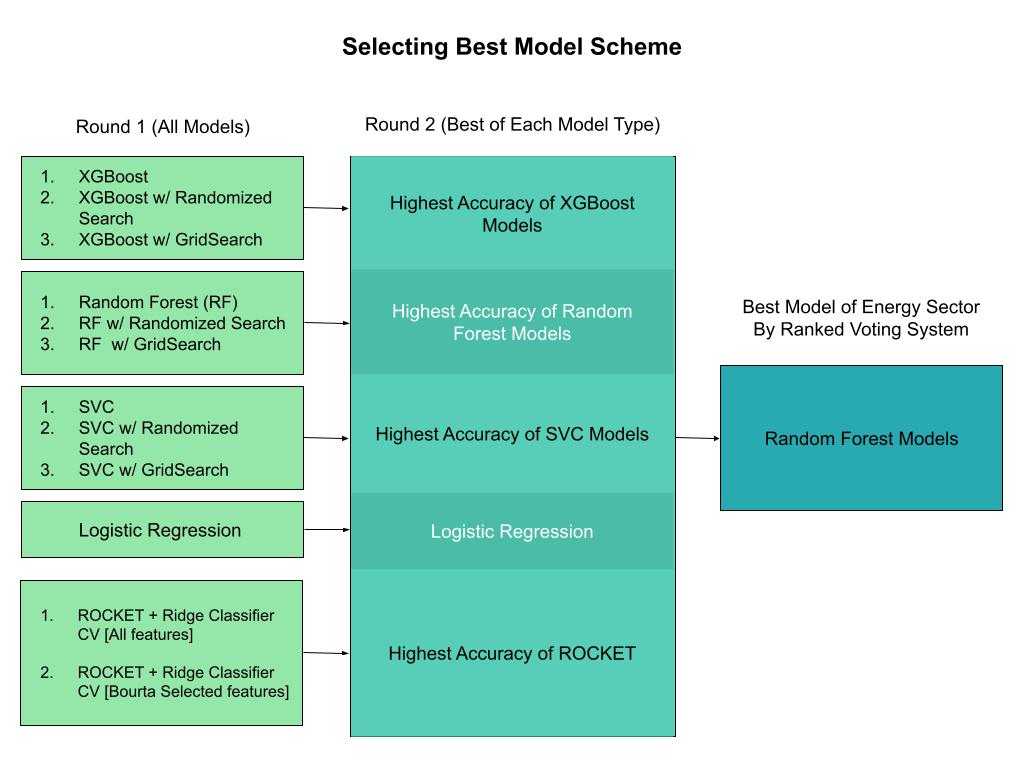

### Round 1 : 

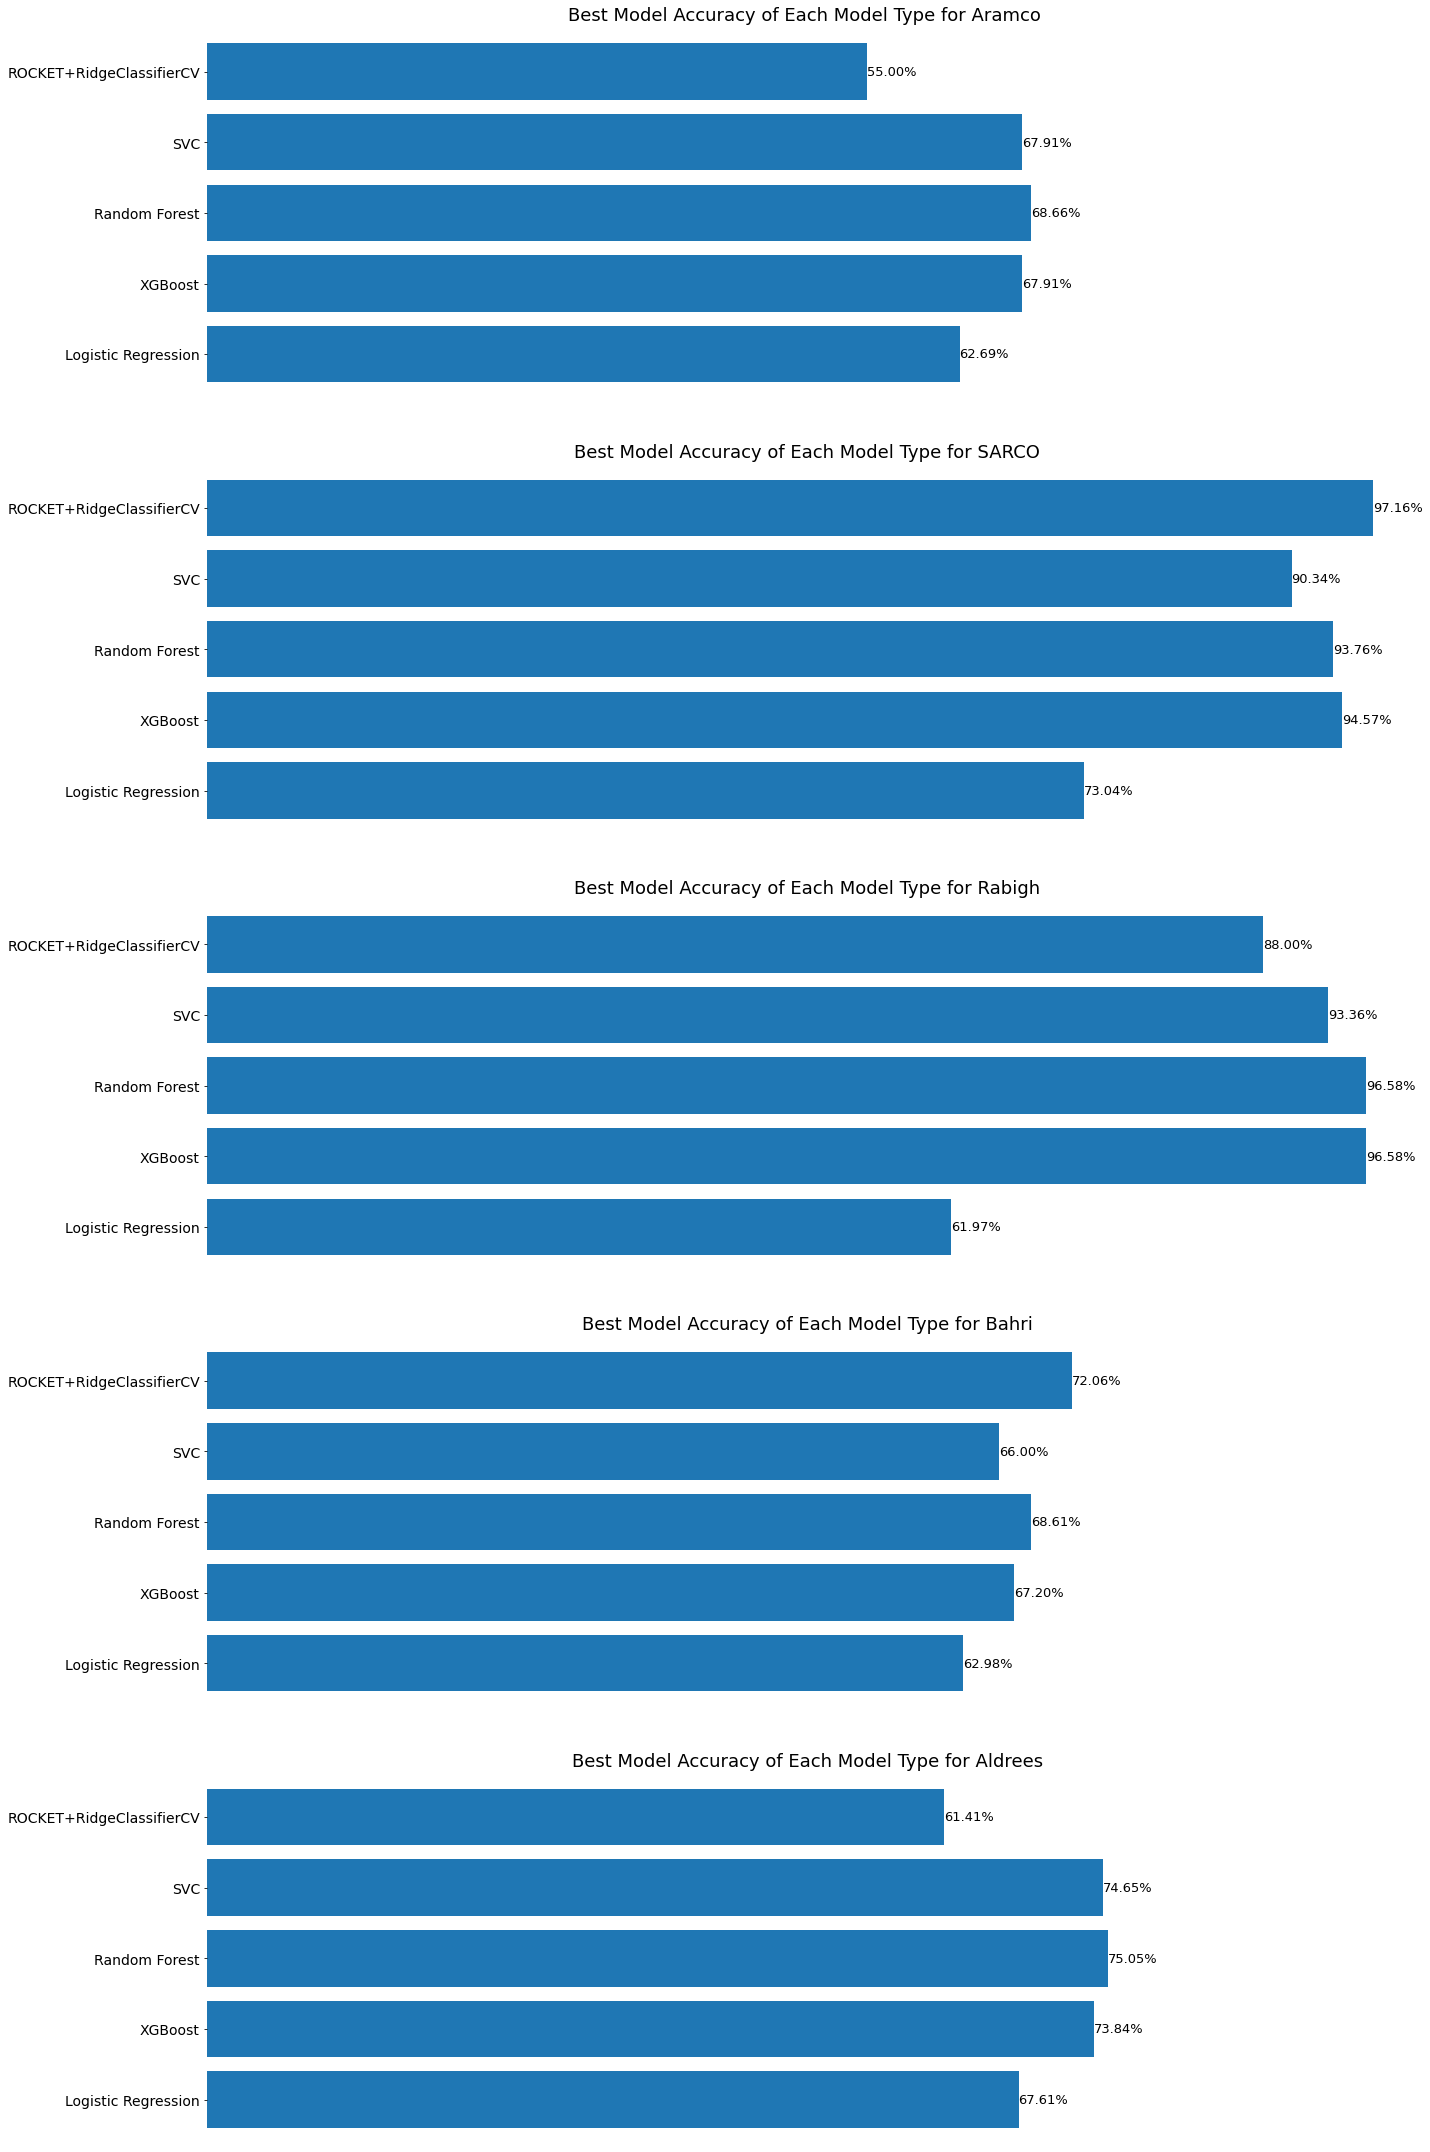

In [ ]:
fig, ((ax, ax1,ax2,ax3,ax4))= plt.subplots(ncols=1,nrows=5, figsize=(20,30), )

#Best Accuracy Score of Each Model for Aramco
#1-get values
Compare_accuracy1 = {
'Logistic Regression': df_logre.iloc[0,1], 
'XGBoost':df_xgb.iloc[0,1:].max(),
'Random Forest':df_RF.iloc[0,1:].max(),
'SVC': df_SVC.iloc[0,1:].max(),
'ROCKET+RidgeClassifierCV':df_ROKET.iloc[0,1]
                    }
compare_names = list(Compare_accuracy1.keys())
compare_values = list(Compare_accuracy1.values())

#2- create plot
ax.set_title('Best Model Accuracy of Each Model Type for Aramco ', fontsize=18)
bars = ax.barh(compare_names,compare_values)
ax.bar_label(bars, fmt='%.2f%%', fontsize=13 )
ax.set_xlim([0, 100])
#ax.set_ylabel('Model', fontsize=16)
ax.set_yticklabels(compare_names, fontsize=14)
#ax.set(xlabel=None)
#ax.set_tick_params(top='off', bottom='off', right='off', labelleft='on', labelbottom='off')
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_xticks([])


#Best Accuracy Score of Each Model for sarco
#1-get values
Compare_accuracy2 = {
'Logistic Regression': df_logre.iloc[1,1], 
'XGBoost':df_xgb.iloc[1,1:].max(),
'Random Forest':df_RF.iloc[1,1:].max(),
'SVC': df_SVC.iloc[1,1:].max(),
'ROCKET+RidgeClassifierCV':df_ROKET.iloc[1,1]
                    }
compare_names2 = list(Compare_accuracy2.keys())
compare_values2 = list(Compare_accuracy2.values())

#2-create plot
ax1.set_title('Best Model Accuracy of Each Model Type for SARCO',  fontsize=18)
bars = ax1.barh(compare_names2,compare_values2)
ax1.bar_label(bars, fmt='%.2f%%', fontsize=13 )
ax1.set_xlim([0, 100])
ax1.set_yticklabels(compare_names, fontsize=14)
ax1.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
ax1.set_xticks([])

#Best Accuracy Score of Each Model for Rabigh
#1-get values
Compare_accuracy3 = {
'Logistic Regression': df_logre.iloc[2,1], 
'XGBoost':df_xgb.iloc[2,1:].max(),
'Random Forest':df_RF.iloc[2,1:].max(),
'SVC': df_SVC.iloc[2,1:].max(),
'ROCKET+RidgeClassifierCV':df_ROKET.iloc[2,1]
                    } 
compare_names3 = list(Compare_accuracy3.keys())
compare_values3 = list(Compare_accuracy3.values())

#2- create plot
ax2.set_title('Best Model Accuracy of Each Model Type for Rabigh',  fontsize=18)
bars = ax2.barh(compare_names3,compare_values3)
ax2.bar_label(bars, fmt='%.2f%%', fontsize=13)
ax2.set_xlim([0, 100])
ax2.set_yticklabels(compare_names, fontsize=14)
ax2.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
ax2.set_xticks([])
#Best Accuracy Score of Each Model for Bahri
#1-get Values
Compare_accuracy4 = {
'Logistic Regression': df_logre.iloc[3,1], 
'XGBoost':df_xgb.iloc[3,1:].max(),
'Random Forest':df_RF.iloc[3,1:].max(),
'SVC': df_SVC.iloc[3,1:].max(),
'ROCKET+RidgeClassifierCV':df_ROKET.iloc[3,1]
                    }
compare_names4 = list(Compare_accuracy4.keys())
compare_values4 = list(Compare_accuracy4.values())

#2-create Plot
ax3.set_title('Best Model Accuracy of Each Model Type for Bahri',  fontsize=18)
bars = ax3.barh(compare_names4,compare_values4)
ax3.bar_label(bars, fmt='%.2f%%', fontsize=13)
ax3.set_xlim([0, 100])
ax3.set_yticklabels(compare_names, fontsize=14)
ax3.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
ax3.set_xticks([])

#Best Accuracy Score of Each Model for Aldrees
#1-get Values
Compare_accuracy5 = {
'Logistic Regression': df_logre.iloc[4,1], 
'XGBoost':df_xgb.iloc[4,1:].max(),
'Random Forest':df_RF.iloc[4,1:].max(),
'SVC': df_SVC.iloc[4,1:].max(),
'ROCKET+RidgeClassifierCV':df_ROKET.iloc[4,1]
                    }
compare_names5 = list(Compare_accuracy5.keys())
compare_values5 = list(Compare_accuracy5.values())

#2-create Plot
ax4.set_title('Best Model Accuracy of Each Model Type for Aldrees',  fontsize=18)
bars = ax4.barh(compare_names5,compare_values5)
ax4.bar_label(bars, fmt='%.2f%%', fontsize=13)
ax4.set_xlim([0, 100])
ax4.set_yticklabels(compare_names, fontsize=14)
ax4.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
ax4.set_xticks([])

plt.tight_layout()
plt.subplots_adjust(
                    hspace=0.17)
plt.savefig("figure.jpeg", dpi=1200) # save as png
plt.show()






### Round 2 (Best Model): 

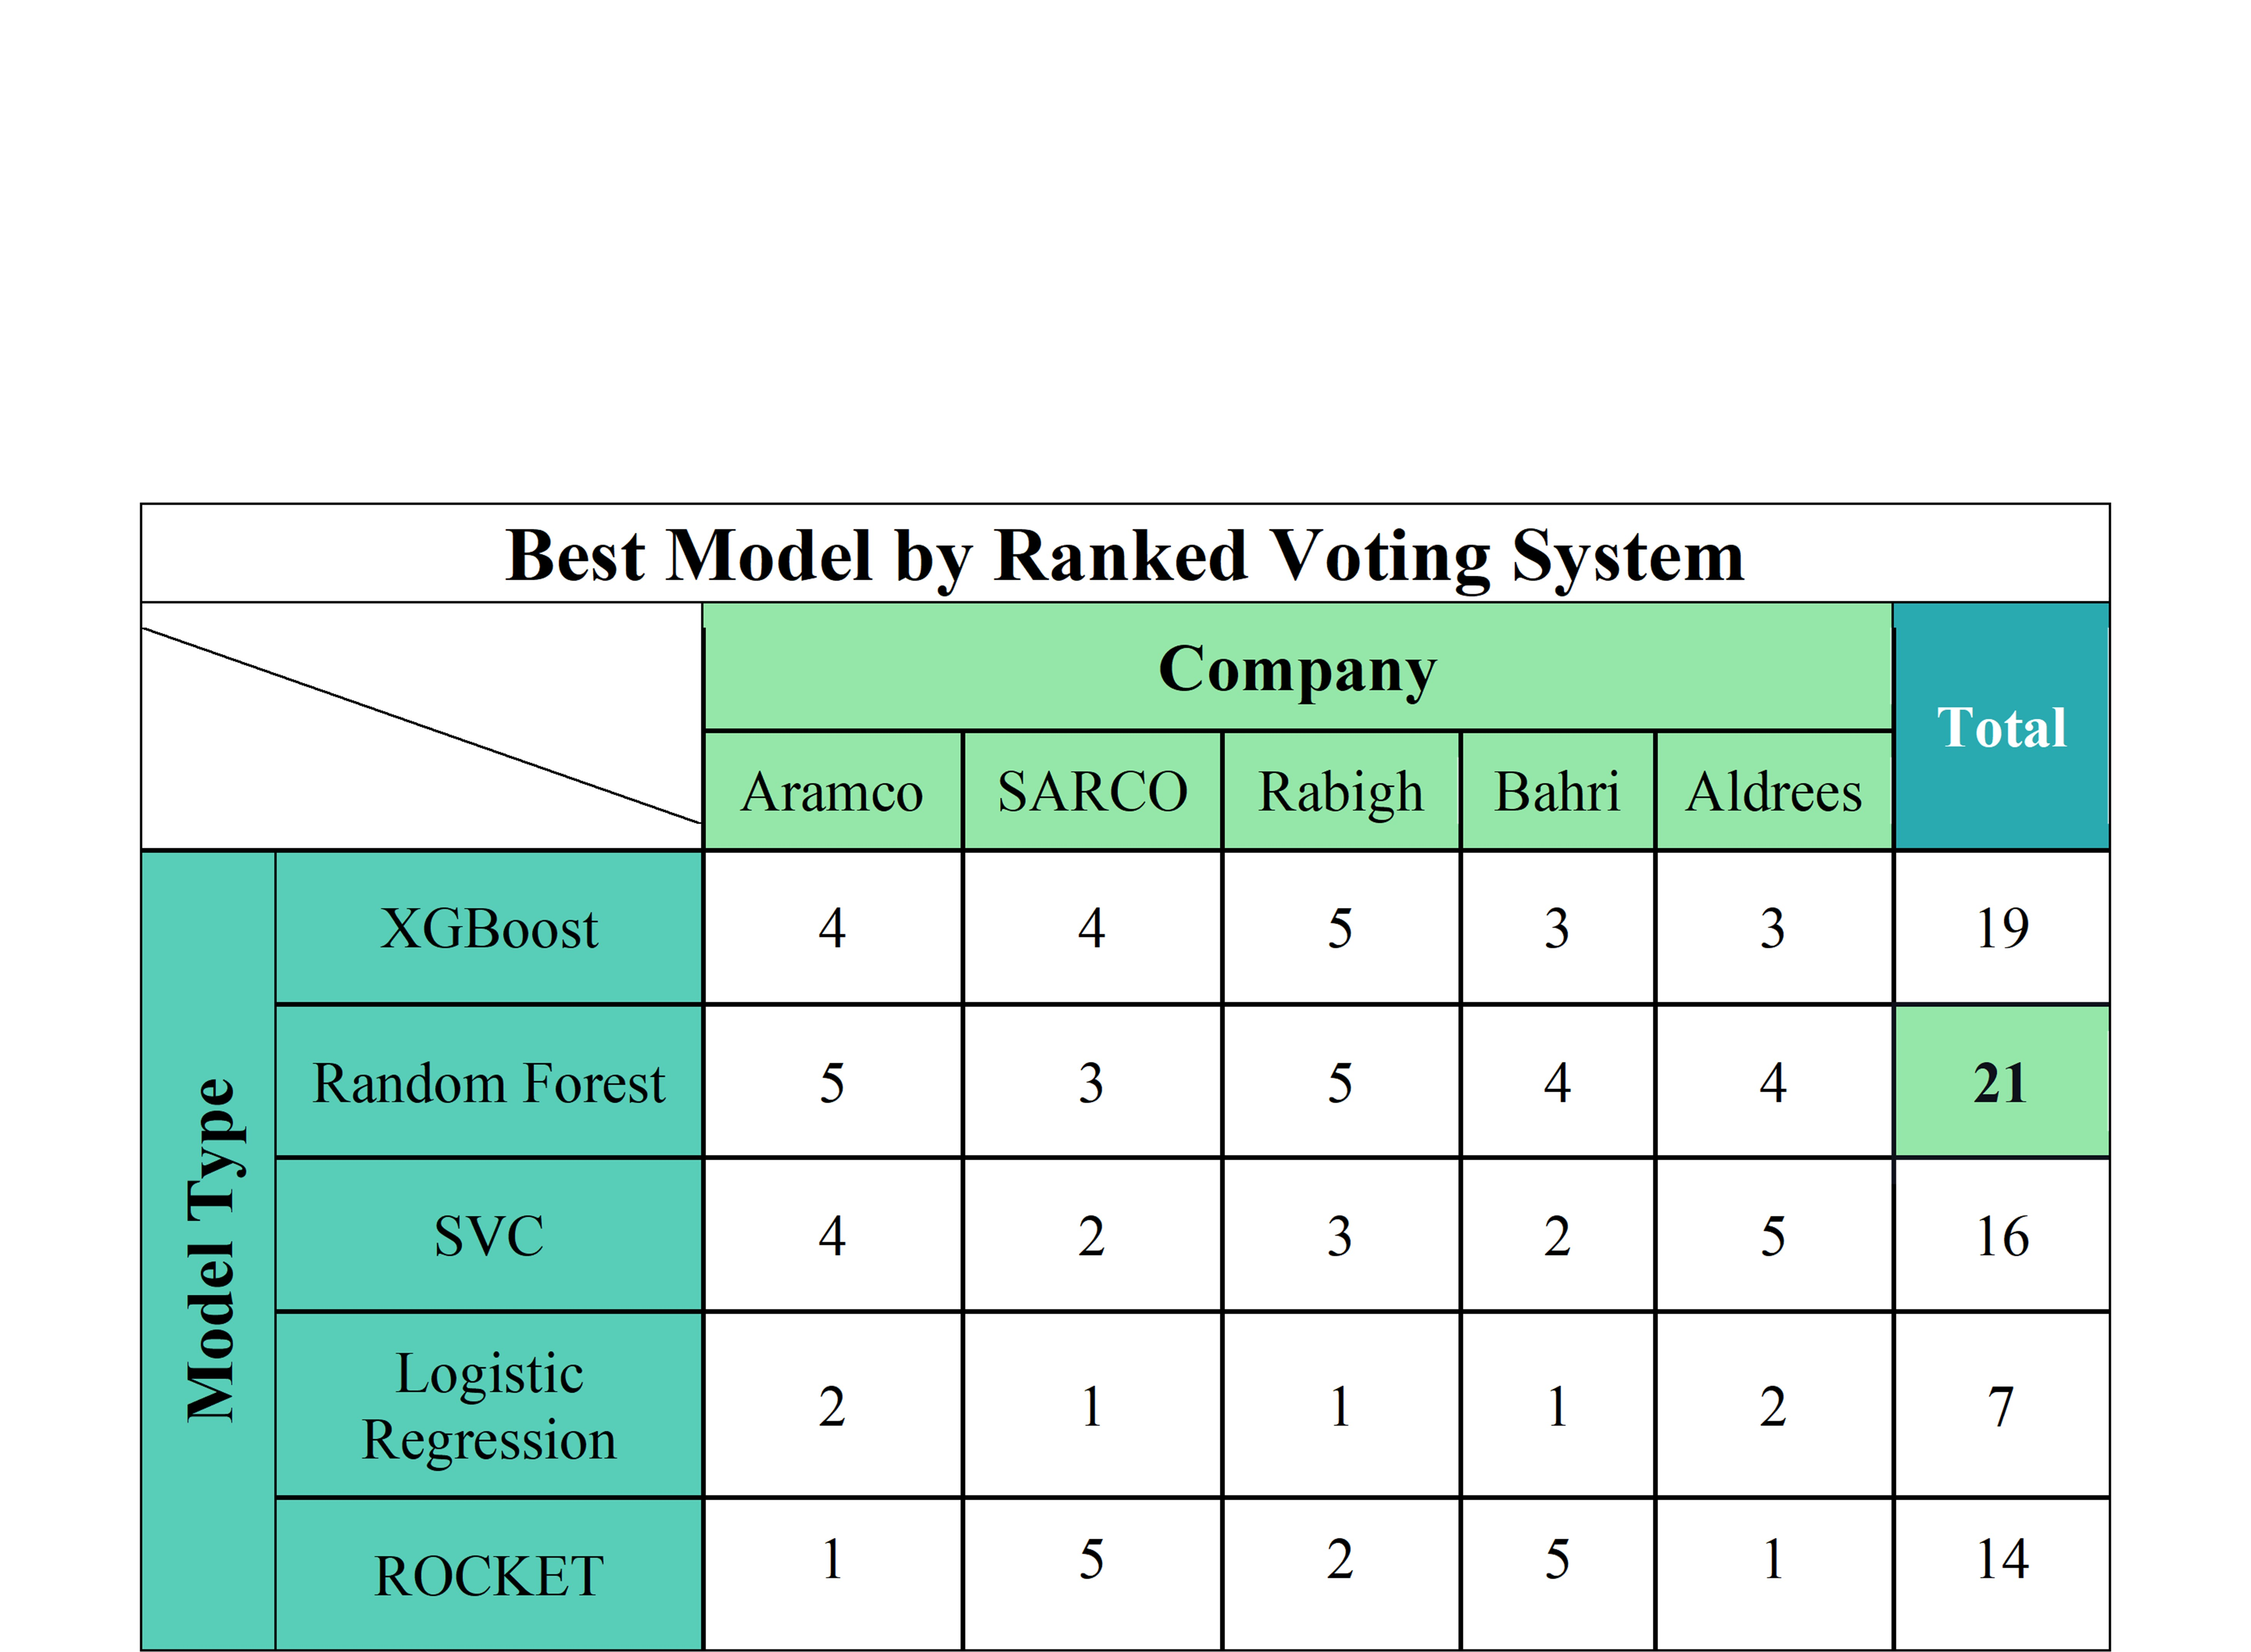

## Best Model Vs. Baseline 

In [ ]:


BaseLine_result=[score1,score2,score3,score4,score5]

RandomForest_result=[df_RF.iloc[0,1:].max(),df_RF.iloc[1,1:].max(),df_RF.iloc[2,1:].max(),df_RF.iloc[3,1:].max(),df_RF.iloc[4,1:].max()]

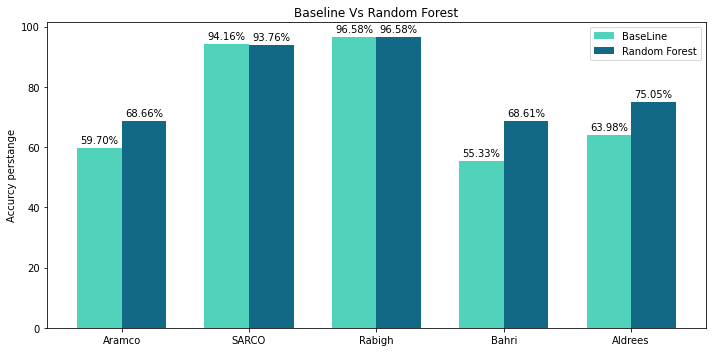

In [ ]:


x = np.arange(len(compNames))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (10, 5))
rects1 = ax.bar(x - width/2, BaseLine_result, width, label='BaseLine',color='#51d2bb')
rects2 = ax.bar(x + width/2, RandomForest_result, width, label='Random Forest',color='#116985')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accurcy perstange')
ax.set_title('Baseline Vs Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(compNames)
ax.legend()

ax.bar_label(rects1,fmt='%1.2f%%', padding=3)
ax.bar_label(rects2,fmt='%1.2f%%', padding=3)

fig.tight_layout()
plt.savefig("figure.jpeg", dpi=1200) # save as png
plt.show()

# Random Forest Pipeline (Chosen Model)

In [ ]:
RF_clf= RandomForestClassifier(class_weight="balanced", random_state=42)
params_grid = {
    'bootstrap': [True],
    'max_depth': [80],
    'max_features': [3,5,8,7, 10,13],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [2, 6, 8],
    'n_estimators': [200,400]
    
}

RF_grid = GridSearchCV(
    RF_clf,
    params_grid,
    cv = 10,
    n_jobs=-1,
    verbose=2);

In [ ]:
X_train1, X_test1, y_train1, y_test1 = split_data(df_Aramco, 'Target')
X_train2, X_test2, y_train2, y_test2 = split_data(df_SARCO, 'Target')
X_train3, X_test3, y_train3, y_test3 = split_data(df_Rabigh, 'Target')
X_train4, X_test4, y_train4, y_test4 = split_data(df_Bahri, 'Target')
X_train5, X_test5, y_train5, y_test5 = split_data(df_Aldrees, 'Target')

In [ ]:
X_train1.head()

,Volume,EMA_9,SMA_5,SMA_10,SMA_15,SMA_20,SMA_25,SMA_30,MACD,RSI,Stochastic,Open-Close,High-Low
8424,3790000,40.774786,44.850,38.670,45.090000,41.8670,41.7500,45.152000,-2.486501,48.803456,25.520598,0.14,0.23
9645,2570000,59.698931,58.988,59.013,58.988667,59.2975,59.6008,59.751000,-0.347814,48.291729,12.703849,-0.19,0.23
10263,15450000,61.856118,75.372,61.934,57.569333,57.8500,57.7796,57.446333,3.569465,48.372071,19.749951,0.72,1.45
7553,25840000,30.043512,28.156,32.183,31.109333,31.1815,30.6312,30.462000,-0.366022,49.312072,43.703129,1.73,1.82
7974,5530000,29.679506,29.534,29.995,30.113333,30.6495,31.2876,30.480000,-0.869097,50.056896,50.632603,-0.04,0.18


In [ ]:
# Create a pipeline for the model, first scaling, then modeling. 
pipe = make_pipeline(StandardScaler(), RF_grid)                                              

In [ ]:
pipe.fit(X_train1, y_train1)
pipe.fit(X_train2, y_train2)
pipe.fit(X_train3, y_train3)
pipe.fit(X_train4, y_train4)
pipe.fit(X_train5, y_train5)

print(f"model score: {pipe.score(X_test1, y_test1)}")
print(f"model score: {pipe.score(X_test2, y_test2)}")
print(f"model score: {pipe.score(X_test3, y_test3)}")
print(f"model score: {pipe.score(X_test4, y_test4)}")
print(f"model score: {pipe.score(X_test5, y_test5)}")

Fitting 10 folds for each of 72 candidates, totalling 720 fits
Fitting 10 folds for each of 72 candidates, totalling 720 fits
Fitting 10 folds for each of 72 candidates, totalling 720 fits
Fitting 10 folds for each of 72 candidates, totalling 720 fits
Fitting 10 folds for each of 72 candidates, totalling 720 fits
model score: 0.5597014925373134
model score: 0.89738430583501
model score: 0.647887323943662
model score: 0.5774647887323944
model score: 0.7303822937625755


### Save Model! 

In [ ]:
# to save the final model
import pickle
# create an iterator object with write permission - model.pkl
with open('model1_pkl', 'wb') as files:
    pickle.dump(pipe, files)

# Test the Model with New Data

In [ ]:
# functions to process data, and prepare it for testing.
def prepare_data(df): 
  df['Date']=pd.to_datetime(df['Date'])
  df.sort_values(by='Date', inplace=True)
  df.reset_index(drop=True)
  df['Tomorrow']=df['Price'].shift(-1)
  df['Target']=(df['Tomorrow']> df['Price']).astype(int)
  # change the type and remove % from the data.
  df['Change %'] = df['Change %'].str.rstrip("%").astype(float)
  # remove the string (K & M) to be able to change the type, then change the data type to int. ==> easier to deal with it
  df["Vol."]=df["Vol."].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)

  # change symbol type to stirng.
  df['Symbol']=df['Symbol'].astype(str)
  # renaming columns to suitable names.
  df.rename(columns={'Vol.':'Volume','Price':'Close'},inplace=True)
  # drop unnecessary columns.
  df = df.drop(['Sector','Industry'], axis=1)
  featurecalculator(df)
  #print(df.isnull().sum())
  # Dropping rows with Na values
  df=df.iloc[33:]
  df.reset_index(drop=True,inplace=True)
  df = df.fillna(method='ffill')
  # add new features
  df['Open-Close'] = df['Open'] - df['Close']
  df['High-Low'] = df.High - df.Low

  X = df.sort_values(by='Date', ascending=False).reset_index(drop=True).drop(['Tomorrow','Date','Name','Change %','Open','Close','High','Low','Symbol','Target'], axis=1)  # drop the target
  #print(X.head(2))
  y = df['Target']
  return df, X, y
# helper function
def featurecalculator(data):
  data['EMA_9'] = data['Close'].ewm(9).mean() # exponential moving average of window 9
  data['SMA_5'] = data['Close'].rolling(5).mean() # moving average of window 5
  data['SMA_10'] = data['Close'].rolling(10).mean() # moving average of window 10
  data['SMA_15'] = data['Close'].rolling(15).mean() # moving average of window 15
  data['SMA_20'] = data['Close'].rolling(20).mean() # moving average of window 20
  data['SMA_25'] = data['Close'].rolling(25).mean() # moving average of window 25
  data['SMA_30'] = data['Close'].rolling(30).mean() # moving average of window 30
  EMA_12 = pd.Series(data['Close'].ewm(span=12, min_periods=12).mean())
  EMA_26 = pd.Series(data['Close'].ewm(span=26, min_periods=26).mean())
  data['MACD'] = pd.Series(EMA_12 - EMA_26)    # calculates Moving Average Convergence Divergence
  data['RSI'] = RSIIndicator(data['Close']).rsi() # calculates Relative Strength Index 
  data['Stochastic']=StochasticOscillator(data['High'],data['Low'],data['Close']).stoch() # Calculates Stochastic Oscillator
  pass

def test_data(model, df, X, y, no_of_preds):
    
    y_pred = model.predict(X) 
    df_result = pd.DataFrame(y_pred, columns=['Predicted_Label'])
    df_result['Target'] = y
    df_result['Date'] = df['Date']
    df_result.set_index('Date', inplace=True)
    preds = df_result
    acc_details = (df_result['Target'] == df_result['Predicted_Label']).value_counts()
    acc = model.score(X, y)
    print(f'Model Score: {round(acc*100, 2)}%')
    print(f'Accuracy Details:\nFalse: {acc_details[0]}\nTrue: {acc_details[1]}\n')
    print(f'Model Predications:\n {df_result[["Predicted_Label"]].tail(no_of_preds)}')
    #return model_score, preds

In [ ]:
# # load saved model
with open('model1_pkl' , 'rb') as f:
    model = pickle.load(f)

In [ ]:
df_test_Aramco = pd.read_csv('2222 Historical Data_test.csv')

df_test_Aramco, X, y = prepare_data(df_test_Aramco)
test_data(model, df_test_Aramco, X, y,5)

Model Score: 58.82%
Accuracy Details:
False: 28
True: 40

Model Predications:
             Predicted_Label
Date                       
2022-08-29                0
2022-08-30                1
2022-08-31                0
2022-09-01                0
2022-09-04                1


In [ ]:
df_test_SARCO = pd.read_csv('2030 Historical Data_test.csv')
df_test_SARCO.head()
df_test_SARCO, X, y = prepare_data(df_test_SARCO)
test_data(model, df_test_SARCO, X, y,6)

Model Score: 58.57%
Accuracy Details:
False: 29
True: 41

Model Predications:
             Predicted_Label
Date                       
2022-08-30                0
2022-08-31                0
2022-09-01                0
2022-09-04                0
2022-09-05                0
2022-09-06                0


In [ ]:
df_test_Rabigh = pd.read_csv('2380 Historical Data_test1.csv')

df_test_Rabigh, X, y = prepare_data(df_test_Rabigh)
test_data(model, df_test_Rabigh, X, y,1)

Model Score: 57.14%
Accuracy Details:
False: 30
True: 40

Model Predications:
             Predicted_Label
Date                       
2022-09-06                1


In [ ]:
df_test_Bahri = pd.read_csv('4030 Historical Data_test.csv')

df_test_Bahri, X, y = prepare_data(df_test_Bahri)
test_data(model, df_test_Bahri, X, y,5)

Model Score: 68.57%
Accuracy Details:
False: 22
True: 48

Model Predications:
             Predicted_Label
Date                       
2022-08-31                1
2022-09-01                1
2022-09-04                1
2022-09-05                1
2022-09-06                1


In [ ]:
df_test_Aldrees = pd.read_csv('4200 Historical Data_test.csv')

df_test_Aldrees, X, y = prepare_data(df_test_Aldrees)
test_data(model, df_test_Aldrees, X, y,5)

Model Score: 50.0%
Accuracy Details:
False: 35
True: 35

Model Predications:
             Predicted_Label
Date                       
2022-08-31                0
2022-09-01                0
2022-09-04                0
2022-09-05                0
2022-09-06                0


In [ ]:

def featurecalculator(data):
  data['EMA_9'] = data['Close'].ewm(9).mean() # exponential moving average of window 9
  data['SMA_5'] = data['Close'].rolling(5).mean() # moving average of window 5
  data['SMA_10'] = data['Close'].rolling(10).mean() # moving average of window 10
  data['SMA_15'] = data['Close'].rolling(15).mean() # moving average of window 15
  data['SMA_20'] = data['Close'].rolling(20).mean() # moving average of window 20
  data['SMA_25'] = data['Close'].rolling(25).mean() # moving average of window 25
  data['SMA_30'] = data['Close'].rolling(30).mean() # moving average of window 30
  EMA_12 = pd.Series(data['Close'].ewm(span=12, min_periods=12).mean())
  EMA_26 = pd.Series(data['Close'].ewm(span=26, min_periods=26).mean())
  data['MACD'] = pd.Series(EMA_12 - EMA_26)    # calculates Moving Average Convergence Divergence
  data['RSI'] = RSIIndicator(data['Close']).rsi() # calculates Relative Strength Index 
  data['Stochastic']=StochasticOscillator(data['High'],data['Low'],data['Close']).stoch() # Calculates Stochastic Oscillator
  pass